In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


# all the libraries

In [3]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import json
import time
import random
import time
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [66]:
import scipy as sc
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
import sklearn
from sklearn import linear_model, metrics, preprocessing, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from collections import Counter
from scipy.special import expit
from scipy.special import logit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# API, Selenium and scraping

In [ ]:
driver = webdriver.Firefox()

#start with bot of selenium going over the url's of the grammy

In [97]:
grammy_url_gen = "https://www.grammy.com/awards/"
grammy_url_between = "-annual-grammy-awards"
grammy_year = 2022
grammy_numb = 65
ends_dict = {0: "th", 1: "st", 2: "nd", 3: "rd", 4: "th", 5: "th", 6: "th", 7: "th", 8: "th", 9: "th"}
i = 0
list_of_urls=[]
singers_names = []
songs_names=[]
win_or_no_list=[]
win=1
no_win=0
list_of_the_years=[]

#loop for finding url's address for each year of the grammy awards

In [98]:
while (grammy_numb > 0):
    str_grammy_numb = str(grammy_numb)
    str_grammy_year = str(grammy_year)
    if (grammy_numb<=13 & grammy_numb>=4):
        if (grammy_numb==11):
            end="th"
        else:
            end="th"
        grammy_url = grammy_url_gen + str_grammy_numb + end + grammy_url_between
    elif (grammy_numb > 59):
        end = ends_dict[grammy_numb % 10]
        grammy_url = grammy_url_gen + str_grammy_numb + end + grammy_url_between + "-" + str_grammy_year
    else:
        end = ends_dict[grammy_numb % 10]
        grammy_url = grammy_url_gen + str_grammy_numb + end + grammy_url_between
    list_of_urls.append(str(grammy_url))
    grammy_numb -= 1
    grammy_year -= 1

#loop over each and every url's address and scrapping for data using library 'BeautifulSoup',  
#by taking a HTML filename and convert it to soup object
#finding the elements for our data by .XPATH for the nominees and the winners. 

#winners_song_names
#winners_singer_names
#nominees_songs_names
#nominees_singers_names

In [ ]:
for url list_of_urls:
    try:
        #winners_song_names
        driver.get(url)
        winners_song_names =driver.find_elements(By.XPATH, "//*[@class='w-full text-center md-xl:text-left text-17 md-xl:text-22 mr-10px md-xl:mr-30px font-polaris font-bold md-xl:leading-8 tracking-wider']")
        for song in winners_song_names :
            winner_song_name_i=bs(song.get_property("innerHTML"), "html.parser").get_text()
            len_song_name=len(winner_song_name_i)
            new_song_name_win=winner_song_name_i[1:(len_song_name-1)]
            songs_names.append(new_song_name_win)
            win_or_no_list.append(win)
    except Exception as e:
        pass

    
    try:
        #winners_singer_names
        driver.get(url)
        winners_singer_names=driver.find_elements(By.XPATH,"//*[@class='mb-15px text-center md-xl:text-left']")
        for singer in winners_singer_names :
            soup=bs(singer.get_property("innerHTML"),'html.parser')
            try:
                winner_singer_name_i=soup.find('a').text
            except:
                winner_singer_name_i='nan'
                grammy_year_win='nan'
            singers_names.append(winner_singer_name_i)
            list_of_the_years.append(grammy_year_win)
    except Exception as e:
        pass


    try:
        #nominees_songs_names
        driver.get(url)
        nominees_songs_names=driver.find_elements(By.XPATH, "//*[@class='w-full text-left md-xl:text-22 text-17 mr-10px md-xl:mr-30px font-polaris font-bold md-xl:leading-8 tracking-wider flex flex-row justify-between']/span[1]")
        for song in nominees_songs_names:
            nominee_song_name_i=bs(song.get_property("innerHTML"), "html.parser").get_text()
            len_song_name=len(nominee_song_name_i)
            new_song_name_nom=nominee_song_name_i[1:(len_song_name-1)]
            songs_names.append(new_song_name_nom)
            win_or_no_list.append(no_win)
            list_of_the_years
            
    except Exception as e:
        pass


    try:
        #nominees_singers_names
        driver.get(url)
        nominees_singers_names =driver.find_elements(By.XPATH,"//*[@class='flex flex-col']")                                            
        for singer in nominees_singers_names:
            soup=bs(singer.get_property("innerHTML"),'html.parser')
            try:
                nominee_singer_name_i=soup.find('a').text
            except:
                nominee_singer_name_i='nan'
                grammy_year_nom='nan'
            singers_names.append(nominee_singer_name_i)
            list_of_the_years.append(grammy_year_nom)
    except Exception as e:
        pass
    

tests

In [ ]:
len(singers_names)

In [ ]:
len(songs_names)

Authenticate with the Spotify API

In [ ]:
client_id = '6cfaa649a6184379a6e8f379bacaaace'
client_secret = '2e63fdd5dfb945998d9e52f158f774d9'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


Initialize empty lists for each data point

In [ ]:
song_names = []
artist_names = []
album_names = []
release_dates = []
popularity_scores = []
length_ms = []

Loop through each song in the dictionary and retrieve its data from the API


Search for the song and get the top result


Add the data for this song to the appropriate list


Handle the case where no results were found for this song


Handle any other exceptions that might occur

In [ ]:
for song, artist in zip(songs_names,singers_names):
    try:
        # Search for the song and get the top result
        results = sp.search(q=f'track:{song} artist:{artist}', type='track', limit=1)
        track = results['tracks']['items'][0]

        # Add the data for this song to the appropriate list
        song_names.append(track['name'])
        artist_names.append(track['artists'][0]['name'])
        album_names.append(track['album']['name'])
        release_dates.append(track['album']['release_date'])
        popularity_scores.append(track['popularity'])
        length_ms.append(track['duration_ms'])
    except IndexError:
        # Handle the case where no results were found for this song
        song_names.append(song)
        artist_names.append(artist)
        album_names.append(np.nan)
        release_dates.append(np.nan)
        popularity_scores.append(np.nan)
        length_ms.append(np.nan)
        
    except Exception as e:
        # Handle any other exceptions that might occur
        print(f'An error occurred while searching for {song} by {artist}: {e}')
        song_names.append(song)
        artist_names.append(artist)
        album_names.append(np.nan)
        release_dates.append(np.nan)
        popularity_scores.append(np.nan)
        length_ms.append(np.nan)
        

In [ ]:
len(win_or_no_list)

In [ ]:
len(song_names)

Create a data frame from the data

In [ ]:
data = {
    'Song Name': song_names,
    'Artist Name': artist_names,
#     'Grammy_year': list_of_the_years,
    'Album Name': album_names,
    'Release Date': release_dates,
    'Popularity Score': popularity_scores,
    'Length (ms)': length_ms,
    'genres': genres,
    'Grammy_won' : win_or_no_list
    
}
df = pd.DataFrame(data)

In [20]:
df=pd.read_csv("Grammy_Spotify_full_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26463 entries, 0 to 26462
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        26463 non-null  int64  
 1   Song Name         26442 non-null  object 
 2   Artist Name       15867 non-null  object 
 3   Album Name        7828 non-null   object 
 4   Release Date      7828 non-null   object 
 5   Popularity Score  7828 non-null   float64
 6   Length (ms)       7828 non-null   float64
 7   Grammy_won        26463 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ MB


In [22]:
df

,Unnamed: 0,Song Name,Artist Name,Album Name,Release Date,Popularity Score,Length (ms),Grammy_won
0,0,About Damn Time,Lizzo,About Damn Time,2022-04-14,81.0,191822.0,1
1,1,Harry's House,Harry Styles,NaN,NaN,NaN,NaN,1
2,2,JUST LIKE THAT,subhash nandu,JUST LIKE THAT,2023-01-01,5.0,104260.0,1
3,3,Samara Joy,NaN,NaN,NaN,NaN,NaN,1
4,4,Easy On Me,Adele,Easy On Me,2021-10-14,81.0,224694.0,1
...,...,...,...,...,...,...,...,...
26458,999,Victoria: Requiem Mass (Album),NaN,NaN,NaN,NaN,NaN,0
26459,1000,Puccini: Madam Butterfly (Album),NaN,NaN,NaN,NaN,NaN,0
26460,1001,Donizetti: Lucia De Lammermoor (Album),NaN,NaN,NaN,NaN,NaN,0
26461,1002,Barber: Vanessa (Album),NaN,NaN,NaN,NaN,NaN,0


In [23]:
df_copy=df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26463 entries, 0 to 26462
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        26463 non-null  int64  
 1   Song Name         26442 non-null  object 
 2   Artist Name       15867 non-null  object 
 3   Album Name        7828 non-null   object 
 4   Release Date      7828 non-null   object 
 5   Popularity Score  7828 non-null   float64
 6   Length (ms)       7828 non-null   float64
 7   Grammy_won        26463 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ MB


In [24]:
df_copy

,Unnamed: 0,Song Name,Artist Name,Album Name,Release Date,Popularity Score,Length (ms),Grammy_won
0,0,About Damn Time,Lizzo,About Damn Time,2022-04-14,81.0,191822.0,1
1,1,Harry's House,Harry Styles,NaN,NaN,NaN,NaN,1
2,2,JUST LIKE THAT,subhash nandu,JUST LIKE THAT,2023-01-01,5.0,104260.0,1
3,3,Samara Joy,NaN,NaN,NaN,NaN,NaN,1
4,4,Easy On Me,Adele,Easy On Me,2021-10-14,81.0,224694.0,1
...,...,...,...,...,...,...,...,...
26458,999,Victoria: Requiem Mass (Album),NaN,NaN,NaN,NaN,NaN,0
26459,1000,Puccini: Madam Butterfly (Album),NaN,NaN,NaN,NaN,NaN,0
26460,1001,Donizetti: Lucia De Lammermoor (Album),NaN,NaN,NaN,NaN,NaN,0
26461,1002,Barber: Vanessa (Album),NaN,NaN,NaN,NaN,NaN,0


Here we start cleaning our dataframe from Nan elements in columns "Artist Name" and "Album Name"

In [26]:
df_copy=df_copy.dropna(axis=0, subset=['Artist Name', 'Album Name'])

Here we clean our datafram drom duplicate song names. 
We keep the first row with song and other rows with the same song names we delete.

In [28]:
df_copy=df_copy.drop_duplicates(subset='Song Name', keep='first')

In [33]:
df_copy

,Song Name,Artist Name,Album Name,Release Date,Popularity Score,Length (ms),Grammy_won
0,About Damn Time,Lizzo,About Damn Time,2022-04-14,81.0,191822.0,1
2,JUST LIKE THAT,subhash nandu,JUST LIKE THAT,2023-01-01,5.0,104260.0,1
4,Easy On Me,Adele,Easy On Me,2021-10-14,81.0,224694.0,1
5,Unholy (feat. Kim Petras),Sam Smith,Unholy (feat. Kim Petras),2022-09-22,92.0,156943.0,1
6,Higher,Michael Bublé,Higher,2022-03-10,55.0,185388.0,1
...,...,...,...,...,...,...,...
26395,The End,Earl Grant,Singin' & Swingin': The Best Of Earl Grant,1998-01-01,41.0,140800.0,0
26397,Looking Back,Nat King Cole,Looking Back,1965-08-01,23.0,146400.0,0
26410,Time for Us (Love Theme) (Romeo and Juliet),Nancy Enslin,Jewish Wedding Album,1994-02-15,0.0,211800.0,0
26417,"I Want To Change - Live with Metropole Orkest,...",Nana Adjoa,"I Want To Change (Live with Metropole Orkest, ...",2022-11-02,10.0,282986.0,0


In [35]:
song_names = df_copy['Song Name'].tolist()
artist_names = df_copy['Artist Name'].tolist()
album = df_copy['Album Name'].tolist()

geners =[]

Here we get the gener for every sing in our data frame

In [ ]:
for artistN in artist_names:
    try:
        result = sp.search(artistN)
        track = result['tracks']['items'][0]

        artistN = sp.artistN(track["artists"][0]["external_urls"]["spotify"])
#         print("artist genres:", artist["genres"])
        geners.append(artistN["genres"])
        album = sp.album(track["album"]["external_urls"]["spotify"])
    
    except Exception as e:
        geners.append(np.nan)

Here we got the list of the genres for all sings in our data frame

In [ ]:
artist=geners

In [39]:
artist = [None] * 5826
artist[0]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[1]=[]
artist[2]=['british soul', 'pop', 'pop soul', 'uk pop']
artist[3]=['pop', 'uk pop']
artist[4]=['adult standards', 'canadian pop', 'jazz pop', 'lounge']
artist[5]=['dance pop', 'pop', 'r&b']
artist[6]=['dance pop', 'pop', 'r&b']
artist[7]=['acoustic pop', 'folk', 'lilith', 'modern folk rock', 'neo mellow', 'new americana', 'singer-songwriter']
artist[8]=['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[9]=['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[10]=['indie rock']
artist[11]=['indie rock']
artist[12]=['indie r&b', 'pop', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[13]=['dance pop', 'pop', 'r&b']
artist[14]=['dark trap', 'drill', 'hip hop', 'miami hip hop', 'rap', 'underground hip hop']
artist[15]=['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[16]= ['rap']
artist[17]=['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[18]=['contemporary country', 'country', 'country road', 'oklahoma country']
artist[19]=['contemporary country', 'country', 'country road']
artist[20]=['contemporary country', 'country', 'country road', 'oklahoma country']
artist[21]=[]
artist[22]=[]
artist[23]=[]
artist[24]=[]
artist[25]=[]
artist[26]=['reggaeton', 'trap latino', 'urbano latino']
artist[27]=['r&b en espanol']
artist[28]=['soul']
artist[29]=['classic rock', 'country rock', 'electric blues', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[30]=['acoustic pop', 'folk', 'lilith', 'modern folk rock', 'neo mellow', 'new americana', 'singer-songwriter']
artist[31]=['new americana']
artist[32]=['acoustic blues', 'blues', 'blues rock', 'classic rock', 'country blues', 'country rock', 'folk', 'folk rock', 'funk', 'harmonica blues', 'jazz blues', 'modern blues', 'roots rock', 'singer-songwriter', 'soul', 'traditional blues']
artist[33]=['southern americana']
artist[34]=['dancehall', 'lovers rock', 'modern reggae', 'roots reggae']
artist[35]=[]
artist[36]=['kindie rock']
artist[37]= ['uk contemporary r&b']
artist[38]=[]
artist[39]= ['sandalwood']
artist[40]= []
artist[41]= ['japanese chillhop']
artist[42]= ['pop']
artist[43]=['pop']
artist[44]= ['afrofuturism']
artist[45]= ['dfw rap', 'melodic rap', 'rap']
artist[46]=  ['acoustic pop', 'folk', 'lilith', 'modern folk rock', 'neo mellow', 'new americana', 'singer-songwriter']
artist[47]=  ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[48]= ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[49]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[50]=  ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[51]=  ['classical', 'early romantic era', 'italian opera', 'italian romanticism']
artist[52]=  []
artist[53]=  []
artist[54]= []
artist[55]=  []
artist[56]=  ['ocean']
artist[57]=  ['reggaeton', 'trap latino', 'urbano latino']
artist[58]=  ['dfw rap', 'melodic rap', 'rap']
artist[59]=  ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[60]=  ['dance pop', 'pop', 'post-teen pop']
artist[61]=  ['adult standards', 'dance pop', 'disco', 'mellow gold', 'motown', 'quiet storm', 'soul']
artist[62]=  ['a cappella']
artist[63]=  ['adult standards', 'contemporary vocal jazz', 'jazz pop', 'neo mellow']
artist[64]=  ['australian electropop', 'edm', 'indietronica']
artist[65]=  ['escape room', 'lgbtq+ hip hop']
artist[66]=  ['downtempo', 'electronica', 'jazztronica', 'nu jazz', 'trip hop']
artist[67]=  ['australian electropop', 'edm', 'indietronica']
artist[68]=  ['chillwave', 'edm']
artist[69]=  ['edm', 'electro house', 'house', 'moombahton', 'pop', 'pop dance', 'tropical house']
artist[70]=  ['contemporary jazz', 'contemporary post-bop', 'jazz', 'jazz fusion', 'jazz piano', 'modern jazz piano']
artist[71]=  []
artist[72]=  []
artist[73]=  ['hardcore punk', 'modern melodic hardcore']
artist[74]= ['bristol indie', 'modern rock']
artist[75]=  ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[76]=  ['alt z', 'dance pop', 'electropop', 'pop', 'post-teen pop']
artist[77]= ['album rock', 'canadian pop', 'canadian singer-songwriter', 'classic canadian rock', 'heartland rock', 'mellow gold', 'soft rock']
artist[78]=  ['hardcore punk', 'modern melodic hardcore']
artist[79]=  ['puerto rican pop', 'trap latino', 'urbano latino']
artist[80]=  ['alternative metal', 'hard rock', 'melodic thrash', 'metal', 'old school thrash', 'rock', 'speed metal', 'thrash metal']
artist[81]=  ['pop', 'r&b']
artist[82]=  ['cumbia', 'cumbia sonidera', 'musica mexicana', 'ranchera', 'tropical']
artist[83]=  ['alternative metal', 'alternative rock', 'classic rock', 'grunge', 'hard rock', 'nu metal', 'rock']
artist[84]=  ['ohio hip hop', 'pop', 'pop rap']
artist[85]=  ['art rock', 'folk', 'folk rock', 'mellow gold', 'new wave pop', 'permanent wave', 'power pop', 'rock', 'roots rock', 'singer-songwriter']
artist[86]=  ['alternative dance', 'alternative rock', 'dance-punk', 'garage rock', 'indie rock', 'modern rock', 'new rave', 'rock']
artist[87]=  ['baroque pop', 'pop', 'uk alternative pop']
artist[88]=  ['art pop', 'brooklyn indie', 'indie pop', 'indie rock', 'small room']
artist[89]=  ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']
artist[90]=  ['art pop', 'experimental pop', 'experimental vocal', 'icelandic experimental', 'icelandic pop', 'icelandic singer-songwriter', 'metropopolis', 'permanent wave']
artist[91]=  ['art pop', 'brooklyn indie', 'indie pop', 'indie rock', 'small room']
artist[92]= ['baroque pop', 'canadian indie', 'indie rock', 'modern rock', 'new rave', 'permanent wave', 'quebec indie', 'rock']
artist[93]=  ['alternative r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[94]=  ['alternative r&b', 'indie r&b', 'pop', 'r&b']
artist[95]=  ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[96]=  ['dance pop', 'pop', 'r&b']
artist[97]=  []
artist[98]=  ['detroit trap', 'trap']
artist[99]=  ['alternative r&b', 'neo soul', 'r&b', 'scandinavian r&b', 'swedish soul']
artist[100]=  ['adult standards', 'easy listening', 'lounge']
artist[101]=  ['alternative r&b', 'indie r&b', 'indie soul', 'neo soul']
artist[102]= ['gospel', 'neo soul', 'r&b']
artist[103]=  ['memphis hip hop', 'rap', 'viral rap']
artist[104]=  ['atl hip hop', 'atl trap', 'rap', 'trap']
artist[105]=  ['dfw rap', 'melodic rap', 'rap']
artist[106]= ['hip hop', 'miami hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[107]=  ['pop', 'r&b', 'rap', 'trap queen']
artist[108]=  ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[109]=  ['deep underground hip hop', 'kentucky hip hop', 'pop', 'rap']
artist[110]=  ['hip hop', 'miami hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[111]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[112]= ['chicago rap', 'rap']
artist[113]= ['rap']
artist[114]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[115]= ['contemporary country', 'modern blues rock']
artist[116]= ['oklahoma country']
artist[117]= ['contemporary country', 'country', 'pop']
artist[118]= ['album rock', 'art rock', 'blues rock', 'classic rock', 'hard rock', 'mellow gold', 'progressive rock', 'rock', 'roots rock', 'singer-songwriter', 'soft rock', 'symphonic rock', 'uk americana']
artist[119]=['contemporary country', 'country', 'country dawn', 'oklahoma country']
artist[120]= ['contemporary country', 'country']
artist[121]= ['contemporary country', 'country', 'country road', 'modern southern rock']
artist[122]= ['contemporary country', 'country', 'country pop']
artist[123]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[124]= ['contemporary country', 'country']
artist[125]= ['spectra']
artist[126]= ['hare krishna', 'kirtan']
artist[127]= []
artist[128]= []
artist[129]= ['adult standards', 'canadian pop', 'jazz pop', 'lounge']
artist[130]= []
artist[131]= ['jazz fusion', 'smooth jazz']
artist[132]= ['contemporary jazz', 'contemporary post-bop', 'free jazz', 'hard bop', 'jazz', 'jazz funk', 'jazz fusion', 'jazz saxophone', 'uk contemporary jazz']
artist[133]= ['bossa nova', 'brazilian jazz', 'jazz funk', 'jazz fusion']
artist[134]=['anime', 'j-poprock', 'seiyu']
artist[135]= ['cabaret', 'contemporary vocal jazz']
artist[136]= ['thai folk']
artist[137]= ['gospel', 'praise']
artist[138]= ['contemporary country', 'country']
artist[139]= ['contemporary gospel', 'gospel', 'praise']
artist[140]= ['anthem worship', 'ccm', 'christian pop']
artist[141]= ['christian hip hop']
artist[142]= ['ccm']
artist[143]= ['ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[144]= ['ccm', 'worship']
artist[145]= ['kinderchor', 'kindermusik']
artist[146]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[147]= ['christian music', 'roots worship', 'worship']
artist[148]= ['southern gospel']
artist[149]= ['latin hip hop', 'reggaeton', 'urbano latino']
artist[150]= []
artist[151]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[152]= ['latin hip hop', 'reggaeton', 'trap latino', 'urbano latino']
artist[153]=['reggaeton', 'trap latino', 'urbano latino']
artist[154]= ['argentine rock', 'latin alternative', 'latin rock', 'rock en espanol', 'rock nacional']
artist[155]= ['cantautor', 'latin afrobeat', 'latin alternative', 'rock en espanol']
artist[156]= ['cuban alternative']
artist[157]= ['grupera', 'latin pop', 'musica mexicana']
artist[158]= ['norteno']
artist[159]= ['nueva musica mexicana']
artist[160]= ['latin jazz', 'salsa', 'salsa international']
artist[161]= ['modern salsa', 'salsa', 'salsa peruana', 'salsa puertorriquena', 'tropical']
artist[162]= ['a cappella']
artist[163]= ['boston folk', 'deep new americana', 'folk', 'indie folk', 'new americana', 'progressive bluegrass', 'stomp and holler']
artist[164]=['bay area indie', 'funk', 'modern blues', 'modern blues rock']
artist[165]= ['indie folk', 'indie pop', 'pop folk']
artist[166]= ['nashville sound']
artist[167]= ['gospel singers']
artist[168]= ['garage rock', 'garage rock revival', 'modern alternative rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'southampton indie']
artist[169]=['calming instrumental', 'lullaby', 'musica infantil']
artist[170]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[171]= ['classic rock', 'country rock', 'electric blues', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[172]= ['blues', 'blues rock', 'country blues', 'country rock', 'electric blues', 'modern blues', 'piedmont blues', 'roots rock', 'traditional blues']
artist[173]= ['blues', 'blues rock', 'classic rock', 'country rock', 'folk rock', 'funk', 'jazz blues', 'louisiana blues', 'new orleans blues', 'piano blues', 'roots rock', 'singer-songwriter', 'soul']
artist[174]= ['bluegrass', 'jam band', 'old-time', 'progressive bluegrass']
artist[175]= ['bluegrass', 'jam band', 'old-time', 'progressive bluegrass']
artist[176]= ['bluegrass', 'instrumental bluegrass', 'jam band', 'jamgrass', 'mandolin', 'neo-traditional bluegrass', 'new americana', 'progressive bluegrass']
artist[177]= ['blues', 'blues rock', 'british blues', 'british invasion', 'classic rock', 'country rock', 'electric blues', 'modern blues']
artist[178]= ['blues', 'blues rock', 'chicago blues', 'classic rock', 'country blues', 'electric blues', 'modern blues', 'soul blues', 'traditional blues']
artist[179]= ['blues rock', 'country rock', 'electric blues', 'funk', 'jam band', 'modern blues', 'modern blues rock', 'roots rock', 'southern rock']
artist[180]= ['blues rock', 'electric blues', 'modern blues', 'modern blues rock']
artist[181]= ['blues', 'blues rock', 'electric blues', 'modern blues', 'modern blues rock', 'soul blues']
artist[182]= ['boston folk', 'deep new americana', 'folk', 'indie folk', 'new americana', 'progressive bluegrass', 'stomp and holler']
artist[183]= ['classic uk pop', 'folk', 'folk rock', 'mellow gold', 'singer-songwriter']
artist[184]= ['american folk revival', 'classic uk pop', 'folk', 'folk rock', 'mellow gold', 'singer-songwriter']
artist[185]= ['dance pop', 'pop rap', 'reggae fusion']
artist[186]= ['dance pop', 'dancehall', 'pop rap']
artist[187]= ['pop', 'uk pop']
artist[188]= ['african reggae']
artist[189]= ['canadian pop', 'pop']
artist[190]= ['oklahoma country']
artist[191]=['pakistani indie']
artist[192]= ['canadian pop', 'pop']
artist[193]= ["children's folk", 'kindie rock']
artist[194]= ['alternative r&b', 'contemporary jazz', 'indie jazz', 'indie soul', 'modern jazz piano', 'neo soul']
artist[195]= []
artist[196]= []
artist[197]= ['doo-wop']
artist[198]= []
artist[199]= ['german soundtrack', 'synthesizer', 'synthpop']
artist[200]= []
artist[201]=  ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[202]=  []
artist[203]=  []
artist[204]=  ['drift', 'pop ambient']
artist[205]=  []
artist[206]=  ['anime', 'j-poprock', 'seiyu']
artist[207]=  ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[208]=  ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[209]=  ['j-pop', 'j-rock', 'japanese emo', 'visual kei']
artist[210]=  ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[211]=  ['glitch hop', 'psybass']
artist[212]=  ['dance pop', 'hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[213]= ['new orleans jazz']
artist[214]= ['pop']
artist[215]= ['dfw rap', 'melodic rap', 'rap']
artist[216]=  ['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[217]=  []
artist[218]=  ['australian electropop', 'edm', 'indietronica']
artist[219]= ['audiophile vocal', 'contemporary vocal jazz', 'vocal jazz']
artist[220]= ['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
artist[221]= ['metal', 'neo classical metal', 'progressive metal']
artist[222]= ['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
artist[223]= ['eau claire indie', 'indie folk', 'melancholia']
artist[224]= ['alternative r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[225]= ['pop', 'r&b']
artist[226]= ['hip hop', 'rap']
artist[227]= ['chicago rap', 'rap']
artist[228]=['alternative rock', 'australian rock', 'dream pop', 'new romantic', 'new wave', 'pop rock', 'post-punk']
artist[229]= ['contemporary country', 'outlaw country']
artist[230]=['contemporary country', 'country', 'country road', 'modern southern rock']
artist[231]= ['japanese chillhop']
artist[232]= ['contemporary country', 'outlaw country']
artist[233]= ['adult standards', 'bossa nova', 'brazilian modern jazz', 'contemporary vocal jazz', 'jazz pop', 'lounge', 'piano mpb', 'vocal jazz']
artist[234]= ['gospel']
artist[235]= ['ccm', 'worship']
artist[236]= ['reggaeton', 'trap latino', 'urbano latino']
artist[237]= ['mariachi', 'ranchera']
artist[238]= ['new orleans jazz']
artist[239]= []
artist[240]= ['roots rock']
artist[241]= ['black americana', 'memphis americana', 'modern blues', 'modern blues rock']
artist[242]= ['modern blues']
artist[243]= ['hawaiian']
artist[244]= ['pakistani indie']
artist[245]=['alternative r&b', 'australian hip hop', 'conscious hip hop', 'escape room', 'zambian hip hop']
artist[246]= ['contemporary country']
artist[247]= ['r&b']
artist[248]= ['lo-fi jazzhop', 'study beats']
artist[249]= ['swedish jazz']
artist[250]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[251]= ['cabaret', 'contemporary vocal jazz']
artist[252]= ['new orleans jazz']
artist[253]= ['filmi', 'vintage tollywood']
artist[254]= ['lgbtq+ hip hop', 'pop']
artist[255]= ['indie hip hop']
artist[256]=['acoustic pop', 'folk', 'lilith', 'modern folk rock', 'neo mellow', 'new americana', 'singer-songwriter']
artist[257]= ['australian hip hop', 'pop']
artist[258]=['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[259]= ['europop', 'swedish pop']
artist[260]= ['chicago rap', 'rap']
artist[261]= ['pop', 'r&b']
artist[262]= ['pop']
artist[263]= ['classic danish pop', 'danish pop', 'danish pop rock']
artist[264]= []
artist[265]= []
artist[266]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[267]= ['australian hip hop', 'pop']
artist[268]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[269]= ['dance pop', 'hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[270]= ['australian hip hop', 'pop']
artist[271]= ['classic country pop', 'country', 'country dawn']
artist[272]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[273]= ['dance pop', 'pop']
artist[274]= ['big room', 'dance pop', 'edm', 'pop', 'pop dance']
artist[275]= ['downtempo', 'electronica', 'jazztronica', 'nu jazz', 'trip hop']
artist[276]= ['hip hop', 'kansas city hip hop', 'pop rap']
artist[277]= ['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'house', 'pop', 'pop dance', 'slap house', 'trance', 'tropical house']
artist[278]= ['pop', 'rap', 'trap']
artist[279]= ['bow pop', 'compositional ambient', 'icelandic classical', 'neo-classical', 'neoclassical darkwave']
artist[280]= ['chicago house', 'classic house', 'deep house', 'hip house', 'soulful house', 'vocal house']
artist[281]=['electropop', 'etherpop', 'indie pop', 'indie rock']
artist[282]= ['brostep', 'dance pop', 'edm', 'pop', 'pop dance', 'progressive electro house']
artist[283]= []
artist[284]= ['jazz fusion', 'jazz trumpet']
artist[285]= ['alternative metal', 'nu metal', 'rap metal', 'rock', 'sacramento indie']
artist[286]= ['alternative metal', 'alternative rock', 'grunge', 'rock']
artist[287]=['retro soul']
artist[288]= ['australian rock', 'hard rock', 'rock']
artist[289]= ['alternative metal', 'hard rock', 'industrial rock', 'nu metal', 'rap rock', 'rock']
artist[290]=['alternative metal', 'atlanta metal', 'hard rock', 'metal', 'nu metal', 'progressive groove metal', 'progressive sludge', 'sludge metal', 'stoner metal']
artist[291]= ['alternative metal', 'french death metal', 'french metal', 'metal', 'nu metal', 'progressive groove metal']
artist[292]= ['alternative metal', 'nu metal', 'rap metal', 'rock', 'sacramento indie']
artist[293]= ['jazz trumpet']
artist[294]= []
artist[295]= ['gaming edm', 'kawaii future bass']
artist[296]= ['retro soul']
artist[297]= ['alternative r&b', 'indie soul', 'uk contemporary r&b']
artist[298]= ['chamber pop', 'folk', 'indie folk', 'indie pop', 'indie rock', 'seattle indie', 'stomp and holler']
artist[299]= ['pop', 'r&b']
artist[300]= ['alternative r&b', 'neo soul', 'r&b', 'scandinavian r&b', 'swedish soul']
artist[301]=['alternative r&b', 'indie r&b', 'pop', 'r&b']
artist[302]= ['pop']
artist[303]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[304]= ['new orleans jazz']
artist[305]=['latin christian', 'latin worship']
artist[306]= []
artist[307]= ['pop']
artist[308]= ['alternative r&b', 'neo soul', 'r&b', 'scandinavian r&b', 'swedish soul']
artist[309]= ['dance pop', 'pop', 'rap', 'viral rap']
artist[310]=['conscious hip hop', 'hip hop', 'north carolina hip hop', 'rap']
artist[311]= ['dance pop', 'pop', 'rap', 'viral rap']
artist[312]= ['lgbtq+ hip hop', 'pop']
artist[313]= ['dfw rap', 'melodic rap', 'rap']
artist[314]= ['conscious hip hop', 'hip hop', 'north carolina hip hop', 'rap']
artist[315]= []
artist[316]= ['movie tunes', "preschool children's music"]
artist[317]= ['country dawn', 'pop', 'texas country']
artist[318]= ['alternative country', 'deep new americana', 'folk', 'new americana', 'roots rock', 'singer-songwriter', 'stomp and holler']
artist[319]= ['black americana', 'contemporary country', 'country pop']
artist[320]= ['contemporary country', 'country']
artist[321]= ['contemporary country', 'modern blues rock']
artist[322]= ['contemporary country', 'country', 'country pop', 'country road']
artist[323]=['contemporary country', 'country', 'country road', 'pop']
artist[324]=['contemporary country', 'country', 'country road']
artist[325]=['alternative americana', 'kentucky roots', 'nashville singer-songwriter', 'new americana', 'outlaw country']
artist[326]=['contemporary country', 'country', 'country road', 'modern southern rock']
artist[327]= ['classify', 'new age piano', 'sleep']
artist[328]= ['gothic black metal', 'gothic metal', 'metal', 'portuguese black metal', 'portuguese metal', 'portuguese rock']
artist[329]= ['denpa-kei', 'kawaii future bass', 'touhou']
artist[330]= ['contemporary jazz']
artist[331]=['contemporary vocal jazz', 'vocal jazz']
artist[332]= ['adult standards', 'contemporary vocal jazz', 'vocal jazz']
artist[333]= ["children's music", 'hollywood', 'movie tunes']
artist[334]= []
artist[335]= ['alt z', 'electropop', 'pop']
artist[336]=['white noise']
artist[337]= ['puirt-a-beul', 'sleep']
artist[338]=[]
artist[339]= []
artist[340]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[341]= ['gospel']
artist[342]= ['gospel', 'naija worship']
artist[343]= ['ccm', 'world worship']
artist[344]= ['ccm', 'worship']
artist[345]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[346]= ['southern gospel']
artist[347]= ['southern gospel']
artist[348]= ['latin arena pop', 'latin pop', 'spanish pop']
artist[349]= ['reggaeton', 'trap latino', 'urbano latino']
artist[350]= ['mariachi', 'musica mexicana', 'nueva musica mexicana', 'ranchera']
artist[351]= ['pop peruano', 'pop reggaeton', 'salsa peruana']
artist[352]= ['contemporary country', 'country']
artist[353]= ['black americana', 'folk', 'new americana']
artist[354]= ['arkansas country', 'contemporary country', 'country', 'country pop']
artist[355]= ['gospel singers']
artist[356]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[357]= ['australian dance', 'australian house', 'bass house']
artist[358]= ['album rock', 'classic rock', 'country rock', 'folk', 'folk rock', 'heartland rock', 'mellow gold', 'piano rock', 'pop rock', 'rock', 'roots rock', 'singer-songwriter', 'soft rock']
artist[359]= ['bluegrass', 'progressive bluegrass']
artist[360]= ['bluegrass', 'instrumental bluegrass', 'jam band', 'jamgrass', 'mandolin', 'neo-traditional bluegrass', 'new americana', 'progressive bluegrass']
artist[361]= []
artist[362]= ['country blues', 'piedmont blues']
artist[363]= ['alternative rock', 'blues rock', 'classic rock', 'jam band', 'mellow gold', 'pop rock', 'rock']
artist[364]= ['blues rock', 'classic rock', 'country rock', 'electric blues', 'modern blues', 'southern rock']
artist[365]= ['blues', 'electric blues', 'memphis soul']
artist[366]= ['blues', 'blues rock', 'electric blues', 'modern blues', 'modern blues rock', 'soul blues']
artist[367]= []
artist[368]= ['folk', 'indie folk', 'lilith', 'new americana', 'progressive bluegrass', 'singer-songwriter']
artist[369]= ['kentucky indie', 'kentucky roots', 'outlaw country']
artist[370]= []
artist[371]= ['contemporary country']
artist[372]= ['new orleans funk', 'second line']
artist[373]= ['g funk', 'gangster rap', 'hip hop', 'hyphy', 'rap', 'west coast rap']
artist[374]= []
artist[375]= ['lovers rock']
artist[376]= ['dancehall', 'lovers rock', 'modern reggae', 'roots reggae']
artist[377]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[378]= ['baroque', 'classical', 'early music', 'german baroque']
artist[379]= ['afro dancehall', 'afropop', 'azonto', 'nigerian hip hop', 'nigerian pop']
artist[380]= ['alternative r&b', 'australian hip hop', 'conscious hip hop', 'escape room', 'zambian hip hop']
artist[381]= ['kindie rock']
artist[382]= []
artist[383]= ['hip hop', 'queens hip hop', 'rap', 'southern hip hop', 'sudanese hip hop', 'sudanese pop', 'trap', 'underground hip hop']
artist[384]= []
artist[385]= ['black comedy']
artist[386]= []
artist[387]= ['dance pop', 'hip pop', 'hollywood', 'neo soul', 'r&b', 'urban contemporary']
artist[388]= []
artist[389]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[390]= []
artist[391]= ['operatic pop']
artist[392]= []
artist[393]= ['albuquerque indie', 'baroque pop', 'chamber pop', 'indie rock', 'stomp and holler']
artist[394]= ['japanese chillhop']
artist[395]= ['freestyle']
artist[396]= ["canzone d'autore", 'classic italian pop', 'italian adult pop']
artist[397]= ['american modern classical', 'classical', 'classical performance', 'orchestral performance']
artist[398]= []
artist[399]= []
artist[400]= ['traditional soul']
artist[401]= []
artist[402]= ['lo-fi jazzhop', 'study beats']
artist[403]= []
artist[404]= ['asmr']
artist[405]= ['pop']
artist[406]= ['comic']
artist[407]= ['indie hip hop']
artist[408]= ['anime piano', 'otacore']
artist[409]= ['pop']
artist[410]= ['art pop', 'dance pop', 'pop']
artist[411]= ['deep underground hip hop', 'kentucky hip hop', 'pop', 'rap']
artist[412]= ['escape room', 'lgbtq+ hip hop']
artist[413]= ['contemporary jazz', 'funk rock', 'progressive jazz fusion']
artist[414]= ['art pop', 'chamber pop', 'dark pop', 'indie pop', 'lilith', 'permanent wave', 'piano rock', 'singer-songwriter']
artist[415]= ['cali rap', 'pop rap', 'sacramento hip hop', 'southern hip hop', 'trap']
artist[416]= []
artist[417]= ['alternative rock', 'garage rock', 'modern rock', 'permanent wave', 'rock']
artist[418]= ['art pop', 'chamber pop', 'dark pop', 'indie pop', 'lilith', 'permanent wave', 'piano rock', 'singer-songwriter']
artist[419]= ['dance pop', 'pop', 'r&b']
artist[420]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[421]= ['afrofuturism']
artist[422]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[423]= ['dance pop', 'pop', 'rap', 'viral rap']
artist[424]= ['dance pop', 'pop']
artist[425]= ['dance pop', 'pop', 'r&b', 'rap', 'viral rap']
artist[426]= ['country', 'country rock', 'oklahoma country']
artist[427]= ['contemporary country', 'country', 'country road', 'pop']
artist[428]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[429]= ['jazz cubano', 'latin jazz']
artist[430]= ['filmi', 'vintage tollywood']
artist[431]= ['chicago rap', 'rap']
artist[432]= ['argentine rock', 'latin alternative', 'latin rock', 'rock en espanol', 'rock nacional']
artist[433]= ['gruperas inmortales', 'musica mexicana', 'nu-cumbia', 'tropical']
artist[434]= ['alternative country', 'country rock', 'folk', 'folk rock', 'indie folk', 'mellow gold', 'new americana', 'roots rock', 'singer-songwriter']
artist[435]= ['contemporary country', 'country']
artist[436]= ['alternative country', 'anti-folk', 'country rock', 'folk', 'folk rock', 'indie folk', 'lilith', 'melancholia', 'nashville singer-songwriter', 'new americana', 'progressive bluegrass', 'roots rock', 'singer-songwriter']
artist[437]= ['canadian pop', 'pop']
artist[438]= ['spectra']
artist[439]= ['nueva musica mexicana', 'sad sierreno']
artist[440]= ['spanish electropop']
artist[441]= []
artist[442]= []
artist[443]= ['dfw rap', 'melodic rap', 'rap']
artist[444]= ['dfw rap', 'melodic rap', 'rap']
artist[445]= ['dance pop', 'pop', 'uk pop']
artist[446]= ['deep underground hip hop', 'kentucky hip hop', 'pop', 'rap']
artist[447]= ['retro soul']
artist[448]= ['dfw rap', 'melodic rap', 'rap']
artist[449]= ['retro soul']
artist[450]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[451]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[452]= ['anti-folk', 'athens indie', 'bubblegrunge', 'elephant 6', 'folk punk', 'indie pop', 'indie punk', 'indie rock', 'small room']
artist[453]= []
artist[454]= ['filmi', 'sandalwood']
artist[455]= ['pop']
artist[456]= ['australian hip hop', 'pop']
artist[457]= ['pop']
artist[458]= ['dance pop', 'hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[459]= ['australian hip hop', 'pop']
artist[460]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[461]= ['hollywood', 'show tunes']
artist[462]= ['canadian pop', 'chamber pop', 'melancholia', 'piano rock', 'singer-songwriter']
artist[463]= ['art pop', 'dance pop', 'pop']
artist[464]= ['australian hip hop', 'pop']
artist[465]= ['edm', 'electro house', 'house', 'moombahton', 'pop', 'pop dance', 'tropical house']
artist[466]= ['canadian electronic']
artist[467]= ['eau claire indie', 'indie folk', 'melancholia']
artist[468]= ['edm', 'house', 'pop', 'uk dance']
artist[469]= ['edm', 'house', 'pop', 'uk dance']
artist[470]= ['bass trap', 'edm', 'electro house', 'electronic trap', 'vapor twitch']
artist[471]= []
artist[472]= ['contemporary country', 'country', 'country road']
artist[473]= ['pop']
artist[474]= ['pop', 'r&b']
artist[475]= ['art pop', 'brooklyn indie', 'indie pop', 'indie rock', 'small room']
artist[476]= ['k-pop', 'k-pop girl group']
artist[477]= ['meditation']
artist[478]= ['wrestling']
artist[479]= ['japanese chillhop']
artist[480]= ['indie rock', 'irish indie rock', 'modern alternative rock', 'modern rock']
artist[481]= ['australian psych', 'neo-psychedelic']
artist[482]= ['pop', 'r&b']
artist[483]= ['alt z', 'dance pop', 'electropop', 'pop', 'post-teen pop']
artist[484]= ['alternative r&b', 'funk', 'indie soul', 'neo soul', 'nyc pop', 'pop soul', 'r&b']
artist[485]= ['black americana', 'modern blues rock', 'neo soul']
artist[486]= ['boston folk', 'indie pop', 'pop']
artist[487]= ['pop', 'r&b', 'urban contemporary']
artist[488]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[489]= ['jazz cover', 'swing']
artist[490]= ['alternative r&b', 'dance pop', 'neo soul', 'pop', 'post-teen pop', 'r&b', 'rap', 'urban contemporary']
artist[491]= []
artist[492]= []
artist[493]= ['gaming dubstep']
artist[494]= ['dark trap', 'drill', 'hip hop', 'miami hip hop', 'rap', 'underground hip hop']
artist[495]= ['alternative r&b', 'dance pop', 'neo soul', 'pop', 'post-teen pop', 'r&b', 'rap', 'urban contemporary']
artist[496]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[497]= ['deep underground hip hop', 'kentucky hip hop', 'pop', 'rap']
artist[498]= ['brooklyn drill']
artist[499]= ['atl hip hop', 'atl trap', 'rap', 'trap']
artist[500]= ['dance pop', 'pop', 'uk pop']
artist[501]= ['detroit hip hop', 'hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[502]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[503]= ['rap']
artist[504]= ['cali rap', 'hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'viral rap']
artist[505]= []
artist[506]= ['alternative hip hop', 'conscious hip hop', 'hip hop', 'psychedelic hip hop', 'rap', 'southern hip hop', 'underground hip hop']
artist[507]= ['brooklyn drill']
artist[508]= ['contemporary country', 'modern blues rock']
artist[509]= ['black americana', 'contemporary country', 'country pop']
artist[510]= ['arkansas country', 'contemporary country', 'country', 'country pop']
artist[511]= ['contemporary country', 'country', 'country road']
artist[512]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[513]= ['contemporary country', 'country', 'country road']
artist[514]= ['contemporary country', 'country', 'country dawn', 'country pop', 'country road', 'neo mellow', 'pop']
artist[515]= ['contemporary country', 'country', 'country road', 'modern southern rock']
artist[516]= []
artist[517]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[518]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[519]= ['contemporary country', 'country', 'country road']
artist[520]= ['contemporary country', 'country', 'country pop']
artist[521]= []
artist[522]= ['background music']
artist[523]= ['jazz drums']
artist[524]= ['corridos clasicos', 'musica mexicana', 'norteno']
artist[525]= ['contemporary jazz', 'contemporary post-bop', 'ecm-style jazz', 'jazz', 'jazz double bass', 'jazz fusion']
artist[526]= ['brazilian modern jazz', 'deep brazilian pop']
artist[527]= []
artist[528]= []
artist[529]= []
artist[530]= []
artist[531]= ['gospel', 'gospel r&b']
artist[532]= ['gospel']
artist[533]= ['ccm', 'world worship']
artist[534]= []
artist[535]= ['southern gospel']
artist[536]= ['family gospel']
artist[537]= ['southern gospel']
artist[538]= ['alternative hip hop', 'alternative r&b', 'detroit hip hop', 'hip hop', 'indie jazz', 'indie soul', 'neo soul']
artist[539]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[540]= ['latin alternative', 'reggae en espanol', 'rock en espanol']
artist[541]= []
artist[542]= ['latin afrobeat', 'latin alternative', 'latin hip hop', 'puerto rican rock', 'rap conciencia', 'reggaeton', 'rock en espanol']
artist[543]= ['musica mexicana', 'norteno-sax', 'nueva musica mexicana', 'sad sierreno']
artist[544]= ['colombian pop', 'latin pop', 'reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[545]= ['latin jazz', 'salsa', 'salsa international', 'salsa puertorriquena']
artist[546]= []
artist[547]= ['alternative country', 'deep new americana', 'folk', 'indie folk', 'new americana', 'roots rock', 'stomp and holler']
artist[548]= ['black americana', 'modern blues rock', 'neo soul']
artist[549]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[550]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[551]= ['alternative country', 'anti-folk', 'country rock', 'folk', 'folk rock', 'heartland rock', 'lilith', 'mellow gold', 'new americana', 'outlaw country', 'roots rock', 'singer-songwriter']
artist[552]= ['alternative country', 'deep new americana', 'indie folk', 'modern folk rock', 'new americana', 'north carolina indie', 'north carolina roots', 'roots rock', 'stomp and holler']
artist[553]= []
artist[554]= []
artist[555]= ['delta blues']
artist[556]= ['deep southern soul', 'memphis americana', 'memphis soul', 'southern soul']
artist[557]= ['dance pop', 'pop', 'r&b']
artist[558]= ['blues rock', 'country rock', 'electric blues', 'funk', 'jam band', 'modern blues', 'modern blues rock', 'roots rock', 'southern rock']
artist[559]= ['jam band']
artist[560]= ['alternative country', 'deep new americana', 'folk', 'indie folk', 'new americana', 'roots rock', 'stomp and holler']
artist[561]= ['art pop', 'british folk', 'british singer-songwriter', 'chamber pop', 'indie folk', 'indie pop', 'singer-songwriter', 'stomp and holler']
artist[562]= ['canadian singer-songwriter', 'folk', 'folk rock', 'melancholia', 'permanent wave', 'singer-songwriter']
artist[563]= ['hawaiian']
artist[564]= []
artist[565]= ['dub', 'reggae', 'roots reggae', 'ska']
artist[566]= ['lovers rock', 'reggae', 'reggae fusion', 'roots reggae']
artist[567]= ['dance pop', 'pop']
artist[568]= ['bossa nova', 'downtempo', 'lounge']
artist[569]= ["children's folk", 'kindie rock']
artist[570]= ['clean comedy', 'comedy']
artist[571]= ['ocean']
artist[572]= ['indie folk italiano']
artist[573]= []
artist[574]= []
artist[575]= []
artist[576]= ['musica lombarda']
artist[577]= []
artist[578]= []
artist[579]= []
artist[580]= ['australian psych', 'neo-psychedelic']
artist[581]= ['operatic pop']
artist[582]= ['comic']
artist[583]= ['jam band', 'neo mellow', 'pop rock']
artist[584]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[585]= ['chamber pop']
artist[586]= ['pop']
artist[587]= ['rap']
artist[588]= ['indie hip hop']
artist[589]= ['indie hip hop']
artist[590]= []
artist[591]= ['marathi hip hop']
artist[592]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[593]= ['lgbtq+ hip hop', 'pop']
artist[594]= []
artist[595]= ['alternative dance', 'big beat', 'breakbeat', 'electronica', 'new rave', 'rave']
artist[596]= ['alternative dance', 'big beat', 'breakbeat', 'electronica', 'new rave', 'rave']
artist[597]= ['acoustic rock', 'rumba', 'world']
artist[598]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[599]= ['alternative metal', 'alternative rock', 'art rock', 'nu metal', 'progressive metal', 'progressive rock', 'rock']
artist[600]= []
artist[601]= ['modern rock', 'punk blues', 'rock']
artist[602]= ['dance pop', 'pop']
artist[603]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[604]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[605]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[606]= ['conscious hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[607]= ['hip hop', 'miami hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[608]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[609]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[610]= ['contemporary country', 'country', 'country road', 'pop']
artist[611]= ['new age']
artist[612]= ['musica infantil']
artist[613]= ['electric bass', 'indie jazz', 'jazz', 'jazz fusion', 'jazz pop', 'neo soul']
artist[614]= ['contemporary jazz', 'contemporary post-bop', 'jazz', 'jazz fusion', 'jazz piano', 'modern jazz piano']
artist[615]= ['modern big band']
artist[616]= ['contemporary jazz', 'contemporary post-bop', 'ecm-style jazz', 'jazz', 'jazz fusion', 'jazz piano']
artist[617]= ['alternative rock', 'mellow gold', 'neo mellow', 'pop rock', 'rock']
artist[618]= []
artist[619]= ['mariachi', 'ranchera']
artist[620]= ['spanish pop', 'spanish pop rock']
artist[621]= ['acoustic pop', 'hollywood', 'lilith', 'neo mellow', 'pop', 'pop rock']
artist[622]= ['organic electronic']
artist[623]= ['blues', 'blues rock', 'country blues', 'country rock', 'electric blues', 'modern blues', 'piedmont blues', 'roots rock', 'traditional blues']
artist[624]= ['bluegrass', 'bluegrass fiddle', 'instrumental bluegrass', 'old-time', 'progressive bluegrass', 'traditional bluegrass']
artist[625]= ['southern americana']
artist[626]= ['pop', 'uk pop']
artist[627]= []
artist[628]= ['art pop', 'dance pop', 'pop']
artist[629]= []
artist[630]= ['cabaret', 'contemporary vocal jazz']
artist[631]= ['adult standards', 'easy listening', 'lounge']
artist[632]= []
artist[633]= ['dance pop', 'pop', 'r&b']
artist[634]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[635]= ['eau claire indie', 'indie folk', 'melancholia']
artist[636]= ['dfw rap', 'melodic rap', 'rap']
artist[637]= ['pop', 'r&b']
artist[638]= ['art pop', 'electropop', 'pop']
artist[639]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[640]= ['eau claire indie', 'indie folk', 'melancholia']
artist[641]= ['pop', 'r&b']
artist[642]= ['dark disco', 'electro-pop francais', 'french indietronica', 'new french touch']
artist[643]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[644]= ['musica per bambini']
artist[645]= ['operatic pop']
artist[646]= ['mallet', 'marimba mexicana', 'marimba orquesta', 'musica chiapaneca']
artist[647]= ['dance pop', 'pop', 'r&b']
artist[648]= ['pop']
artist[649]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[650]= ['brostep', 'dance pop', 'edm', 'pop', 'pop dance', 'progressive electro house']
artist[651]= ['canadian pop', 'dance pop', 'pop', 'viral pop']
artist[652]= ['classical tenor', 'italian tenor', 'operatic pop']
artist[653]= ['adult standards', 'canadian pop', 'jazz pop', 'lounge']
artist[654]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[655]= ['disco house', 'electro house', 'filter house', 'vocal house']
artist[656]= ['dance pop', 'pop', 'r&b']
artist[657]= ['pop']
artist[658]= ['australian electropop', 'edm', 'indietronica']
artist[659]= ['brostep', 'complextro', 'edm', 'electro']
artist[660]= ['downtempo', 'electronica', 'jazztronica', 'nu jazz', 'trip hop']
artist[661]= ['dance pop', 'edm', 'pop', 'pop dance', 'pop house', 'tropical house']
artist[662]= ['australian electropop', 'edm', 'indietronica']
artist[663]= ['chillwave', 'downtempo', 'electronica', 'indietronica', 'intelligent dance music']
artist[664]= ['eau claire indie', 'indie folk', 'melancholia']
artist[665]= ['contemporary jazz', 'experimental jazz', 'indie jazz', 'jazz', 'jazz trumpet', 'new orleans jazz']
artist[666]= ['modern alternative rock', 'slayer']
artist[667]= ['black americana', 'modern blues rock', 'neo soul']
artist[668]= ['alternative roots rock', 'garage rock', 'modern alternative rock', 'modern blues rock', 'modern hard rock', 'modern rock', 'rock']
artist[669]= ['death metal', 'doom metal', 'epic doom', 'hard rock', 'metal', 'opera metal', 'swedish doom metal', 'swedish metal']
artist[670]= ['death metal', 'hard rock', 'metal', 'old school thrash', 'thrash metal']
artist[671]= ['nu-metalcore']
artist[672]= ['alternative metal', 'boston metal', 'melodic metalcore', 'metalcore', 'nu metal']
artist[673]= []
artist[674]= ['melodic metalcore', 'metalcore', 'rock', 'uk metalcore']
artist[675]= ['irish rock', 'pop rock']
artist[676]= ['alternative roots rock', 'garage rock', 'modern alternative rock', 'modern blues rock', 'modern hard rock', 'modern rock', 'rock']
artist[677]= ['pop', 'rap', 'trap']
artist[678]= ['canadian contemporary r&b', 'pop', 'r&b']
artist[679]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[680]= ['alternative r&b', 'indie r&b', 'pop', 'r&b']
artist[681]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[682]= ['high vibe', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[683]= ['alternative r&b', 'indie r&b', 'pop', 'r&b']
artist[684]= ['gospel', 'neo soul', 'r&b']
artist[685]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[686]= ['alternative r&b', 'art pop', 'chillwave', 'metropopolis']
artist[687]= []
artist[688]= ['canadian contemporary r&b', 'canadian pop', 'pop', 'r&b']
artist[689]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[690]= ['corridos tumbados', 'musica mexicana', 'nueva musica mexicana', 'sad sierreno', 'sierreno']
artist[691]= ['gospel', 'neo soul', 'r&b']
artist[692]= ['hip hop', 'rap', 'underground hip hop']
artist[693]= ['conscious hip hop', 'hip hop', 'north carolina hip hop', 'rap']
artist[694]= ['dance pop', 'pop', 'uk pop']
artist[695]= ['atl hip hop', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'viral rap']
artist[696]= ['rap']
artist[697]= ['cali rap', 'hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'viral rap']
artist[698]= ['atl hip hop', 'atl trap', 'rap', 'trap']
artist[699]= ['lgbtq+ hip hop', 'pop']
artist[700]= []
artist[701]= ['hip hop', 'rap', 'underground hip hop']
artist[702]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[703]= ['hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[704]= ['kentucky indie', 'kentucky roots', 'outlaw country']
artist[705]= ['contemporary country', 'country', 'country road']
artist[706]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[707]= ['country', 'country dawn', 'country rock', 'outlaw country']
artist[708]= ['contemporary country', 'country', 'country road', 'modern southern rock']
artist[709]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[710]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[711]= ['alternative r&b', 'indie jazz', 'indie r&b', 'indie soul', 'uk contemporary jazz', 'vancouver indie']
artist[712]= ['contemporary country', 'country', 'country road']
artist[713]= ['contemporary country', 'country', 'country dawn', 'oklahoma country']
artist[714]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[715]= ['contemporary country', 'country', 'country road']
artist[716]= ['new age', 'video game music']
artist[717]= ['bow pop']
artist[718]= ['compositional ambient', 'neo-classical']
artist[719]= []
artist[720]= ['contemporary jazz', 'jazz', 'jazz quartet']
artist[721]= ['jazz organ', 'soul jazz']
artist[722]= ['jazz quartet']
artist[723]= ['israeli jazz']
artist[724]= ['anime', 'japanese jazz']
artist[725]= []
artist[726]= ['modern big band']
artist[727]= ['chinese idol pop']
artist[728]= []
artist[729]= []
artist[730]= ['contemporary gospel', 'gospel', 'naija worship']
artist[731]= ['gospel']
artist[732]= ['christian hip hop']
artist[733]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[734]= ['ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[735]= ['southern gospel']
artist[736]= []
artist[737]= ['latin pop', 'puerto rican pop']
artist[738]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[739]= ['latin pop', 'ranchera', 'tropical']
artist[740]= ['latin hip hop', 'reggaeton', 'urbano latino']
artist[741]= ['mariachi', 'nuevo folklore mexicano']
artist[742]= ['musica mexicana', 'norteno', 'nueva musica mexicana', 'sierreno']
artist[743]= []
artist[744]= ['colombian pop', 'gypsy jazz', 'latin alternative', 'latin pop', 'latin rock']
artist[745]= ['alternative country', 'roots rock', 'tucson indie']
artist[746]= ['australian dance', 'australian house', 'bass house']
artist[747]= ['alternative country', 'roots rock', 'tucson indie']
artist[748]= ['indie folk', 'indie pop', 'pop folk']
artist[749]= ['australian dance', 'australian house', 'bass house']
artist[750]= ['banjo', 'bluegrass', 'bluegrass gospel', 'progressive bluegrass']
artist[751]= ['bluegrass', 'neo-traditional bluegrass']
artist[752]= ['neo-traditional bluegrass']
artist[753]= ['modern blues']
artist[754]= ['blues', 'blues rock', 'electric blues', 'modern blues', 'soul blues', 'texas blues']
artist[755]= ['retro soul']
artist[756]= ['memphis americana', 'modern blues', 'modern blues rock', 'soul blues']
artist[757]= ['neo-traditional bluegrass']
artist[758]= ['acoustic pop', 'christian indie', 'indie folk', 'indiecoustica', 'nashville americana', 'nashville singer-songwriter', 'neo mellow', 'new americana']
artist[759]= ['underground hip hop', 'vapor trap']
artist[760]= ['dub', 'old school dancehall', 'reggae', 'roots reggae']
artist[761]= ['dub', 'reggae', 'roots reggae', 'uk reggae']
artist[762]= ['canadian pop', 'pop']
artist[763]= []
artist[764]= ['hollywood']
artist[765]= ['chinese idol pop']
artist[766]= ['ocean']
artist[767]= []
artist[768]= ['cabaret', 'contemporary vocal jazz']
artist[769]= []
artist[770]= ['musica per bambini']
artist[771]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[772]= ["children's folk", "preschool children's music"]
artist[773]= []
artist[774]= ['dance pop', 'electropop', 'metropopolis', 'pop', 'swedish electropop', 'swedish pop', 'swedish synthpop']
artist[775]= ['east coast hip hop', 'hip hop', 'rap', 'trap']
artist[776]= []
artist[777]= ['atl hip hop', 'hip hop', 'pop', 'rap']
artist[778]= ['country dawn', 'pop', 'texas country']
artist[779]= ['art pop', 'dance pop', 'pop']
artist[780]= ['art pop', 'dance pop', 'pop']
artist[781]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[782]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[783]= ['edm']
artist[784]= ['alternative metal', 'alternative rock', 'grunge', 'rock']
artist[785]= ['afro dancehall']
artist[786]= ['gospel', 'neo soul', 'r&b']
artist[787]= ['pop']
artist[788]= ['dance pop', 'pop']
artist[789]= []
artist[790]= ['country dawn', 'pop', 'texas country']
artist[791]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[792]= ['j-pop', 'j-rock', 'japanese emo', 'visual kei']
artist[793]= ['adult standards', 'canadian pop', 'jazz pop', 'lounge']
artist[794]= ['modern big band']
artist[795]= []
artist[796]= []
artist[797]= ['ccm', 'christian music', 'worship']
artist[798]= ['southern gospel']
artist[799]= []
artist[800]= ['cali rap', 'west coast trap']
artist[801]= ['acoustic pop', 'folk', 'lilith', 'modern folk rock', 'neo mellow', 'new americana', 'singer-songwriter']
artist[802]= ['kentucky indie', 'kentucky roots', 'outlaw country']
artist[803]= ['blues', 'blues rock', 'chicago blues', 'classic rock', 'country blues', 'electric blues', 'modern blues', 'soul blues', 'traditional blues']
artist[804]= ['banjo', 'bluegrass', 'indie folk', 'mandolin', 'new americana', 'progressive bluegrass']
artist[805]= ['hawaiian']
artist[806]= []
artist[807]= []
artist[808]= ['gaming dubstep']
artist[809]= ['dark disco', 'electro-pop francais', 'french indietronica', 'new french touch']
artist[810]= ['disco', 'funk', 'jazz funk', 'quiet storm', 'soul']
artist[811]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[812]= ['dance pop', 'pop', 'rap', 'viral rap']
artist[813]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[814]= ['dfw rap', 'melodic rap', 'rap']
artist[815]= ['baroque pop', 'metropopolis', 'modern rock', 'pop rock']
artist[816]= []
artist[817]= []
artist[818]= []
artist[819]= ['dance pop', 'pop', 'post-teen pop']
artist[820]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[821]= ['dfw rap', 'melodic rap', 'rap']
artist[822]= ['pop']
artist[823]= ['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[824]= ['pop']
artist[825]= ['dance pop', 'pop']
artist[826]= ['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[827]= ['disco house', 'electro house', 'filter house', 'vocal house']
artist[828]= ['dance pop', 'pop', 'post-teen pop']
artist[829]= ['dance pop', 'pop', 'post-teen pop', 'talent show']
artist[830]= ['canadian pop', 'dance pop', 'pop', 'viral pop']
artist[831]= ['dance pop', 'pop']
artist[832]= ['australian house', 'edm']
artist[833]= []
artist[834]= ['ambient', 'compositional ambient', 'electronica', 'intelligent dance music']
artist[835]= ['chillwave', 'electra', 'vapor soul', 'vapor twitch', 'wonky']
artist[836]= ['contemporary jazz', 'experimental jazz', 'indie jazz', 'jazz', 'jazz trumpet', 'new orleans jazz']
artist[837]= ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']
artist[838]= ['modern blues rock', 'modern hard rock', 'rock']
artist[839]= ['alternative metal', 'nu metal', 'post-grunge']
artist[840]= ['atmospheric black metal', 'blackened screamo', 'blackgaze', 'dreamo', 'post-metal', 'usbm']
artist[841]= ['alternative metal', 'groove metal', 'melodic metalcore', 'melodic thrash', 'metal', 'metalcore', 'nu metal']
artist[842]= ['christian metal', 'christian metalcore', 'melodic metalcore', 'metalcore', 'pop punk', 'post-hardcore', 'screamo', 'tampa indie']
artist[843]= ['classical', 'german romanticism', 'late romantic era']
artist[844]= ['kinderchor', 'kindermusik']
artist[845]= ['alternative metal', 'alternative rock', 'grunge', 'hard rock', 'nu metal', 'rock']
artist[846]= ['emo', 'modern rock']
artist[847]= ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']
artist[848]= ['art pop', 'experimental pop', 'experimental vocal', 'icelandic experimental', 'icelandic pop', 'icelandic singer-songwriter', 'metropopolis', 'permanent wave']
artist[849]= ['eau claire indie', 'indie folk', 'melancholia']
artist[850]= ['contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[851]= ['pop', 'r&b', 'rap', 'urban contemporary']
artist[852]= ['escape room']
artist[853]= ['gospel', 'neo soul', 'r&b']
artist[854]= ['chillwave', 'edm']
artist[855]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[856]= ['pop', 'rap', 'trap']
artist[857]= []
artist[858]= []
artist[859]= ['alternative r&b', 'dance pop', 'neo soul', 'pop', 'post-teen pop', 'r&b', 'rap', 'urban contemporary']
artist[860]= ['escape room']
artist[861]= ['pop']
artist[862]= ['contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[863]= ['rap']
artist[864]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[865]= ['dance pop', 'pop', 'rap', 'viral rap']
artist[866]= ['brooklyn drill', 'melodic rap', 'nyc rap']
artist[867]= ['pop']
artist[868]= ['adult standards', 'easy listening', 'lounge']
artist[869]= []
artist[870]= ['indie jazz']
artist[871]= []
artist[872]= ['conscious hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[873]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[874]= ['contemporary country', 'outlaw country']
artist[875]= ['australian country', 'australian pop', 'contemporary country', 'country', 'country road']
artist[876]= ['contemporary country', 'country', 'country road', 'modern southern rock']
artist[877]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[878]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[879]= ['big room', 'dance pop', 'edm', 'pop', 'pop dance']
artist[880]= ['contemporary country', 'country', 'pop']
artist[881]= ['ambient', 'drift', 'drone', 'fourth world', 'moog']
artist[882]= ['ethereal wave', 'neoclassical darkwave', 'oceania soundtrack', 'soundtrack']
artist[883]= ['cumbia sonidera']
artist[884]= ['calming instrumental', 'lullaby', 'musica infantil']
artist[885]= ['reading indie']
artist[886]= ['contemporary vocal jazz', 'neo soul']
artist[887]= ['jazz trio']
artist[888]= ['adult standards', 'contemporary vocal jazz', 'vocal jazz']
artist[889]= ['vocal jazz']
artist[890]= ['contemporary jazz', 'jazz', 'jazz fusion', 'jazz trio', 'modern jazz trio']
artist[891]= ['contemporary jazz', 'jazz', 'modern jazz piano', 'straight-ahead jazz']
artist[892]= []
artist[893]= []
artist[894]= []
artist[895]= []
artist[896]= []
artist[897]= ['gospel']
artist[898]= ['gospel', 'gospel r&b']
artist[899]= ['contemporary gospel', 'gospel', 'praise']
artist[900]= ['contemporary gospel', 'gospel']
artist[901]= ['ccm', 'worship']
artist[902]= ['anthem worship', 'ccm', 'christian music', 'deep ccm', 'world worship', 'worship']
artist[903]= ['ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[904]= ['ccm']
artist[905]= ['southern gospel']
artist[906]= ['christian a cappella', 'family gospel', 'southern gospel']
artist[907]= ['instrumental worship', 'southern gospel']
artist[908]= ['latin arena pop', 'latin pop', 'spanish pop']
artist[909]= ['champeta', 'colombian pop', 'latin pop', 'tropical', 'vallenato']
artist[910]= ['colombian pop', 'gypsy jazz', 'latin alternative', 'latin pop', 'latin rock']
artist[911]= ['musica mexicana']
artist[912]= ['salsa puertorriquena']
artist[913]= ['modern salsa', 'salsa cubana', 'timba']
artist[914]= ['zydeco']
artist[915]= ['new orleans jazz']
artist[916]= ['modern blues', 'new americana']
artist[917]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[918]= []
artist[919]= []
artist[920]= []
artist[921]= ['chillwave', 'edm']
artist[922]= ['contemporary country', 'country', 'country dawn']
artist[923]= ['deep new americana', 'funk', 'jam band', 'new americana', 'progressive bluegrass', 'roots rock', 'stomp and holler']
artist[924]= ['neo mellow', 'pastoral']
artist[925]= []
artist[926]= ['kc indie', 'modern blues', 'modern blues rock']
artist[927]= ['american folk revival', 'folk', 'folk rock', 'singer-songwriter']
artist[928]= ['black americana', 'modern old-time']
artist[929]= ['alternative country', 'country rock', 'ectofolk', 'folk', 'indie folk', 'lilith', 'new americana', 'queer country', 'roots rock', 'singer-songwriter', "women's music"]
artist[930]= ['dub', 'modern reggae', 'reggae', 'roots reggae']
artist[931]= ['reggae', 'roots reggae']
artist[932]= ['reggae rock']
artist[933]= ['afropop', 'desert blues', 'musique nigerienne', 'tuareg guitar', 'world']
artist[934]= ['alternative hip hop']
artist[935]= ['afrofuturism', 'alternative r&b', 'atl hip hop', 'electropop', 'escape room', 'neo soul', 'pop']
artist[936]= []
artist[937]= []
artist[938]= ['french reggae', 'world']
artist[939]= ['adult standards', 'easy listening', 'lounge']
artist[940]= []
artist[941]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[942]= []
artist[943]= []
artist[944]= ['brazilian rock', 'mpb', 'pop rock brasileiro']
artist[945]= ['k-pop', 'k-pop boy group']
artist[946]= ['cancion infantil latinoamericana', 'cuento infantile', 'musica para ninos']
artist[947]= []
artist[948]= []
artist[949]= []
artist[950]= ['instrumental lullaby']
artist[951]= ['pop', 'r&b', 'rap', 'urban contemporary']
artist[952]= ['alternative r&b', 'escape room', 'indie soul', 'rap', 'viral rap']
artist[953]= ['dance pop', 'pop']
artist[954]= ['pop', 'uk pop']
artist[955]= ['modern alternative rock', 'modern rock', 'rock']
artist[956]= ['alternative dance', 'alternative rock', 'dance rock', 'dance-punk', 'electronic rock', 'electronica', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'rock']
artist[957]= []
artist[958]= ['canadian singer-songwriter', 'folk', 'folk rock', 'melancholia', 'permanent wave', 'singer-songwriter']
artist[959]= ['alternative metal', 'atlanta metal', 'hard rock', 'metal', 'nu metal', 'progressive groove metal', 'progressive sludge', 'sludge metal', 'stoner metal']
artist[960]= ['adult standards', 'easy listening', 'lounge']
artist[961]= ['indie rock', 'philly indie']
artist[962]= ['alternative rock', 'art rock', 'melancholia', 'oxford indie', 'permanent wave', 'rock']
artist[963]= ['dance pop', 'pop']
artist[964]= ['atl hip hop', 'hip hop', 'pop', 'rap']
artist[965]= ['rap']
artist[966]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[967]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[968]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[969]= ['contemporary country', 'outlaw country']
artist[970]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[971]= ['new age']
artist[972]= ['african-american classical']
artist[973]= ['gospel']
artist[974]= ['ccm']
artist[975]= ['contemporary country', 'country', 'country dawn', 'oklahoma country']
artist[976]= ['argentine hip hop', 'pop venezolano', 'trap argentino', 'trap latino', 'urbano latino']
artist[977]= []
artist[978]= ['alabama indie', 'modern blues rock', 'rock']
artist[979]= ['alternative country', 'deep new americana', 'folk', 'new americana', 'roots rock', 'singer-songwriter', 'stomp and holler']
artist[980]= ['british invasion', 'classic rock', 'rock']
artist[981]= ['zydeco']
artist[982]= ['lilith', 'pop rock', 'singer-songwriter']
artist[983]= ['ocean']
artist[984]= ['hollywood', 'show tunes']
artist[985]= ['freestyle']
artist[986]= []
artist[987]= ['east coast hip hop', 'hip hop', 'rap']
artist[988]= ['latin pop', 'puerto rican pop']
artist[989]= ['atl hip hop', 'hip hop', 'pop', 'rap']
artist[990]= ['east coast hip hop', 'hip hop', 'rap']
artist[991]= ['art pop', 'metropopolis', 'nz pop', 'pop']
artist[992]= ['chill r&b', 'pop', 'uk pop']
artist[993]= ['dangdut remix', 'indonesian viral pop']
artist[994]= ['acoustic opm', 'opm', 'p-pop', 'pop']
artist[995]= ['dance pop', 'pop', 'post-teen pop', 'talent show']
artist[996]= ['dance pop', 'miami hip hop', 'pop', 'pop rap']
artist[997]= ['art pop', 'dance pop', 'pop']
artist[998]= ['dance pop', 'pop']
artist[999]= ['modern rock', 'rock']
artist[1000]= ['dance pop', 'edm', 'electropop', 'pop', 'pop dance', 'tropical house']
artist[1001]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[1002]= ['canadian pop', 'canadian singer-songwriter', 'ectofolk', 'lilith', 'permanent wave', 'pop rock', 'singer-songwriter']
artist[1003]= ['conscious hip hop', 'dmv rap', 'hip hop', 'pop rap', 'rap']
artist[1004]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[1005]= ['dance pop', 'miami hip hop', 'pop', 'pop rap']
artist[1006]= ['art pop', 'dance pop', 'pop']
artist[1007]= ['downtempo', 'electronica', 'jazztronica', 'nu jazz', 'trip hop']
artist[1008]= ['deep tech house', 'edm', 'house', 'progressive house', 'tropical house']
artist[1009]= ['alternative hip hop']
artist[1010]= ['chillwave', 'edm']
artist[1011]= ['downtempo', 'electronica', 'jazztronica', 'nu jazz', 'trip hop']
artist[1012]= ['chillwave', 'edm']
artist[1013]= ['jazz drums']
artist[1014]= []
artist[1015]= ['alternative metal', 'alternative rock', 'grunge', 'rock']
artist[1016]= ['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
artist[1017]= ['icelandic indie', 'icelandic rock', 'modern alternative rock']
artist[1018]= ['australian indie folk', 'indie folk', 'stomp and holler']
artist[1019]= ['cali rap', 'pop rap', 'sacramento hip hop', 'southern hip hop', 'trap']
artist[1020]= ['christian metal', 'christian metalcore', 'deathcore', 'melodic metalcore', 'metalcore', 'screamo']
artist[1021]= ['wrestling']
artist[1022]= ['alternative metal', 'death metal', 'djent', 'nu metal', 'progressive groove metal', 'swedish metal', 'technical groove metal', 'technical thrash']
artist[1023]= ['geek folk']
artist[1024]= ['deep vocal jazz']
artist[1025]= ['hard rock', 'metal', 'old school thrash', 'rock', 'thrash metal']
artist[1026]= ['australian indie folk', 'indie folk', 'stomp and holler']
artist[1027]= ['alternative metal', 'alternative rock', 'blues rock', 'modern rock', 'nu metal', 'palm desert scene', 'rock', 'stoner metal', 'stoner rock']
artist[1028]= ['baroque pop', 'canadian indie', 'indie rock', 'modern rock', 'new rave', 'permanent wave', 'quebec indie', 'rock']
artist[1029]= ['alternative hip hop']
artist[1030]= ['alternative dance', 'alternative rock', 'dance rock', 'dance-punk', 'electronic rock', 'electronica', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'rock']
artist[1031]= ['chamber pop', 'indie pop', 'indie rock']
artist[1032]= ['pop', 'r&b']
artist[1033]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[1034]= ['dance pop', 'pop', 'r&b', 'rap']
artist[1035]= ['canadian contemporary r&b', 'pop', 'r&b']
artist[1036]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'soul', 'urban contemporary']
artist[1037]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[1038]= ['gospel']
artist[1039]= []
artist[1040]= ['art pop', 'electropop', 'pop']
artist[1041]= []
artist[1042]= ['canadian contemporary r&b', 'pop', 'r&b']
artist[1043]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[1044]= ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b', 'southern hip hop', 'trap', 'trap soul', 'urban contemporary', 'viral rap']
artist[1045]= ['dance pop', 'pop', 'rap', 'viral rap']
artist[1046]= ['detroit hip hop', 'hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[1047]= ['atl hip hop', 'hip hop', 'pop rap', 'rap', 'trap']
artist[1048]= ['brooklyn drill', 'melodic rap', 'nyc rap']
artist[1049]= ['dmv rap', 'hip hop', 'indie soul', 'r&b', 'rap', 'underground hip hop']
artist[1050]= ['east coast hip hop', 'hip hop', 'rap']
artist[1051]= ['pop', 'r&b']
artist[1052]= ['atl hip hop', 'hip hop', 'pop rap', 'rap', 'trap']
artist[1053]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[1054]= ['contemporary country', 'country', 'country pop', 'country road']
artist[1055]= ['contemporary country', 'country', 'country road']
artist[1056]= ['contemporary country', 'modern blues rock']
artist[1057]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[1058]= ['contemporary country', 'country', 'country road', 'modern southern rock']
artist[1059]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[1060]= ['contemporary country', 'country', 'country dawn', 'country pop', 'country road', 'neo mellow', 'pop']
artist[1061]= ['neo-traditional country', 'texas country']
artist[1062]= ['asmr']
artist[1063]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[1064]= ['contemporary country', 'country', 'country dawn', 'country pop', 'country road', 'neo mellow', 'pop']
artist[1065]= ['contemporary country', 'country', 'country road']
artist[1066]= ['alternative dance', 'indietronica', 'modern rock', 'rock']
artist[1067]= ['ambient', 'drift', 'drone', 'fourth world', 'moog']
artist[1068]= ['jazz trumpet']
artist[1069]= ['contemporary vocal jazz', 'vocal jazz']
artist[1070]= ['contemporary vocal jazz', 'neo soul']
artist[1071]= []
artist[1072]= ['jazz trio']
artist[1073]= ['jazz organ', 'soul jazz']
artist[1074]= ['contemporary vocal jazz', 'jazz pop', 'neo soul', 'vocal jazz']
artist[1075]= []
artist[1076]= []
artist[1077]= ['jazz saxophone']
artist[1078]= ['contemporary jazz', 'jazz', 'jazz puertorriqueno', 'jazz saxophone', 'puerto rican folk']
artist[1079]= []
artist[1080]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1081]= []
artist[1082]= ['white noise']
artist[1083]= []
artist[1084]= ['gospel', 'naija worship', 'praise']
artist[1085]= ['gospel']
artist[1086]= ['ccm', 'christian music', 'idol']
artist[1087]= ['anthem worship', 'canadian ccm', 'ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[1088]= ['ccm', 'christian alternative rock', 'christian indie', 'christian music', 'worship']
artist[1089]= ['ccm', 'world worship']
artist[1090]= ['southern gospel']
artist[1091]= ['kentucky indie', 'kentucky roots', 'outlaw country']
artist[1092]= ['canadian latin', 'latin pop']
artist[1093]= ['colombian pop']
artist[1094]= ['a cappella']
artist[1095]= ['reggaeton', 'trap latino', 'urbano latino']
artist[1096]= ['cantautor', 'latin afrobeat', 'latin alternative', 'rock en espanol']
artist[1097]= ['latin afrobeat', 'latin alternative', 'latin funk', 'latin pop', 'latin rock', 'rock en espanol', 'venezuelan indie', 'venezuelan rock']
artist[1098]= ['banda', 'musica mexicana', 'norteno', 'sad sierreno']
artist[1099]= ['gospel singers']
artist[1100]= ['adult standards', 'arkansas country', 'classic country pop', 'classic rock', 'folk rock', 'lounge', 'mellow gold', 'nashville sound', 'singer-songwriter', 'soft rock']
artist[1101]= ['canadian singer-songwriter', 'folk', 'folk rock', 'melancholia', 'permanent wave', 'singer-songwriter']
artist[1102]= ['contemporary country', 'country', 'country road']
artist[1103]= ['modern southern rock', 'new americana', 'roots americana']
artist[1104]= ['country', 'country rock']
artist[1105]= ['bluegrass', 'bluegrass fiddle', 'instrumental bluegrass', 'old-time', 'progressive bluegrass', 'traditional bluegrass']
artist[1106]= ['acoustic blues', 'blues', 'country blues', 'electric blues', 'modern blues', 'piedmont blues', 'roots rock']
artist[1107]= ['country blues', 'piedmont blues']
artist[1108]= ['funk', 'jam band', 'modern blues', 'modern blues rock', 'sacred steel']
artist[1109]= ['blues rock', 'double drumming', 'electric blues', 'jam band', 'modern blues', 'roots rock']
artist[1110]= ['modern folk rock']
artist[1111]= ['folk', 'indie folk', 'lilith', 'new americana', 'roots rock', 'singer-songwriter']
artist[1112]= ['british folk', 'classic rock', 'folk', 'folk rock', 'mellow gold', 'rock', 'singer-songwriter', 'soft rock']
artist[1113]= ['hawaiian', 'jawaiian', 'pacific islands pop']
artist[1114]= ['jawaiian', 'pacific islands pop']
artist[1115]= ['blues rock', 'classic rock', 'mexican classic rock']
artist[1116]= ['classical clarinet', 'israeli jazz']
artist[1117]= ['kindie rock']
artist[1118]= ["children's folk", 'kindie rock']
artist[1119]= ['classic rock', 'heartland rock', 'mellow gold', 'permanent wave', 'rock', 'singer-songwriter']
artist[1120]= ['black comedy']
artist[1121]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1122]= ['hawaiian']
artist[1123]= ['australian dance', 'australian pop', 'dance pop', 'pop']
artist[1124]= ['hollywood', 'movie tunes']
artist[1125]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1126]= []
artist[1127]= ["canzone d'autore", 'classic italian pop', 'italian adult pop']
artist[1128]= ['danish classical']
artist[1129]= ['operatic pop']
artist[1130]= []
artist[1131]= ['comic metal', 'italian metal', 'melodic metal', 'power metal']
artist[1132]= []
artist[1133]= ['contemporary country']
artist[1134]= ['french indie pop']
artist[1135]= ['conscious hip hop', 'dmv rap', 'hip hop', 'pop rap', 'rap']
artist[1136]= ['british soul', 'pop', 'pop soul', 'uk pop']
artist[1137]= ['classical', 'early romantic era', 'italian opera', 'italian romanticism']
artist[1138]= ["preschool children's music"]
artist[1139]= ['modern rock', 'rock']
artist[1140]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[1141]= ['lullaby']
artist[1142]= ['classic rock', 'glam rock', 'rock']
artist[1143]= ['alternative metal', 'hard rock', 'melodic thrash', 'metal', 'old school thrash', 'rock', 'speed metal', 'thrash metal']
artist[1144]= ['afrofuturism', 'alternative r&b', 'dance pop', 'escape room', 'hip pop', 'indie soul', 'neo soul', 'r&b', 'urban contemporary']
artist[1145]= ['escape room']
artist[1146]= ['canadian pop', 'pop']
artist[1147]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1148]= ['complextro', 'dance pop', 'edm', 'electro house', 'electropop', 'german techno', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house']
artist[1149]= ['a cappella']
artist[1150]= ['alternative americana', 'kentucky roots', 'nashville singer-songwriter', 'new americana', 'outlaw country']
artist[1151]= ['downtempo', 'electronica']
artist[1152]= ['ccm', 'christian alternative rock', 'christian indie', 'christian music', 'world worship', 'worship']
artist[1153]= []
artist[1154]= ['mariachi', 'ranchera']
artist[1155]= []
artist[1156]= ['folk', 'indie folk', 'lilith', 'new americana', 'progressive bluegrass', 'singer-songwriter']
artist[1157]= ['classic soul', 'funk', 'memphis soul', 'soul', 'southern soul']
artist[1158]= []
artist[1159]= ['soul blues', 'southern soul', 'southern soul blues']
artist[1160]= ['bay area indie', 'funk', 'modern blues', 'modern blues rock']
artist[1161]= ['hawaiian']
artist[1162]= ['reggae', 'roots reggae']
artist[1163]= []
artist[1164]= ["preschool children's music"]
artist[1165]= ['dark disco', 'electro-pop francais', 'french indietronica', 'new french touch']
artist[1166]= ['dance pop', 'pop', 'r&b']
artist[1167]= ['barbadian pop', 'pop', 'urban contemporary']
artist[1168]= ['danish pop', 'pop', 'scandipop']
artist[1169]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1170]= ['australian hip hop', 'pop']
artist[1171]= []
artist[1172]= ['czech folk', 'czech rock', 'czech singer-songwriter']
artist[1173]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[1174]= ['dance pop', 'pop', 'post-teen pop', 'talent show']
artist[1175]= ['australian hip hop', 'pop']
artist[1176]= ['dance pop', 'pop', 'r&b']
artist[1177]= ['australian dance', 'australian pop', 'dance pop', 'pop']
artist[1178]= ['dance pop', 'edm', 'electropop', 'pop', 'pop dance', 'tropical house']
artist[1179]= ['classical tenor', 'italian tenor', 'operatic pop']
artist[1180]= ['dance pop', 'pop', 'post-teen pop']
artist[1181]= ['edm', 'new french touch', 'tropical house']
artist[1182]= ['art pop', 'electropop', 'pop']
artist[1183]= ['dance pop', 'edm', 'house', 'pop dance', 'tropical house', 'uk dance']
artist[1184]= ['eau claire indie', 'indie folk', 'melancholia']
artist[1185]= ['afro house', 'chicago house', 'classic house', 'deep house', 'disco house', 'latin house', 'soulful house', 'vocal house']
artist[1186]= ['chillwave', 'downtempo', 'electronica', 'indietronica', 'intelligent dance music']
artist[1187]= ['smooth jazz']
artist[1188]= ['jazz drums']
artist[1189]= ['contemporary jazz', 'jazz', 'jazz fusion', 'jazz guitar', 'norwegian contemporary jazz', 'uk contemporary jazz']
artist[1190]= ['adult standards', 'easy listening', 'lounge']
artist[1191]= ['modern rock', 'rock']
artist[1192]= ['alternative metal', 'nu metal', 'rap metal']
artist[1193]= ['alabama indie', 'modern blues rock', 'rock']
artist[1194]= ['djent', 'melodic metalcore', 'progressive metal', 'progressive metalcore']
artist[1195]= ['alternative metal', 'funk metal', 'nu metal', 'rap metal', 'rock']
artist[1196]= ['alternative metal', 'french death metal', 'french metal', 'metal', 'nu metal', 'progressive groove metal']
artist[1197]= ['alternative metal', 'post-doom metal', 'progressive sludge', 'sludge metal']
artist[1198]= ['alternative rock', 'modern power pop', 'modern rock', 'permanent wave', 'rock']
artist[1199]= ['modern rock']
artist[1200]= ['alternative metal', 'french death metal', 'french metal', 'metal', 'nu metal', 'progressive groove metal']
artist[1201]= ['pop punk', 'punk', 'rock', 'socal pop punk']
artist[1202]= ['alternative rock', 'art pop', 'art rock', 'indie rock', 'melancholia', 'permanent wave', 'piano rock', 'rock', 'singer-songwriter']
artist[1203]= ['eau claire indie', 'indie folk', 'melancholia']
artist[1204]= ['barbadian pop', 'pop', 'urban contemporary']
artist[1205]= ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b', 'southern hip hop', 'trap', 'trap soul', 'urban contemporary', 'viral rap']
artist[1206]= ['pop r&b', 'r&b']
artist[1207]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1208]= ['puerto rican pop', 'trap latino', 'urbano latino']
artist[1209]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1210]= ['classic soul', 'funk', 'memphis soul', 'soul', 'southern soul']
artist[1211]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[1212]= []
artist[1213]= ['baltic classical']
artist[1214]= ['christian metalcore', 'christian rock', 'melodic metalcore', 'metalcore', 'post-screamo']
artist[1215]= ['hardcore punk', 'melodic hardcore', 'punk', 'skate punk']
artist[1216]= ['contemporary r&b', 'funk', 'hip pop', 'minneapolis sound', 'neo soul', 'new jack swing', 'quiet storm', 'r&b', 'soul', 'urban contemporary']
artist[1217]= ['alternative r&b', 'indie r&b', 'indie soul', 'neo soul']
artist[1218]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1219]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1220]= ['bronx hip hop', 'dance pop', 'east coast hip hop', 'gangster rap', 'hardcore hip hop', 'hip hop', 'hip pop', 'pop rap', 'rap', 'trap']
artist[1221]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1222]= ['pop rap', 'rap', 'trap', 'underground hip hop', 'viral trap']
artist[1223]= ['chicago rap', 'rap']
artist[1224]= ['chicago rap', 'rap']
artist[1225]= ['dance pop', 'pop', 'r&b']
artist[1226]= ['cabaret', 'contemporary vocal jazz']
artist[1227]= ['white noise']
artist[1228]= ['cumbia ecuatoriana']
artist[1229]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1230]= ['australian country', 'australian pop', 'contemporary country', 'country', 'country road']
artist[1231]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[1232]= ['contemporary country', 'modern blues rock']
artist[1233]= ['arkansas country', 'contemporary country', 'country', 'country pop']
artist[1234]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[1235]= ['contemporary country', 'country', 'country road']
artist[1236]= ['contemporary country', 'country', 'country road', 'modern southern rock']
artist[1237]= ['contemporary country', 'country', 'country road']
artist[1238]= ['otacore']
artist[1239]= []
artist[1240]= ['arkansas country', 'contemporary country', 'country', 'country pop']
artist[1241]= ['cyberpunk', 'new age', 'synthesizer']
artist[1242]= ['new age']
artist[1243]= ['r&b', 'urban contemporary']
artist[1244]= []
artist[1245]= ['ohio hip hop', 'pop', 'pop rap']
artist[1246]= []
artist[1247]= ['australian psych', 'neo-psychedelic']
artist[1248]= ['classic soundtrack']
artist[1249]= ['adult standards', 'contemporary vocal jazz', 'lounge', 'vocal jazz']
artist[1250]= []
artist[1251]= ['contemporary jazz', 'contemporary post-bop', 'ecm-style jazz', 'indie jazz', 'italian jazz', 'japanese jazz', 'jazz', 'jazz fusion', 'jazz saxophone', 'straight-ahead jazz', 'uk contemporary jazz']
artist[1252]= ['contemporary jazz', 'danish jazz', 'ecm-style jazz', 'jazz', 'jazz drums', 'jazz fusion', 'swedish jazz']
artist[1253]= ['big band']
artist[1254]= ['jazz', 'jazz violin']
artist[1255]= ['ocean']
artist[1256]= []
artist[1257]= ['gospel', 'praise']
artist[1258]= ['gospel']
artist[1259]= ['contemporary gospel', 'gospel', 'praise']
artist[1260]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[1261]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[1262]= ['bluegrass gospel', 'family gospel', 'southern gospel']
artist[1263]= ['southern gospel']
artist[1264]= ['colombian pop', 'colombian rock', 'latin rock']
artist[1265]= ['cancion melodica', 'latin pop', 'mariachi', 'musica mexicana', 'ranchera']
artist[1266]= ['oakland hip hop', 'panamanian pop']
artist[1267]= ['bolero', 'bolero mexicano', 'tropical']
artist[1268]= ['colombian pop', 'latin pop', 'tropical']
artist[1269]= ['gospel singers']
artist[1270]= ['acoustic pop', 'boston folk', 'folk', 'indie folk', 'lilith', 'modern folk rock', 'new americana', 'new england americana', 'roots rock', 'singer-songwriter']
artist[1271]= ['black americana', 'folk', 'new americana', 'north carolina roots']
artist[1272]= ['filmi', 'vintage tollywood']
artist[1273]= ['contemporary country', 'country', 'country dawn']
artist[1274]= ['acoustic pop', 'boston folk', 'folk', 'indie folk', 'lilith', 'modern folk rock', 'new americana', 'new england americana', 'roots rock', 'singer-songwriter']
artist[1275]= ['country rock', 'folk', 'folk rock', 'mellow gold', 'outlaw country', 'roots rock', 'singer-songwriter']
artist[1276]= ['indie folk', 'new americana', 'north carolina indie', 'north carolina roots', 'progressive bluegrass', 'stomp and holler']
artist[1277]= ['bluegrass', 'old-time', 'progressive bluegrass']
artist[1278]= ['banjo', 'bluegrass', 'bluegrass gospel', 'progressive bluegrass']
artist[1279]= ['deep new americana', 'memphis americana']
artist[1280]= []
artist[1281]= ['blues', 'blues rock', 'electric blues', 'modern blues', 'modern blues rock']
artist[1282]= ['blues rock', 'la indie', 'modern alternative rock', 'modern blues', 'modern blues rock', 'rock', 'roots rock']
artist[1283]= ['blues', 'blues rock', 'electric blues', 'louisiana blues', 'memphis blues', 'modern blues', 'modern blues rock', 'new orleans blues', 'swamp blues']
artist[1284]= ['electric blues', 'modern blues']
artist[1285]= ['bluegrass', 'instrumental bluegrass', 'mandolin', 'progressive bluegrass']
artist[1286]= ['american folk revival', 'classic uk pop', 'folk', 'folk rock', 'mellow gold', 'singer-songwriter']
artist[1287]= ['lafayette indie']
artist[1288]= ['modern reggae', 'reggae', 'roots reggae']
artist[1289]= ['melodic rap', 'rap', 'trap']
artist[1290]= ['indian fusion', 'sitar', 'world', 'world fusion']
artist[1291]= ['banjo', "children's folk", "children's music", 'kindie rock', "preschool children's music"]
artist[1292]= ['kindie rock']
artist[1293]= ["children's folk", "children's music", 'kindie rock', "preschool children's music"]
artist[1294]= ['abstract hip hop', 'comic', 'pop rap']
artist[1295]= []
artist[1296]= ['album rock', 'art rock', 'classic rock', 'mellow gold', 'new wave', 'new wave pop', 'permanent wave', 'rock', 'soft rock', 'symphonic rock']
artist[1297]= []
artist[1298]= ['lo-fi jazzhop', 'study beats']
artist[1299]= ['traditional folk', 'traditional southern folk']
artist[1300]= []
artist[1301]= []
artist[1302]= []
artist[1303]= []
artist[1304]= ['j-pop', 'j-rock', 'japanese emo', 'visual kei']
artist[1305]= []
artist[1306]= ['alternative rock', 'chicago indie', 'indie rock', 'modern alternative rock', 'modern rock', 'permanent wave', 'pop rock', 'rock']
artist[1307]= ['electronica', 'future garage', 'new rave']
artist[1308]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[1309]= ['pop']
artist[1310]= ['dance pop', 'pop']
artist[1311]= ['super eurobeat']
artist[1312]= []
artist[1313]= ['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[1314]= ['brostep', 'complextro', 'edm', 'electro']
artist[1315]= ['pop', 'r&b']
artist[1316]= ['puerto rican pop', 'trap latino', 'urbano latino']
artist[1317]= ['alabama indie', 'modern blues rock', 'rock']
artist[1318]= ['rap']
artist[1319]= ['escape room']
artist[1320]= []
artist[1321]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[1322]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[1323]= ['afro r&b', 'dutch pop', 'dutch rap pop']
artist[1324]= ['contemporary country', 'outlaw country']
artist[1325]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[1326]= []
artist[1327]= ['nuevo flamenco', 'pop flamenco']
artist[1328]= ['contemporary jazz', 'jazz', 'jazz blues', 'jazz funk', 'jazz fusion', 'jazz guitar', 'soul jazz']
artist[1329]= ['apostolic worship']
artist[1330]= ['christian hip hop']
artist[1331]= ['dance pop', 'latin pop', 'mexican pop', 'puerto rican pop']
artist[1332]= ['gruperas inmortales', 'musica mexicana', 'nu-cumbia', 'tropical']
artist[1333]= ['irish singer-songwriter', 'pop']
artist[1334]= ['alternative country', 'deep new americana', 'folk', 'new americana', 'roots rock', 'singer-songwriter', 'stomp and holler']
artist[1335]= ['blues', 'blues rock', 'chicago blues', 'classic rock', 'country blues', 'electric blues', 'modern blues', 'soul blues', 'traditional blues']
artist[1336]= ['modern funk']
artist[1337]= ['dancehall', 'lovers rock', 'modern reggae', 'reggae', 'roots reggae']
artist[1338]= ['kindie rock']
artist[1339]= []
artist[1340]= ['lo-fi jazzhop', 'study beats']
artist[1341]= ['pop']
artist[1342]= ['pop']
artist[1343]= []
artist[1344]= ['dance pop', 'edm', 'electropop', 'indietronica', 'metropopolis', 'pop', 'uk pop']
artist[1345]= ['dance pop', 'pop', 'post-teen pop', 'talent show']
artist[1346]= ['dance pop', 'hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[1347]= ['pop']
artist[1348]= ['baroque pop', 'pop', 'uk alternative pop']
artist[1349]= ['conscious hip hop', 'dmv rap', 'hip hop', 'pop rap', 'rap']
artist[1350]= ['adult standards', 'operatic pop']
artist[1351]= ['adult standards', 'classic rock', 'folk', 'folk rock', 'mellow gold', 'rock', 'singer-songwriter', 'soft rock']
artist[1352]= ['baroque pop', 'pop', 'uk alternative pop']
artist[1353]= ['alternative dance', 'big beat', 'breakbeat', 'electronica', 'new rave', 'rave']
artist[1354]= ['dance pop', 'edm', 'electro house', 'pop', 'pop dance', 'tropical house']
artist[1355]= []
artist[1356]= ['hip hop', 'kansas city hip hop', 'pop rap']
artist[1357]= ['electronica', 'future garage', 'new rave']
artist[1358]= ['edm', 'house', 'pop', 'uk dance']
artist[1359]= ['alternative dance', 'big beat', 'breakbeat', 'electronica', 'new rave', 'rave']
artist[1360]= ['jazz saxophone', 'jazz worship', 'smooth jazz', 'smooth saxophone']
artist[1361]= ['afro soul', 'south african pop']
artist[1362]= ['indie pop', 'indie rock', 'modern alternative rock', 'modern rock', 'rock']
artist[1363]= ['contemporary country', 'modern blues rock']
artist[1364]= ['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
artist[1365]= ['baroque pop', 'pop', 'uk alternative pop']
artist[1366]= ['alternative metal', 'nu metal', 'rap metal']
artist[1367]= ['alternative metal', 'groove metal', 'melodic metalcore', 'metal', 'nu metal', 'virginia metal']
artist[1368]= ['christian metal', 'christian metalcore', 'deathcore', 'melodic metalcore', 'metalcore', 'screamo']
artist[1369]= []
artist[1370]= ['modern alternative rock', 'modern rock', 'post-grunge', 'rock']
artist[1371]= ['alternative rock', 'blues rock', 'indie folk', 'indie rock', 'jam band', 'louisville indie', 'melancholia', 'modern rock', 'new americana', 'pop rock', 'rock', 'roots rock', 'stomp and holler']
artist[1372]= ['alternative r&b', 'australian r&b', 'indie jazz', 'indie soul', 'neo soul', 'shiver pop']
artist[1373]= ['r&b']
artist[1374]= ['contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'urban contemporary']
artist[1375]= ['pop', 'rap', 'trap']
artist[1376]= ['crunk', 'dance pop', 'dirty south rap', 'gangster rap', 'hip hop', 'hip pop', 'pop rap', 'rap', 'southern hip hop', 'urban contemporary']
artist[1377]= ['alternative r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[1378]= ['contemporary r&b', 'dance pop', 'hip hop', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[1379]= ['freestyle']
artist[1380]= ['filmi', 'sandalwood']
artist[1381]= ['dance pop', 'pop', 'r&b', 'rap']
artist[1382]= ['pop', 'rap', 'trap']
artist[1383]= ['r&b']
artist[1384]= ['chicago rap', 'rap']
artist[1385]= ['dance pop', 'hip pop', 'pop', 'queens hip hop', 'rap']
artist[1386]= ['dance pop', 'new jersey rap', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[1387]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1388]= ['conscious hip hop', 'hip hop', 'north carolina hip hop', 'rap']
artist[1389]= ['dance pop', 'hip pop', 'pop', 'queens hip hop', 'rap']
artist[1390]= ['ghanaian hip hop']
artist[1391]= ['electropop', 'indie pop rap', 'pop', 'pop rap']
artist[1392]= ['detroit hip hop', 'hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[1393]= []
artist[1394]= ['asmr']
artist[1395]= ['dance pop', 'hip pop', 'pop', 'queens hip hop', 'rap']
artist[1396]= []
artist[1397]= ['contemporary country', 'country', 'country dawn']
artist[1398]= ['australian country', 'australian pop', 'contemporary country', 'country', 'country road']
artist[1399]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[1400]= ['memphis hip hop', 'viral rap']
artist[1401]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[1402]= ['contemporary country', 'country', 'country road']
artist[1403]= ['contemporary country', 'country', 'country road', 'modern southern rock']
artist[1404]= ['j-pop', 'j-rock', 'japanese emo', 'visual kei']
artist[1405]= ['salzburg indie']
artist[1406]= ['country dawn', 'pop', 'texas country']
artist[1407]= ['texas country']
artist[1408]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[1409]= []
artist[1410]= []
artist[1411]= []
artist[1412]= ['deep vocal jazz']
artist[1413]= ['adult standards', 'contemporary vocal jazz', 'lounge', 'vocal jazz']
artist[1414]= ["children's music", 'hollywood', 'movie tunes']
artist[1415]= ['indonesian jazz', 'modern jazz piano']
artist[1416]= ['europop', 'italian adult pop', 'latin arena pop', 'latin pop', 'mexican pop', 'spanish pop']
artist[1417]= ['contemporary jazz', 'jazz', 'jazz puertorriqueno', 'jazz saxophone', 'puerto rican folk']
artist[1418]= []
artist[1419]= ['american modern classical', 'classical', 'classical performance', 'orchestral performance']
artist[1420]= ['anti-folk', 'athens indie', 'bubblegrunge', 'elephant 6', 'folk punk', 'indie pop', 'indie punk', 'indie rock', 'small room']
artist[1421]= []
artist[1422]= ['gospel', 'naija worship']
artist[1423]= ['gospel']
artist[1424]= ['ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[1425]= ['ccm', 'christian music', 'worship']
artist[1426]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[1427]= []
artist[1428]= ['latin hip hop', 'latin pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'trap latino', 'urbano latino']
artist[1429]= ['colombian pop', 'gypsy jazz', 'latin alternative', 'latin pop', 'latin rock']
artist[1430]= ['folk cantabria']
artist[1431]= ['musica mexicana', 'norteno', 'norteno-sax', 'nueva musica mexicana']
artist[1432]= ['modern salsa', 'salsa', 'salsa peruana', 'salsa puertorriquena', 'tropical']
artist[1433]= ['latin pop', 'mexican pop']
artist[1434]= ['banjo', 'bluegrass', 'indie folk', 'mandolin', 'new americana', 'progressive bluegrass']
artist[1435]= ['indie folk', 'new americana', 'stomp and flutter', 'stomp and holler']
artist[1436]= ['progressive bluegrass']
artist[1437]= ['alternative rock', 'australian rock', 'dream pop', 'new romantic', 'new wave', 'pop rock', 'post-punk']
artist[1438]= ['country rock', 'folk', 'folk rock', 'lilith', 'melancholia', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[1439]= ['acoustic pop', 'folk', 'lilith', 'modern folk rock', 'neo mellow', 'new americana', 'singer-songwriter']
artist[1440]= ['appalachian folk', 'banjo', 'bluegrass', 'bluegrass gospel', 'old-time', 'progressive bluegrass']
artist[1441]= ['nashville americana']
artist[1442]= ['bluegrass', 'traditional bluegrass']
artist[1443]= ['chillwave', 'edm']
artist[1444]= ['blues', 'blues rock', 'electric blues', 'modern blues', 'modern blues rock', 'soul blues']
artist[1445]= ['acoustic pop', 'ectofolk', 'folk', 'indie folk', 'lilith', 'new americana', 'roots rock', 'singer-songwriter', "women's music"]
artist[1446]= ['black americana', 'folk', 'new americana', 'north carolina roots']
artist[1447]= ['hawaiian']
artist[1448]= ['lovers rock', 'modern reggae', 'reggae fusion', 'roots reggae']
artist[1449]= ['bossa nova', 'mpb', 'samba', 'tropicalia', 'violao']
artist[1450]= []
artist[1451]= []
artist[1452]= ['kindie rock']
artist[1453]= ["children's music", 'musica para ninos']
artist[1454]= []
artist[1455]= []
artist[1456]= []
artist[1457]= ['art pop', 'dance pop', 'pop']
artist[1458]= []
artist[1459]= []
artist[1460]= ['jazz mexicano']
artist[1461]= []
artist[1462]= ['bass house', 'dutch edm', 'edm', 'electro house', 'electronic trap']
artist[1463]= ['australian psych', 'neo-psychedelic']
artist[1464]= ['japanese chillhop']
artist[1465]= ['operatic pop']
artist[1466]= []
artist[1467]= ['dangdut remix', 'indonesian viral pop']
artist[1468]= []
artist[1469]= []
artist[1470]= ['dance pop', 'hip hop', 'pop', 'pop rap']
artist[1471]= ['alternative rock', 'blues rock', 'garage rock', 'indie rock', 'modern alternative rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'supergroup']
artist[1472]= ['album rock', 'art rock', 'classic rock', 'progressive rock', 'symphonic rock']
artist[1473]= ['alt z', 'dance pop', 'electropop', 'pop', 'post-teen pop']
artist[1474]= ['bible']
artist[1475]= ['dance pop', 'hip hop', 'pop', 'pop rap']
artist[1476]= ['neo mellow', 'piano rock', 'pop rock']
artist[1477]= ['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[1478]= ['pop', 'uk pop']
artist[1479]= ['dance pop', 'edm', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky']
artist[1480]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[1481]= ['dance pop', 'pop', 'r&b']
artist[1482]= ['alternative metal', 'comedy rock', 'comic', 'comic metal', 'parody', 'rock']
artist[1483]= ['eau claire indie', 'indie folk', 'melancholia']
artist[1484]= ['dance pop', 'pop', 'r&b']
artist[1485]= ['dark trap', 'drill', 'hip hop', 'miami hip hop', 'rap', 'underground hip hop']
artist[1486]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1487]= ['dance pop', 'hip hop', 'pop', 'pop rap']
artist[1488]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[1489]= ['detroit hip hop', 'hip hop', 'rap']
artist[1490]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[1491]= ['contemporary country', 'country', 'country dawn', 'country road', 'modern country rock']
artist[1492]= ['contemporary country', 'modern blues rock']
artist[1493]= ['big band', 'jazz orchestra', 'modern big band']
artist[1494]= ['latin jazz']
artist[1495]= []
artist[1496]= ['gospel', 'gospel r&b']
artist[1497]= ['mariachi', 'ranchera']
artist[1498]= ['country', 'country rock', 'folk', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[1499]= ['country', 'country rock', 'folk', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[1500]= ['banjo']
artist[1501]= ['blues', 'blues rock', 'classic rock', 'country rock', 'electric blues', 'hard rock', 'modern blues', 'texas blues']
artist[1502]= ['reggae', 'roots reggae']
artist[1503]= ['alternative r&b', 'australian hip hop', 'conscious hip hop', 'escape room', 'zambian hip hop']
artist[1504]= ['chinese idol pop']
artist[1505]= ['movie tunes']
artist[1506]= ['american contemporary classical', 'avant-garde', 'contemporary classical', 'free improvisation', 'laboratorio']
artist[1507]= ['operatic pop']
artist[1508]= ['dance pop', 'hip hop', 'pop', 'pop rap']
artist[1509]= ['dance pop', 'hip pop', 'pop']
artist[1510]= ['pop']
artist[1511]= ['australian dance', 'australian pop', 'dance pop', 'pop']
artist[1512]= ['dance pop', 'pop']
artist[1513]= ['dance pop', 'pop', 'r&b']
artist[1514]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[1515]= ['dance pop', 'pop']
artist[1516]= ['dance pop', 'pop', 'pop rap', 'post-teen pop']
artist[1517]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[1518]= ['adult standards', 'easy listening', 'lounge']
artist[1519]= ['adult standards', 'bubblegum pop', 'disco', 'mellow gold', 'quiet storm', 'soft rock', 'yacht rock']
artist[1520]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[1521]= ['pop']
artist[1522]= ['edm', 'electro house']
artist[1523]= ['dance pop', 'destroy techno', 'edm', 'electro house', 'house', 'pop dance', 'progressive house', 'tropical house', 'uk dance']
artist[1524]= ['edm', 'house', 'pop', 'uk dance']
artist[1525]= ['alternative dance', 'big beat', 'dance pop', 'electronica', 'new rave', 'vocal house']
artist[1526]= ['edm', 'electro house', 'pop dance', 'progressive house', 'progressive trance', 'uplifting trance']
artist[1527]= ['alternative dance', 'downtempo', 'electronica', 'electropop', 'trip hop']
artist[1528]= ['alternative hip hop']
artist[1529]= ['edm']
artist[1530]= ['corrido', 'musica mexicana', 'nueva musica mexicana']
artist[1531]= ['contemporary r&b', 'neo soul', 'new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
artist[1532]= ['smooth jazz']
artist[1533]= ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[1534]= ['alt z', 'dance pop', 'electropop', 'pop', 'post-teen pop']
artist[1535]= ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']
artist[1536]= ['alternative country', 'neo mellow', 'new americana', 'pop rock', 'roots rock', 'singer-songwriter', 'stomp and holler']
artist[1537]= ['alternative metal', 'nu metal', 'rap metal']
artist[1538]= ['album rock', 'hard rock', 'metal', 'rock', 'speed metal']
artist[1539]= ['alternative metal', 'atlanta metal', 'hard rock', 'metal', 'nu metal', 'progressive groove metal', 'progressive sludge', 'sludge metal', 'stoner metal']
artist[1540]= ['album rock', 'alternative metal', 'hard rock', 'metal', 'nu metal', 'old school thrash', 'rap metal', 'rock', 'speed metal', 'thrash metal']
artist[1541]= []
artist[1542]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1543]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[1544]= ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[1545]= ['baroque pop', 'canadian indie', 'indie rock', 'modern rock', 'new rave', 'permanent wave', 'quebec indie', 'rock']
artist[1546]= ['atl hip hop', 'contemporary r&b', 'dance pop', 'pop', 'r&b', 'south carolina hip hop', 'urban contemporary']
artist[1547]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[1548]= ['dance pop', 'r&b']
artist[1549]= []
artist[1550]= ['trap boricua', 'trap latino', 'trap triste', 'urbano latino']
artist[1551]= ['post-teen pop']
artist[1552]= ['conscious hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[1553]= ['jam band', 'neo mellow', 'pop rock']
artist[1554]= ['dance pop', 'r&b']
artist[1555]= ['dark trap', 'drill', 'hip hop', 'miami hip hop', 'rap', 'underground hip hop']
artist[1556]= ['neo soul', 'pop soul', 'r&b']
artist[1557]= ['christian hip hop', 'christian trap']
artist[1558]= ['detroit hip hop', 'hip hop', 'rap']
artist[1559]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1560]= ['atl hip hop', 'hip hop', 'pop', 'rap']
artist[1561]= ['chicago rap', 'rap']
artist[1562]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1563]= ['atl hip hop', 'lgbtq+ hip hop', 'trap']
artist[1564]= ['electropop', 'indie pop rap', 'pop', 'pop rap']
artist[1565]= ['dark disco', 'electro-pop francais', 'french indietronica', 'new french touch']
artist[1566]= ['baroque', 'classical', 'early music', 'english baroque']
artist[1567]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1568]= ['electropop', 'indie pop rap', 'pop', 'pop rap']
artist[1569]= ['dance pop', 'pop']
artist[1570]= ['australian country', 'australian pop', 'contemporary country', 'country', 'country road']
artist[1571]= ['contemporary country', 'modern blues rock']
artist[1572]= ['contemporary country', 'country', 'country road', 'modern country rock', 'neo mellow', 'pop', 'post-teen pop']
artist[1573]= ['contemporary country', 'country', 'country road']
artist[1574]= ['australian country', 'australian pop', 'contemporary country', 'country', 'country road']
artist[1575]= ['pop']
artist[1576]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[1577]= ['contemporary country', 'modern blues rock']
artist[1578]= ['spanish electropop']
artist[1579]= ['contemporary country', 'country', 'country dawn']
artist[1580]= ['contemporary country', 'country', 'country road']
artist[1581]= ['contemporary country', 'country', 'country road']
artist[1582]= []
artist[1583]= ['adoracion pentecostal', 'latin christian', 'mariachi cristiano']
artist[1584]= ['contemporary vocal jazz', 'vocal jazz']
artist[1585]= ['contemporary jazz']
artist[1586]= []
artist[1587]= ['jazz trio']
artist[1588]= ['contemporary jazz', 'ecm-style jazz', 'indie jazz', 'jazz', 'uk contemporary jazz']
artist[1589]= ['alternative hip hop', 'chillhop', 'hip hop', 'jazz boom bap', 'jazz rap', 'turntablism', 'underground hip hop']
artist[1590]= ['contemporary jazz', 'ecm-style jazz', 'indie jazz', 'israeli jazz', 'jazz', 'jazz double bass', 'jazz fusion', 'jazz trumpet']
artist[1591]= []
artist[1592]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1593]= ["children's folk", "preschool children's music"]
artist[1594]= []
artist[1595]= ['gospel', 'gospel r&b']
artist[1596]= ['gospel']
artist[1597]= ['ccm', 'christian alternative rock', 'christian indie', 'christian music', 'worship']
artist[1598]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[1599]= ['christian a cappella', 'family gospel', 'southern gospel']
artist[1600]= ['southern gospel']
artist[1601]= ['classic country pop', 'country', 'country rock']
artist[1602]= ['grupera', 'latin pop', 'musica mexicana']
artist[1603]= ['colombian pop']
artist[1604]= ['jazz mexicano', 'latin alternative', 'latin rock', 'mexican indie', 'mexican rock', 'rock en espanol']
artist[1605]= ['latin alternative', 'latin pop', 'latin rock', 'rock en espanol']
artist[1606]= ['cantautor', 'latin afrobeat', 'latin alternative', 'rock en espanol']
artist[1607]= ['latin talent show', 'mariachi', 'musica mexicana', 'ranchera']
artist[1608]= ['latin afrobeat', 'latin alternative', 'latin hip hop', 'puerto rican rock', 'rap conciencia', 'reggaeton', 'rock en espanol']
artist[1609]= ['british soul', 'dance pop']
artist[1610]= ['bluegrass', 'indie folk', 'instrumental bluegrass', 'mandolin', 'new americana', 'progressive bluegrass']
artist[1611]= ['blues', 'blues rock', 'country blues', 'country rock', 'electric blues', 'modern blues', 'piedmont blues', 'roots rock', 'traditional blues']
artist[1612]= ['blues rock', 'classic rock', 'country rock', 'electric blues', 'folk rock', 'mellow gold', 'modern blues', 'roots rock', 'singer-songwriter', 'southern rock']
artist[1613]= ['classic rock', 'country rock', 'folk', 'folk rock', 'heartland rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter', 'soft rock']
artist[1614]= ['neo-traditional bluegrass']
artist[1615]= ['soul blues', 'southern soul', 'southern soul blues']
artist[1616]= ['country rock', 'folk', 'folk rock', 'lilith', 'roots rock', 'singer-songwriter']
artist[1617]= ['harp', 'new age']
artist[1618]= ['american folk revival', 'appalachian folk', 'banjo', 'bluegrass', 'folk', 'old-time', 'string band', 'traditional folk']
artist[1619]= ['indian fusion', 'sitar', 'world', 'world fusion']
artist[1620]= ['bossa nova', 'brazilian jazz', 'samba']
artist[1621]= ['banjo', "children's folk", "children's music", 'kindie rock', "preschool children's music"]
artist[1622]= ['asheville indie', 'kids hip hop', 'kindie rock']
artist[1623]= ['kindie rock']
artist[1624]= ['chinese idol pop']
artist[1625]= ['denpa-kei', 'kawaii future bass', 'touhou']
artist[1626]= ['afro soul', 'amapiano', 'south african pop']
artist[1627]= ['pop', 'uk pop']
artist[1628]= ['operatic pop']
artist[1629]= []
artist[1630]= ['music box']
artist[1631]= []
artist[1632]= []
artist[1633]= ['chamber pop']
artist[1634]= ['dance pop', 'edm', 'electronic trap', 'pop', 'pop dance', 'pop rap']
artist[1635]= ['baroque pop', 'canadian indie', 'indie rock', 'modern rock', 'new rave', 'permanent wave', 'quebec indie', 'rock']
artist[1636]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[1637]= ['art pop', 'metropopolis', 'nz pop', 'pop']
artist[1638]= ['adult standards', 'canadian pop', 'jazz pop', 'lounge']
artist[1639]= ['modern rock', 'rock']
artist[1640]= ['album rock', 'birmingham metal', 'classic rock', 'hard rock', 'metal', 'rock', 'stoner rock', 'uk doom metal']
artist[1641]= ['album rock', 'classic rock', 'hard rock', 'rock']
artist[1642]= ['contemporary jazz', 'funk rock', 'progressive jazz fusion']
artist[1643]= []
artist[1644]= ['east coast hip hop', 'hip hop', 'rap']
artist[1645]= ['dance pop', 'pop', 'pop rap', 'seattle hip hop']
artist[1646]= ['east coast hip hop', 'hip hop', 'rap']
artist[1647]= ['dance pop', 'pop', 'pop rap', 'seattle hip hop']
artist[1648]= ['black americana', 'contemporary country', 'country', 'country road']
artist[1649]= ['pop']
artist[1650]= []
artist[1651]= ['classify', 'new age piano', 'sleep']
artist[1652]= ['downtempo', 'electronica']
artist[1653]= ['contemporary jazz', 'indie jazz', 'jazz', 'jazz drums']
artist[1654]= ['jazz fusion', 'jazz trumpet']
artist[1655]= ['jazz cubano', 'latin jazz']
artist[1656]= ['gospel', 'naija worship']
artist[1657]= ['anti-folk', 'athens indie', 'bubblegrunge', 'elephant 6', 'folk punk', 'indie pop', 'indie punk', 'indie rock', 'small room']
artist[1658]= ['gospel', 'praise']
artist[1659]= ['latin alternative', 'latin pop', 'latin rock', 'rock en espanol']
artist[1660]= ['nueva musica mexicana']
artist[1661]= ['latin jazz']
artist[1662]= ['country rock', 'folk', 'folk rock', 'lilith', 'melancholia', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[1663]= ['neo mellow', 'pastoral']
artist[1664]= ['alternative country', 'country rock', 'folk', 'folk rock', 'new americana', 'outlaw country', 'roots rock', 'singer-songwriter', 'texas country']
artist[1665]= ['dance pop', 'neo mellow', 'pop', 'pop rap', 'pop rock', 'post-teen pop']
artist[1666]= ['flamenco', 'rumba', 'world']
artist[1667]= ["canadian children's music", "children's folk", 'kindie rock']
artist[1668]= ['comedienne', 'comedy']
artist[1669]= []
artist[1670]= ['british soul', 'pop', 'pop soul', 'uk pop']
artist[1671]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1672]= []
artist[1673]= ['dance pop', 'pop']
artist[1674]= ['album rock', 'art rock', 'beatlesque', 'classic rock', 'folk rock', 'mellow gold', 'rock', 'soft rock']
artist[1675]= ['contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[1676]= ['dance pop', 'pop']
artist[1677]= ['pop']
artist[1678]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[1679]= ['acoustic pop', 'hollywood', 'lilith', 'neo mellow', 'pop', 'pop rock']
artist[1680]= []
artist[1681]= ['dance pop', 'pop']
artist[1682]= ['dance pop', 'pop']
artist[1683]= ['dance pop', 'pop']
artist[1684]= ['acoustic pop', 'hollywood', 'lilith', 'neo mellow', 'pop', 'pop rock']
artist[1685]= ['future funk']
artist[1686]= []
artist[1687]= ['deep smooth jazz', 'smooth jazz']
artist[1688]= ['smooth jazz', 'smooth saxophone']
artist[1689]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[1690]= ['dutch trance', 'edm', 'pop dance', 'progressive house', 'trance']
artist[1691]= ['edm', 'electro house', 'house', 'pop dance', 'progressive house', 'tropical house', 'vocal house']
artist[1692]= ['barbadian pop', 'pop', 'urban contemporary']
artist[1693]= ['dance pop', 'destroy techno', 'edm', 'electro house', 'house', 'pop dance', 'progressive house', 'tropical house', 'uk dance']
artist[1694]= ['glitch hop', 'jazztronica', 'livetronica']
artist[1695]= ['adult standards', 'brill building pop', 'disco', 'lounge', 'mellow gold', 'quiet storm', 'soft rock']
artist[1696]= ['latin pop', 'new wave pop', 'soft rock']
artist[1697]= ['alternative metal', 'alternative rock', 'blues rock', 'modern rock', 'nu metal', 'palm desert scene', 'rock', 'stoner metal', 'stoner rock']
artist[1698]= ['album rock', 'classic rock', 'hard rock', 'rock']
artist[1699]= ['classic rock', 'glam rock', 'rock']
artist[1700]= ['alabama indie', 'modern blues rock', 'rock']
artist[1701]= ['alternative metal', 'danish metal', 'danish rock']
artist[1702]= ['alternative metal', 'boston metal', 'melodic metalcore', 'metalcore', 'nu metal']
artist[1703]= ['metal', 'neo classical metal', 'progressive metal']
artist[1704]= ['album rock', 'alternative metal', 'hard rock', 'metal', 'nu metal', 'old school thrash', 'rap metal', 'rock', 'speed metal', 'thrash metal']
artist[1705]= ['alternative metal', 'alternative rock', 'blues rock', 'modern rock', 'nu metal', 'palm desert scene', 'rock', 'stoner metal', 'stoner rock']
artist[1706]= ['album rock', 'birmingham metal', 'classic rock', 'hard rock', 'metal', 'rock', 'stoner rock', 'uk doom metal']
artist[1707]= ['alternative country', 'anti-folk', 'art pop', 'canadian indie', 'canadian singer-songwriter', 'chamber pop', 'folk', 'indie pop', 'indie rock', 'lilith', 'new americana', 'outlaw country', 'pop rock', 'roots rock', 'singer-songwriter', 'stomp and holler']
artist[1708]= ['dance pop', 'pop', 'r&b']
artist[1709]= ['alternative r&b', 'australian r&b', 'indie jazz', 'indie soul', 'neo soul', 'shiver pop']
artist[1710]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'soul', 'urban contemporary']
artist[1711]= ['contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'urban contemporary']
artist[1712]= ['neo soul', 'pop soul']
artist[1713]= ['downtempo', 'electronica']
artist[1714]= ['mpb', 'velha guarda']
artist[1715]= ['puerto rican pop', 'trap latino', 'urbano latino']
artist[1716]= ['talentos brasileiros']
artist[1717]= ['dancehall queen', 'dub', 'old school dancehall', 'reggae', 'roots reggae']
artist[1718]= ['ocean']
artist[1719]= []
artist[1720]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1721]= ['puerto rican pop', 'trap latino', 'urbano latino']
artist[1722]= ['contemporary r&b', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[1723]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[1724]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[1725]= ['east coast hip hop', 'hip hop', 'rap']
artist[1726]= ['detroit hip hop', 'hip hop', 'rap']
artist[1727]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1728]= ['dance pop', 'hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[1729]= ['conscious hip hop', 'hip hop', 'rap', 'west coast rap']
artist[1730]= ['east coast hip hop', 'hip hop', 'rap']
artist[1731]= ['conscious hip hop', 'hip hop', 'north carolina hip hop', 'rap']
artist[1732]= ['anti-folk', 'athens indie', 'bubblegrunge', 'elephant 6', 'folk punk', 'indie pop', 'indie punk', 'indie rock', 'small room']
artist[1733]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[1734]= ['contemporary country', 'modern blues rock']
artist[1735]= ['contemporary country', 'country', 'country road', 'modern country rock', 'neo mellow', 'pop', 'post-teen pop']
artist[1736]= ['contemporary country', 'country', 'country road']
artist[1737]= ['adult standards', 'classic country pop', 'country', 'mellow gold', 'nashville sound', 'soft rock']
artist[1738]= ['pop']
artist[1739]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[1740]= ["preschool children's music"]
artist[1741]= ['pop']
artist[1742]= ['contemporary country', 'country', 'country road']
artist[1743]= []
artist[1744]= ['alternative dance', 'indietronica', 'modern rock', 'rock']
artist[1745]= []
artist[1746]= ['adult standards', 'canadian pop', 'jazz pop', 'lounge']
artist[1747]= []
artist[1748]= ['contemporary vocal jazz', 'vocal jazz']
artist[1749]= ['bebop', 'contemporary jazz', 'contemporary post-bop', 'jazz', 'jazz fusion', 'jazz saxophone']
artist[1750]= []
artist[1751]= ['modern big band']
artist[1752]= []
artist[1753]= ['belgian jazz', 'belgian modern jazz', 'jazz orchestra', 'modern big band']
artist[1754]= ['jazz cubano', 'latin jazz']
artist[1755]= ['cuban alternative', 'jazz cubano', 'latin jazz']
artist[1756]= ['blues rock', 'classic rock', 'mexican classic rock']
artist[1757]= ['gospel', 'praise']
artist[1758]= ['anthem worship', 'canadian ccm', 'ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[1759]= []
artist[1760]= []
artist[1761]= []
artist[1762]= []
artist[1763]= ['contemporary gospel', 'gospel']
artist[1764]= ['gospel', 'naija worship']
artist[1765]= ['ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[1766]= ['ccm', 'christian alternative rock', 'christian music', 'uk worship', 'world worship', 'worship']
artist[1767]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'christian pop', 'worship']
artist[1768]= ['latin pop', 'puerto rican pop']
artist[1769]= ['latin pop', 'ranchera', 'tropical']
artist[1770]= ['chicano rap', 'dance pop', 'dirty south rap', 'gangster rap', 'hip hop', 'hip pop', 'latin hip hop', 'pop rap', 'r&b', 'rap', 'southern hip hop', 'texas latin rap', 'urban contemporary']
artist[1771]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[1772]= ['corrido', 'nueva musica mexicana', 'sad sierreno']
artist[1773]= ['mariachi', 'ranchera']
artist[1774]= ['latin alternative', 'latin arena pop', 'latin pop', 'latin rock', 'mexican pop', 'rock en espanol']
artist[1775]= ['banda', 'musica mexicana', 'nueva musica mexicana', 'ranchera']
artist[1776]= ['champeta', 'colombian pop', 'latin pop', 'tropical', 'vallenato']
artist[1777]= ['gruperas inmortales', 'musica mexicana', 'nu-cumbia', 'tropical']
artist[1778]= ['mexican hip hop']
artist[1779]= ['irish singer-songwriter', 'pop']
artist[1780]= ['bluegrass', 'clean comedy', 'comedy', 'comic', 'progressive bluegrass']
artist[1781]= ['nashville singer-songwriter', 'neo-traditional bluegrass', 'progressive bluegrass']
artist[1782]= ['banjo', 'bluegrass']
artist[1783]= ['soul blues', 'southern soul', 'southern soul blues']
artist[1784]= ['blues', 'electric blues']
artist[1785]= ['indie folk', 'new americana', 'stomp and flutter', 'stomp and holler']
artist[1786]= ['folk', 'indie folk', 'lilith', 'new americana', 'progressive bluegrass', 'singer-songwriter']
artist[1787]= ['country quebecois', 'zydeco']
artist[1788]= ['desi pop', 'filmi', 'modern bollywood']
artist[1789]= ['new orleans jazz']
artist[1790]= ['dancehall', 'lovers rock', 'modern reggae', 'old school dancehall', 'reggae', 'reggae fusion', 'roots reggae']
artist[1791]= ['lovers rock', 'old school dancehall', 'roots reggae']
artist[1792]= ['afro dancehall', 'afropop', 'azonto', 'nigerian hip hop', 'nigerian pop']
artist[1793]= ["children's folk", 'kindie rock']
artist[1794]= ['classic uk pop', 'folk', 'lilith', 'singer-songwriter']
artist[1795]= ["children's folk", "children's music", 'kindie rock', "preschool children's music"]
artist[1796]= ['comedy']
artist[1797]= []
artist[1798]= []
artist[1799]= []
artist[1800]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[1801]= ['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop']
artist[1802]= []
artist[1803]= ['cabaret', 'contemporary vocal jazz']
artist[1804]= []
artist[1805]= ['brazilian rock', 'mpb', 'pop rock brasileiro']
artist[1806]= ['adult standards', 'easy listening', 'lounge']
artist[1807]= ['j-pop', 'j-rock', 'japanese emo', 'visual kei']
artist[1808]= ['musica per bambini']
artist[1809]= []
artist[1810]= ['kinderchor', 'kindermusik']
artist[1811]= ['metropopolis', 'modern rock']
artist[1812]= ['permanent wave', 'punk']
artist[1813]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[1814]= ['australian pop']
artist[1815]= ['anime', 'j-poprock', 'seiyu']
artist[1816]= []
artist[1817]= []
artist[1818]= []
artist[1819]= ['dance pop', 'pop', 'post-teen pop', 'talent show']
artist[1820]= ['brostep', 'complextro', 'edm', 'electro']
artist[1821]= ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[1822]= ['alternative metal', 'nu metal', 'post-grunge']
artist[1823]= ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[1824]= ['atl hip hop', 'contemporary r&b', 'dance pop', 'pop', 'r&b', 'south carolina hip hop', 'urban contemporary']
artist[1825]= ['dance pop', 'pop', 'r&b']
artist[1826]= ['east coast hip hop', 'hip hop', 'rap']
artist[1827]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1828]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[1829]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[1830]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[1831]= ['new age', 'rumba']
artist[1832]= []
artist[1833]= ['electric bass', 'indie jazz', 'jazz', 'jazz fusion', 'jazz pop', 'neo soul']
artist[1834]= ['jazz cubano', 'jazz trumpet', 'latin jazz']
artist[1835]= ['ccm', 'christian alternative rock', 'christian music', 'uk worship', 'world worship', 'worship']
artist[1836]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[1837]= ['christian hip hop', 'christian trap']
artist[1838]= ['christian hip hop']
artist[1839]= ['lo-fi beats']
artist[1840]= ['blues', 'blues rock', 'classic rock', 'country rock', 'folk rock', 'funk', 'jazz blues', 'louisiana blues', 'new orleans blues', 'piano blues', 'roots rock', 'singer-songwriter', 'soul']
artist[1841]= ['bosstown sound', 'cajun', 'swamp pop', 'zydeco']
artist[1842]= ['banjo', "children's folk", "children's music", 'kindie rock', "preschool children's music"]
artist[1843]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1844]= []
artist[1845]= ['barbadian pop', 'pop', 'urban contemporary']
artist[1846]= ['pop']
artist[1847]= ['hip hop', 'lgbtq+ hip hop', 'neo soul']
artist[1848]= ['afrofuturism']
artist[1849]= ['dance pop', 'pop', 'r&b']
artist[1850]= ['afrofuturism']
artist[1851]= ['barbadian pop', 'pop', 'urban contemporary']
artist[1852]= ['dance pop', 'pop']
artist[1853]= ['canadian pop', 'dance pop', 'electropop', 'pop', 'post-teen pop']
artist[1854]= ['pop']
artist[1855]= ['dance pop', 'pop', 'pop rap']
artist[1856]= []
artist[1857]= ['deep smooth jazz', 'smooth jazz']
artist[1858]= ['contemporary r&b', 'neo soul', 'new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
artist[1859]= ['alternative r&b', 'rap', 'virginia hip hop']
artist[1860]= ['barbadian pop', 'pop', 'urban contemporary']
artist[1861]= ['australian psych', 'neo-psychedelic']
artist[1862]= ['adult standards', 'brill building pop', 'classic rock', 'folk', 'folk rock', 'mellow gold', 'rock', 'singer-songwriter', 'soft rock']
artist[1863]= ['adult standards', 'canadian pop', 'jazz pop', 'lounge']
artist[1864]= ['classic rock', 'heartland rock', 'mellow gold', 'permanent wave', 'rock', 'singer-songwriter']
artist[1865]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[1866]= ['alabama indie', 'modern blues rock', 'rock']
artist[1867]= ['alternative metal', 'hard rock', 'melodic thrash', 'metal', 'old school thrash', 'rock', 'speed metal', 'thrash metal']
artist[1868]= ['art pop', 'dance pop', 'pop']
artist[1869]= ['alternative metal', 'groove metal', 'melodic metalcore', 'metal', 'nu metal', 'virginia metal']
artist[1870]= ['hard rock', 'metal', 'nwobhm', 'rock']
artist[1871]= []
artist[1872]= ['classic rock', 'heartland rock', 'mellow gold', 'permanent wave', 'rock', 'singer-songwriter']
artist[1873]= ['puerto rican pop', 'trap latino', 'urbano latino']
artist[1874]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[1875]= ['folk', 'folk rock', 'roots rock', 'singer-songwriter']
artist[1876]= ['french shoegaze', 'french synthpop', 'indietronica', 'metropopolis', 'neo-synthpop']
artist[1877]= ['dance pop', 'pop', 'r&b']
artist[1878]= ['pop r&b', 'post-teen pop', 'r&b', 'trap queen']
artist[1879]= ['dark trap', 'drill', 'hip hop', 'miami hip hop', 'rap', 'underground hip hop']
artist[1880]= ['contemporary r&b', 'dance pop', 'girl group', 'hip hop', 'hip pop', 'neo soul', 'new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
artist[1881]= ['downtempo', 'electronica']
artist[1882]= ['canadian pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'urban contemporary']
artist[1883]= ['contemporary r&b', 'funk', 'neo soul', 'quiet storm', 'r&b', 'smooth jazz', 'soul', 'urban contemporary']
artist[1884]= []
artist[1885]= ['dark disco', 'electro-pop francais', 'french indietronica', 'new french touch']
artist[1886]= ['chamber pop', 'indie pop', 'indie rock']
artist[1887]= ['dance pop', 'pop', 'r&b']
artist[1888]= ['canadian pop', 'contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[1889]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'soul', 'urban contemporary']
artist[1890]= ['atl hip hop', 'contemporary r&b', 'dance pop', 'pop', 'r&b', 'south carolina hip hop', 'urban contemporary']
artist[1891]= ['chicago rap', 'rap']
artist[1892]= ['dance pop', 'pop', 'r&b', 'rap', 'viral rap']
artist[1893]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[1894]= ['barbadian pop', 'pop', 'urban contemporary']
artist[1895]= ['dance pop', 'pop', 'r&b', 'rap', 'viral rap']
artist[1896]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[1897]= ['dance pop', 'edm', 'miami hip hop', 'pop', 'pop rap']
artist[1898]= ['classical', 'early music', 'post-romantic era']
artist[1899]= ['classical', 'classical era', 'early romantic era', 'german romanticism']
artist[1900]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1901]= ['modern rock', 'rock']
artist[1902]= ['contemporary country', 'country', 'country road', 'modern country rock', 'neo mellow', 'pop', 'post-teen pop']
artist[1903]= ['contemporary country', 'country', 'country pop', 'country road', 'modern country rock', 'oklahoma country']
artist[1904]= ['contemporary country', 'country', 'country road']
artist[1905]= ['contemporary country', 'country', 'country road']
artist[1906]= ['contemporary country', 'country', 'country dawn']
artist[1907]= ['pop']
artist[1908]= ['contemporary country', 'country', 'country road', 'heartland rock', 'modern country rock', 'pop rock', 'texas country']
artist[1909]= ['garage rock', 'garage rock revival', 'modern alternative rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'southampton indie']
artist[1910]= ['country', 'country road', 'outlaw country', 'redneck']
artist[1911]= ['healing', 'kirtan', 'meditation', 'new age', 'sleep']
artist[1912]= []
artist[1913]= ['hare krishna', 'healing', 'kirtan', 'meditation']
artist[1914]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1915]= ['desi pop', 'filmi', 'modern bollywood']
artist[1916]= ['calming instrumental', 'lullaby', 'musica infantil']
artist[1917]= ['bossa nova', 'brazilian jazz']
artist[1918]= ['adult standards', 'easy listening', 'lounge']
artist[1919]= ['deep vocal jazz']
artist[1920]= ['bebop', 'contemporary jazz', 'contemporary post-bop', 'jazz', 'jazz fusion', 'jazz saxophone']
artist[1921]= ['contemporary jazz', 'contemporary post-bop', 'ecm-style jazz', 'jazz', 'jazz fusion', 'jazz piano']
artist[1922]= ['big band']
artist[1923]= ['jazz cubano', 'modern jazz piano']
artist[1924]= ['flamenco', 'rumba', 'spanish jazz']
artist[1925]= ['gospel']
artist[1926]= ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[1927]= ['gospel']
artist[1928]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[1929]= ['chamber pop', 'indie pop', 'indie rock']
artist[1930]= ['gospel']
artist[1931]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[1932]= ['hip hop', 'pop rap', 'rap']
artist[1933]= ['latin arena pop', 'latin pop', 'mexican pop']
artist[1934]= ['latin pop', 'puerto rican pop']
artist[1935]= ['chilean indie', 'chilean rock', 'latin rock', 'nueva trova chilena', 'trova']
artist[1936]= ['latin alternative', 'latin pop', 'latin rock', 'rock en espanol']
artist[1937]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[1938]= ['sertanejo', 'sertanejo pop']
artist[1939]= ['corrido', 'nueva musica mexicana', 'sad sierreno']
artist[1940]= ['nueva musica mexicana']
artist[1941]= ['corrido', 'musica bajacaliforniana', 'musica mexicana', 'norteno']
artist[1942]= ['latin alternative', 'mexican pop', 'rock en espanol', 'veracruz indie']
artist[1943]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[1944]= []
artist[1945]= ['folk-pop', 'pop', 'stomp and holler']
artist[1946]= ['indie folk', 'new americana', 'north carolina indie', 'north carolina roots', 'progressive bluegrass', 'stomp and holler']
artist[1947]= ['banjo', 'bluegrass', 'old-time', 'progressive bluegrass', 'traditional bluegrass']
artist[1948]= ['contemporary country', 'country', 'country road']
artist[1949]= ['lilith', 'new wave pop', 'pop rock', 'singer-songwriter']
artist[1950]= ['banjo', 'black americana', 'bluegrass', 'jug band', 'modern old-time', 'new americana', 'north carolina roots', 'old-time', 'progressive bluegrass']
artist[1951]= ['indian fusion', 'sitar', 'world', 'world fusion']
artist[1952]= ["children's folk", "children's music", 'kindie rock', "preschool children's music"]
artist[1953]= ['alternative metal', 'comedy rock', 'comic', 'comic metal', 'parody', 'rock']
artist[1954]= ['deep vocal jazz']
artist[1955]= []
artist[1956]= ['neo mellow', 'new jersey indie', 'pop rock']
artist[1957]= []
artist[1958]= ['japanese chillhop']
artist[1959]= ['sertanejo', 'sertanejo pop']
artist[1960]= []
artist[1961]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1962]= []
artist[1963]= []
artist[1964]= ['asmr']
artist[1965]= ['denpa-kei', 'kawaii future bass', 'touhou']
artist[1966]= ['brazilian rock', 'mpb', 'pop rock brasileiro']
artist[1967]= []
artist[1968]= ['chamber pop']
artist[1969]= ['new age']
artist[1970]= ['indietronica', 'modern rock', 'rock']
artist[1971]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1972]= ['british soul', 'pop', 'pop soul', 'uk pop']
artist[1973]= []
artist[1974]= ['british soul', 'pop', 'pop soul', 'uk pop']
artist[1975]= ['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[1976]= ['funk', 'instrumental soul']
artist[1977]= ['brostep', 'complextro', 'edm', 'electro']
artist[1978]= ['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
artist[1979]= ['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
artist[1980]= ['adult standards', 'easy listening', 'lounge']
artist[1981]= ['british soul', 'neo mellow', 'neo soul', 'pop soul', 'soul']
artist[1982]= ['atl hip hop']
artist[1983]= []
artist[1984]= ['east coast hip hop', 'hip hop', 'rap']
artist[1985]= ['chicago rap', 'rap']
artist[1986]= []
artist[1987]= ['pop']
artist[1988]= ['pop']
artist[1989]= ['gaming edm', 'kawaii future bass']
artist[1990]= ['contemporary country', 'country', 'country dawn', 'country pop', 'country road', 'neo mellow', 'pop']
artist[1991]= ['contemporary jazz', 'indie jazz', 'jazz', 'jazz drums']
artist[1992]= ['modern big band']
artist[1993]= ['apostolic worship']
artist[1994]= ['ccm', 'christian alternative rock', 'christian indie', 'christian music', 'world worship', 'worship']
artist[1995]= ['bluegrass', 'progressive bluegrass']
artist[1996]= ['comedy']
artist[1997]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[1998]= []
artist[1999]= []
artist[2000]= ['dance pop', 'pop']
artist[2001]= ['dark disco', 'electro-pop francais', 'french indietronica', 'new french touch']
artist[2002]= ['dance pop', 'pop']
artist[2003]= ['eau claire indie', 'indie folk', 'melancholia']
artist[2004]= ['art pop', 'dance pop', 'pop']
artist[2005]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[2006]= ['marathi hip hop']
artist[2007]= []
artist[2008]= ['white noise']
artist[2009]= ['art pop', 'dance pop', 'pop']
artist[2010]= ['pop']
artist[2011]= ['indietronica', 'modern rock', 'rock']
artist[2012]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[2013]= ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[2014]= ['atl hip hop']
artist[2015]= ['dance pop', 'edm', 'electro house', 'pop', 'pop dance', 'progressive electro house']
artist[2016]= ['art pop', 'dance pop', 'electropop', 'europop', 'pop', 'scandipop', 'swedish electropop', 'swedish pop']
artist[2017]= ['big room', 'dance pop', 'edm', 'pop', 'pop dance']
artist[2018]= ['disco house', 'electro house', 'filter house', 'vocal house']
artist[2019]= ['edm']
artist[2020]= ['big room', 'dance pop', 'edm', 'pop', 'pop dance']
artist[2021]= ['conscious hip hop', 'dmv rap', 'hip hop', 'pop rap', 'rap']
artist[2022]= ['adult standards', 'contemporary vocal jazz', 'lounge', 'vocal jazz']
artist[2023]= ['operatic pop']
artist[2024]= ['alternative rock', 'art rock', 'melancholia', 'oxford indie', 'permanent wave', 'rock']
artist[2025]= ['alternative rock', 'anti-folk', 'baroque pop', 'canadian indie', 'chamber pop', 'indie folk', 'indie pop', 'indie rock', 'modern folk rock', 'modern rock', 'pop rock', 'stomp and holler']
artist[2026]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[2027]= ['canadian pop punk', 'canadian punk', 'punk']
artist[2028]= ['alternative metal', 'hard rock', 'melodic thrash', 'metal', 'old school thrash', 'rock', 'speed metal', 'thrash metal']
artist[2029]= ['alternative metal', 'atlanta metal', 'hard rock', 'metal', 'nu metal', 'progressive groove metal', 'progressive sludge', 'sludge metal', 'stoner metal']
artist[2030]= ['metal', 'neo classical metal', 'progressive metal']
artist[2031]= ['alternative country', 'anti-folk', 'folk', 'folk punk', 'folk rock', 'permanent wave', 'roots rock', 'singer-songwriter', 'uk americana']
artist[2032]= ['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[2033]= ['alternative rock', 'blues rock', 'indie folk', 'indie rock', 'jam band', 'louisville indie', 'melancholia', 'modern rock', 'new americana', 'pop rock', 'rock', 'roots rock', 'stomp and holler']
artist[2034]= ['indie pop', 'indie rock', 'modern rock', 'washington indie']
artist[2035]= ['pop', 'rap', 'trap']
artist[2036]= ['atl hip hop', 'hip hop', 'pop rap', 'rap', 'trap']
artist[2037]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2038]= ['conscious hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[2039]= ['funk', 'neo soul', 'r&b', 'soul', 'urban contemporary']
artist[2040]= []
artist[2041]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2042]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[2043]= []
artist[2044]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[2045]= []
artist[2046]= []
artist[2047]= ['g funk', 'gangster rap', 'hip hop', 'hyphy', 'west coast rap', 'west coast trap']
artist[2048]= ['dance pop', 'hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[2049]= ['dance pop', 'hip pop', 'pop', 'queens hip hop', 'rap']
artist[2050]= ['alternative hip hop', 'chicago rap', 'conscious hip hop', 'hip hop', 'political hip hop', 'pop rap', 'rap', 'southern hip hop']
artist[2051]= ['dance pop', 'r&b']
artist[2052]= ['dance pop', 'hip hop', 'pop rap', 'southern hip hop', 'st louis rap']
artist[2053]= ['barbadian pop', 'pop', 'urban contemporary']
artist[2054]= []
artist[2055]= ['dance pop', 'pop', 'r&b']
artist[2056]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[2057]= ['alternative hip hop', 'chicago rap', 'conscious hip hop', 'hip hop', 'political hip hop', 'pop rap', 'rap', 'southern hip hop']
artist[2058]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[2059]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[2060]= ['contemporary country', 'country', 'country road']
artist[2061]= ['contemporary country', 'country', 'country dawn', 'country road', 'modern country rock']
artist[2062]= ['contemporary country', 'country', 'country road']
artist[2063]= ['australian psych', 'neo-psychedelic']
artist[2064]= ['pop']
artist[2065]= ['contemporary country', 'country', 'country road', 'country rock']
artist[2066]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[2067]= ['contemporary country', 'country', 'country road']
artist[2068]= ['new age']
artist[2069]= []
artist[2070]= ['new age']
artist[2071]= ['glitchbreak']
artist[2072]= ['gaming edm', 'kawaii future bass']
artist[2073]= []
artist[2074]= []
artist[2075]= ['adult standards', 'contemporary vocal jazz', 'vocal jazz']
artist[2076]= ['jazz fusion', 'smooth jazz']
artist[2077]= ['jazz drums']
artist[2078]= []
artist[2079]= ['contemporary jazz', 'jazz', 'jazz puertorriqueno', 'jazz saxophone', 'puerto rican folk']
artist[2080]= ['jazz fusion', 'jazz trumpet']
artist[2081]= ['ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[2082]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'christian pop', 'worship']
artist[2083]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2084]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2085]= ['anti-folk', 'athens indie', 'bubblegrunge', 'elephant 6', 'folk punk', 'indie pop', 'indie punk', 'indie rock', 'small room']
artist[2086]= ['movie tunes', "preschool children's music"]
artist[2087]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[2088]= ['techno rave']
artist[2089]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[2090]= ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[2091]= ['gospel', 'gospel r&b']
artist[2092]= ['contemporary gospel', 'praise']
artist[2093]= ['ccm', 'christian alternative rock', 'christian music', 'christian pop']
artist[2094]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2095]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[2096]= ['operatic pop']
artist[2097]= ['banda', 'grupera', 'musica mexicana', 'norteno', 'ranchera', 'tropical']
artist[2098]= ['mariachi', 'ranchera']
artist[2099]= ['nueva musica mexicana']
artist[2100]= ['corrido', 'musica bajacaliforniana', 'musica mexicana', 'norteno']
artist[2101]= ['musica mexicana', 'tierra caliente']
artist[2102]= ['latin jazz', 'salsa', 'salsa international', 'salsa puertorriquena']
artist[2103]= ['alternative country', 'anti-folk', 'country rock', 'folk', 'folk rock', 'heartland rock', 'lilith', 'mellow gold', 'new americana', 'outlaw country', 'roots rock', 'singer-songwriter']
artist[2104]= ['country rock', 'folk', 'folk rock', 'lilith', 'melancholia', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2105]= ['bluegrass', 'classical mandolin', 'indie folk', 'instrumental bluegrass', 'mandolin', 'progressive bluegrass']
artist[2106]= ['appalachian folk', 'banjo', 'bluegrass', 'bluegrass gospel', 'old-time', 'progressive bluegrass']
artist[2107]= ['bluegrass', 'jam band', 'old-time', 'progressive bluegrass']
artist[2108]= ['bluegrass', 'clean comedy', 'comedy', 'comic', 'progressive bluegrass']
artist[2109]= ['blues', 'blues rock', 'country blues', 'country rock', 'electric blues', 'modern blues', 'piedmont blues', 'roots rock', 'traditional blues']
artist[2110]= ['blues rock', 'country rock', 'electric blues', 'jam band', 'modern blues', 'southern rock']
artist[2111]= ['electric blues', 'louisiana blues', 'modern blues', 'piano blues', 'swamp blues']
artist[2112]= ['alternative country', 'anti-folk', 'country rock', 'folk', 'folk rock', 'indie folk', 'lilith', 'melancholia', 'nashville singer-songwriter', 'new americana', 'progressive bluegrass', 'roots rock', 'singer-songwriter']
artist[2113]= ['chamber pop', 'folk', 'indie folk', 'indie pop', 'indie rock', 'seattle indie', 'stomp and holler']
artist[2114]= ['swamp pop', 'zydeco']
artist[2115]= ['reggae', 'roots reggae']
artist[2116]= ['afro dancehall', 'afropop', 'azonto', 'nigerian hip hop', 'nigerian pop']
artist[2117]= ['comedy rap', 'comic', 'pop rap']
artist[2118]= []
artist[2119]= ['pop']
artist[2120]= []
artist[2121]= ['hawaiian']
artist[2122]= []
artist[2123]= ['classical', 'classical era', 'early romantic era', 'german romanticism']
artist[2124]= []
artist[2125]= ['operatic pop']
artist[2126]= ['adult standards', 'easy listening', 'lounge']
artist[2127]= []
artist[2128]= ['adult standards', 'easy listening', 'lounge']
artist[2129]= ['singing bowl']
artist[2130]= ['comedy rock', 'comic', 'parody']
artist[2131]= ['brostep', 'complextro', 'edm', 'electro']
artist[2132]= ['alternative rock', 'chicago indie', 'indie rock', 'modern alternative rock', 'modern rock', 'permanent wave', 'pop rock', 'rock']
artist[2133]= ['chillwave', 'grave wave', 'new jersey indie']
artist[2134]= []
artist[2135]= ['contemporary country', 'country', 'country dawn', 'country pop', 'country road', 'neo mellow', 'pop']
artist[2136]= ['baroque pop', 'canadian indie', 'indie rock', 'modern rock', 'new rave', 'permanent wave', 'quebec indie', 'rock']
artist[2137]= ['art pop', 'dance pop', 'pop']
artist[2138]= ['dance pop', 'pop']
artist[2139]= ['contemporary post-bop', 'funk', 'instrumental funk', 'jazz', 'jazz funk', 'jazz fusion', 'jazz piano', 'uk contemporary jazz']
artist[2140]= ['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[2141]= ['jazz fusion', 'jazz guitar', 'smooth jazz']
artist[2142]= ['art pop', 'dance pop', 'pop']
artist[2143]= ['barbadian pop', 'pop', 'urban contemporary']
artist[2144]= ['alternative dance', 'dance pop', 'electropop', 'neo-synthpop']
artist[2145]= ['album rock', 'art rock', 'beatlesque', 'classic rock', 'folk rock', 'mellow gold', 'rock', 'soft rock']
artist[2146]= ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[2147]= ['alternative metal', 'alternative rock', 'blues rock', 'modern alternative rock', 'modern rock', 'rock', 'stoner rock', 'supergroup']
artist[2148]= ['hard rock', 'metal', 'nwobhm', 'rock']
artist[2149]= ['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[2150]= ['afghan pop', 'arab pop', 'belly dance', 'lebanese pop']
artist[2151]= ['puerto rican pop', 'trap latino', 'urbano latino']
artist[2152]= ['atl hip hop', 'contemporary r&b', 'dance pop', 'pop', 'r&b', 'south carolina hip hop', 'urban contemporary']
artist[2153]= ['british soul', 'neo soul', 'sophisti-pop']
artist[2154]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[2155]= ['afro soul', 'amapiano', 'south african pop']
artist[2156]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2157]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[2158]= ['detroit hip hop', 'hip hop', 'rap']
artist[2159]= ['east coast hip hop', 'hip hop', 'rap']
artist[2160]= ['east coast hip hop', 'hip hop', 'rap']
artist[2161]= ['contemporary country', 'modern blues rock']
artist[2162]= ['australian country', 'australian pop', 'contemporary country', 'country', 'country road']
artist[2163]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[2164]= ['contemporary country', 'country', 'country road', 'country rock', 'outlaw country']
artist[2165]= []
artist[2166]= ['gospel', 'quiet storm']
artist[2167]= []
artist[2168]= ['ccm', 'christian alternative rock', 'christian music', 'christian rock', 'neo mellow', 'pop rock', 'worship']
artist[2169]= ['gospel']
artist[2170]= ['contemporary country', 'country', 'country road', 'country rock']
artist[2171]= ['gospel', 'quiet storm']
artist[2172]= ['latin afrobeat']
artist[2173]= ['operatic pop']
artist[2174]= ['irish singer-songwriter', 'pop']
artist[2175]= ['blues', 'blues rock', 'chicago blues', 'classic rock', 'country blues', 'electric blues', 'modern blues', 'soul blues', 'traditional blues']
artist[2176]= ['banjo', 'black americana', 'bluegrass', 'jug band', 'modern old-time', 'new americana', 'north carolina roots', 'old-time', 'progressive bluegrass']
artist[2177]= ['acoustic pop', 'indie folk', 'neo mellow', 'new americana', 'stomp and holler']
artist[2178]= ['zydeco']
artist[2179]= ['american folk revival', 'appalachian folk', 'banjo', 'folk', 'folk rock', 'old-time', 'singer-songwriter', 'traditional folk']
artist[2180]= ['freestyle']
artist[2181]= ['new americana', 'outlaw country']
artist[2182]= ['bossa nova', 'mpb', 'samba', 'velha guarda']
artist[2183]= []
artist[2184]= ['detroit hip hop', 'hip hop', 'rap']
artist[2185]= ['dance pop', 'pop']
artist[2186]= ['celtic', 'irish folk']
artist[2187]= []
artist[2188]= ['adult standards', 'contemporary vocal jazz', 'jazz pop', 'neo mellow']
artist[2189]= ['acoustic pop', 'hollywood', 'lilith', 'neo mellow', 'pop', 'pop rock']
artist[2190]= ['neo mellow', 'singer-songwriter']
artist[2191]= ['dance pop', 'idol', 'pop', 'post-teen pop']
artist[2192]= ['pop', 'r&b', 'soul']
artist[2193]= ['british soul', 'neo soul', 'sophisti-pop']
artist[2194]= ['candy pop', 'pixie', 'pop emo', 'pop punk']
artist[2195]= ['pop']
artist[2196]= ['dance pop', 'pop']
artist[2197]= ['art pop', 'dance pop', 'pop']
artist[2198]= ['glam rock', 'mellow gold', 'piano rock']
artist[2199]= []
artist[2200]= ['alternative hip hop']
artist[2201]= ['electric bass', 'jazz fusion', 'modern funk']
artist[2202]= ['art pop', 'art rock', 'bow pop', 'compositional ambient', 'experimental', 'experimental pop', 'experimental vocal', 'laboratorio']
artist[2203]= ['jazz saxophone', 'jazz worship', 'smooth jazz', 'smooth saxophone']
artist[2204]= ['contemporary country', 'country', 'country road']
artist[2205]= ['operatic pop']
artist[2206]= ['art pop', 'dance pop', 'electropop', 'europop', 'pop', 'scandipop', 'swedish electropop', 'swedish pop']
artist[2207]= ['alternative dance', 'dance pop', 'electropop', 'neo-synthpop']
artist[2208]= ['alternative dance', 'art pop', 'dance pop', 'electronica', 'electropop', 'neo-synthpop', 'new rave', 'trip hop']
artist[2209]= ['alternative dance', 'art pop', 'dance pop', 'electronica', 'electropop', 'neo-synthpop', 'new rave', 'trip hop']
artist[2210]= ['dance pop', 'hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[2211]= ['disco house', 'electro house', 'filter house', 'vocal house']
artist[2212]= ['east coast hip hop', 'hip hop', 'rap', 'trap']
artist[2213]= ['adult standards', 'easy listening', 'lounge']
artist[2214]= ['adult standards', 'bubblegum pop', 'disco', 'mellow gold', 'quiet storm', 'soft rock', 'yacht rock']
artist[2215]= ['album rock', 'art rock', 'blues rock', 'classic rock', 'hard rock', 'mellow gold', 'progressive rock', 'rock', 'roots rock', 'singer-songwriter', 'soft rock', 'symphonic rock', 'uk americana']
artist[2216]= ['neo mellow', 'singer-songwriter']
artist[2217]= ['blues rock', 'classic rock', 'electric blues', 'rock']
artist[2218]= ['puerto rican pop', 'trap latino', 'urbano latino']
artist[2219]= ['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[2220]= ['baroque pop', 'canadian indie', 'indie rock', 'modern rock', 'new rave', 'permanent wave', 'quebec indie', 'rock']
artist[2221]= ['alternative metal', 'alternative rock', 'grunge', 'hard rock', 'nu metal', 'pop rock', 'post-grunge', 'rock']
artist[2222]= ['alternative metal', 'alternative rock', 'classic rock', 'grunge', 'hard rock', 'nu metal', 'rock']
artist[2223]= ['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[2224]= ['alternative metal', 'alternative rock', 'grunge', 'hard rock', 'nu metal', 'rock']
artist[2225]= ['atl trap', 'vapor trap']
artist[2226]= ['alternative metal', 'hard rock', 'melodic thrash', 'metal', 'old school thrash', 'rock', 'speed metal', 'thrash metal']
artist[2227]= ['alternative metal', 'groove metal', 'melodic metalcore', 'metal', 'nu metal', 'virginia metal']
artist[2228]= ['alternative metal', 'funk metal', 'nu metal', 'rap metal', 'rock']
artist[2229]= ['comic', 'comic metal', 'glam metal', 'hard rock', 'metal', 'sleaze rock']
artist[2230]= ['jam band', 'neo mellow', 'pop rock']
artist[2231]= ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock', 'roots rock']
artist[2232]= ['japanese metalcore']
artist[2233]= ['baroque pop', 'indie rock', 'modern rock', 'rock']
artist[2234]= ['modern folk rock', 'stomp and holler', 'uk americana']
artist[2235]= ['indie rock', 'modern rock', 'stomp and holler']
artist[2236]= ['atl hip hop', 'hip hop', 'pop rap', 'rap', 'trap']
artist[2237]= ['melodic rap', 'rap', 'slap house']
artist[2238]= ['contemporary r&b', 'dance pop', 'hip hop', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2239]= ['trap boricua', 'trap latino', 'trap triste', 'urbano latino']
artist[2240]= ['contemporary r&b', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2241]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[2242]= ['dance pop', 'r&b']
artist[2243]= ['go-go']
artist[2244]= ['classic soul', 'funk', 'quiet storm', 'soul', 'southern soul']
artist[2245]= ['neo soul', 'pop soul']
artist[2246]= []
artist[2247]= ['hip hop', 'pittsburgh rap', 'rap']
artist[2248]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[2249]= ['melodic rap', 'rap', 'slap house']
artist[2250]= ['contemporary r&b', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2251]= ['contemporary r&b', 'funk', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2252]= []
artist[2253]= ['dance pop', 'r&b']
artist[2254]= ['chicago rap', 'rap']
artist[2255]= ['canadian pop', 'pop']
artist[2256]= ['canadian pop', 'pop']
artist[2257]= ['dirty south rap', 'gangster rap', 'hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[2258]= ['dance pop', 'r&b']
artist[2259]= ['atl hip hop', 'dirty south rap', 'hip hop', 'old school atlanta hip hop', 'pop rap', 'rap', 'southern hip hop']
artist[2260]= []
artist[2261]= []
artist[2262]= ['alternative hip hop', 'conscious hip hop', 'east coast hip hop', 'hardcore hip hop', 'hip hop', 'philly rap', 'political hip hop', 'southern hip hop']
artist[2263]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[2264]= ['atl hip hop', 'dirty south rap', 'hip hop', 'old school atlanta hip hop', 'pop rap', 'rap', 'southern hip hop']
artist[2265]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[2266]= ['country', 'country dawn', 'dance pop', 'post-teen pop']
artist[2267]= ['escape room']
artist[2268]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[2269]= ['contemporary country', 'country', 'country pop', 'country road', 'modern country rock']
artist[2270]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[2271]= ['country', 'country road', 'outlaw country', 'redneck']
artist[2272]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[2273]= ['dark disco', 'electro-pop francais', 'french indietronica', 'new french touch']
artist[2274]= ['contemporary country', 'country', 'country road', 'country rock', 'outlaw country']
artist[2275]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[2276]= ['contemporary country', 'country', 'country road']
artist[2277]= ['contemporary country', 'country', 'country road']
artist[2278]= ['bluegrass', 'progressive bluegrass']
artist[2279]= ['bluegrass', 'instrumental bluegrass', 'jam band', 'jamgrass', 'mandolin', 'neo-traditional bluegrass', 'new americana', 'progressive bluegrass']
artist[2280]= ['bluegrass', 'neo-traditional bluegrass', 'progressive bluegrass']
artist[2281]= ['covertronica', 'pop dance']
artist[2282]= ['country', 'country road', 'outlaw country', 'redneck']
artist[2283]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[2284]= ['contemporary country', 'country', 'country road']
artist[2285]= ['meditation', 'native american', 'native american flute', 'navajo']
artist[2286]= ['funk', 'jazz trombone', 'modern funk', 'new orleans funk']
artist[2287]= ['cool jazz', 'hard bop', 'jazz', 'jazz fusion', 'jazz trumpet', 'uk contemporary jazz']
artist[2288]= ['jazz organ', 'soul jazz']
artist[2289]= ['downtempo', 'electronica']
artist[2290]= ['deep vocal jazz']
artist[2291]= ['american modern classical', 'classical', 'classical performance', 'orchestral performance']
artist[2292]= []
artist[2293]= ['contemporary jazz', 'jazz']
artist[2294]= []
artist[2295]= ['corridos clasicos', 'musica mexicana', 'norteno']
artist[2296]= ['contemporary gospel', 'gospel']
artist[2297]= ['jazz saxophone', 'jazz worship', 'smooth jazz', 'smooth saxophone']
artist[2298]= ['contemporary gospel', 'gospel', 'praise']
artist[2299]= ['gospel', 'world worship', 'worship']
artist[2300]= []
artist[2301]= ['christian indie', 'christian uplift', 'indiecoustica', 'roots worship', 'worship']
artist[2302]= ['christian alternative rock', 'christian music', 'christian rock', 'pixie', 'pop emo']
artist[2303]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'roots worship', 'worship']
artist[2304]= ['christian hip hop']
artist[2305]= ['kentucky indie', 'kentucky roots', 'outlaw country']
artist[2306]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2307]= ['family gospel', 'southern gospel']
artist[2308]= []
artist[2309]= ['kinderchor', 'kindermusik']
artist[2310]= ['gospel']
artist[2311]= ['gospel']
artist[2312]= ['contemporary gospel', 'gospel']
artist[2313]= ['contemporary gospel', 'gospel', 'praise']
artist[2314]= ['gospel']
artist[2315]= ['latin hip hop', 'latin pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'trap latino', 'urbano latino']
artist[2316]= ['salsa cubana', 'timba']
artist[2317]= ['latin alternative', 'latin pop', 'latin rock', 'rock en espanol']
artist[2318]= ['latin alternative', 'latin pop', 'latin rock', 'rock en espanol']
artist[2319]= ['colombian hip hop', 'colombian pop', 'colombian rock', 'latin alternative', 'latin pop', 'reggaeton colombiano', 'salsa choke', 'tropical', 'urbano latino']
artist[2320]= ['salsa', 'salsa puertorriquena', 'tropical']
artist[2321]= ['tejano']
artist[2322]= ['corrido', 'nueva musica mexicana', 'sad sierreno']
artist[2323]= []
artist[2324]= ['banda', 'banda jalisciense', 'musica mexicana', 'nueva musica mexicana', 'ranchera', 'tropical']
artist[2325]= ['banda', 'musica mexicana', 'nueva musica mexicana', 'ranchera']
artist[2326]= ['roots rock']
artist[2327]= ['country', 'country rock', 'folk', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2328]= []
artist[2329]= ['bluegrass', 'jam band', 'jamgrass', 'mandolin', 'old-time', 'progressive bluegrass']
artist[2330]= ['blues', 'blues rock', 'chicago blues', 'electric blues', 'harmonica blues', 'modern blues', 'traditional blues']
artist[2331]= ['blues rock', 'classic rock', 'electric blues', 'modern blues', 'modern blues rock', 'rock']
artist[2332]= []
artist[2333]= ['classic soul', 'funk', 'soul', 'soul blues', 'southern soul']
artist[2334]= ['country', 'country rock', 'folk', 'lilith', 'mellow gold', 'singer-songwriter']
artist[2335]= ['hawaiian', 'jawaiian']
artist[2336]= ['alternative country', 'country rock', 'folk', 'folk rock', 'indie folk', 'mellow gold', 'new americana', 'roots rock', 'singer-songwriter']
artist[2337]= []
artist[2338]= ['japanese metalcore']
artist[2339]= ['sleep']
artist[2340]= ['neo mellow']
artist[2341]= []
artist[2342]= ['afropop', 'desert blues', 'malian blues', 'mande pop', 'ngoni', 'world']
artist[2343]= ['bossa nova', 'downtempo', 'lounge']
artist[2344]= []
artist[2345]= []
artist[2346]= []
artist[2347]= ["children's folk", 'kindie rock']
artist[2348]= ['comic', 'parody']
artist[2349]= ['comedienne', 'comedy', 'new comedy']
artist[2350]= ['adult standards', 'easy listening', 'lounge']
artist[2351]= ['downtempo', 'new age']
artist[2352]= ['afropop', 'south african choral', 'world']
artist[2353]= []
artist[2354]= []
artist[2355]= ['filmi', 'sandalwood']
artist[2356]= ['alternative country', 'country rock', 'folk', 'heartland rock', 'outlaw country', 'roots rock', 'singer-songwriter', 'texas country']
artist[2357]= []
artist[2358]= []
artist[2359]= ['operatic pop']
artist[2360]= ['adult standards', 'easy listening', 'lounge']
artist[2361]= []
artist[2362]= ['german soundtrack', 'orchestral soundtrack', 'soundtrack']
artist[2363]= []
artist[2364]= []
artist[2365]= ['classical', 'post-romantic era', 'russian romanticism', 'ukrainian classical']
artist[2366]= ['alternative hip hop']
artist[2367]= ['contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[2368]= ['modern rock', 'rock']
artist[2369]= ['pop']
artist[2370]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2371]= ['acoustic pop', 'neo mellow', 'pop', 'pop rock']
artist[2372]= ['acoustic pop', 'neo mellow', 'pop', 'pop rock']
artist[2373]= ['progressive bluegrass']
artist[2374]= ['ambient', 'braindance', 'electronica', 'intelligent dance music', 'uk experimental electronic']
artist[2375]= ['art pop', 'dance pop', 'pop']
artist[2376]= ['art pop', 'dance pop', 'pop']
artist[2377]= ['classic rock', 'heartland rock', 'mellow gold', 'permanent wave', 'rock', 'singer-songwriter']
artist[2378]= []
artist[2379]= ['album rock', 'birmingham metal', 'classic rock', 'hard rock', 'metal', 'power metal', 'rock']
artist[2380]= ['album rock', 'birmingham metal', 'hard rock', 'metal', 'rock']
artist[2381]= ['permanent wave', 'punk']
artist[2382]= ['beatlesque', 'british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock']
artist[2383]= ['chicago rap', 'rap']
artist[2384]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2385]= ['high vibe', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[2386]= ['east coast hip hop', 'hip hop', 'rap']
artist[2387]= ['detroit hip hop', 'hip hop', 'rap']
artist[2388]= ['east coast hip hop', 'hip hop', 'rap']
artist[2389]= ['pop']
artist[2390]= ['australian country', 'australian pop', 'contemporary country', 'country', 'country road']
artist[2391]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[2392]= ['country', 'country road', 'country rock']
artist[2393]= ['k-pop', 'k-pop boy group']
artist[2394]= ['bow pop']
artist[2395]= ['adult standards', 'contemporary vocal jazz', 'vocal jazz']
artist[2396]= ['gospel']
artist[2397]= ['alt z', 'electropop', 'pop']
artist[2398]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2399]= ['gospel', 'world worship', 'worship']
artist[2400]= ['operatic pop']
artist[2401]= ['latin afrobeat', 'latin alternative', 'latin hip hop', 'puerto rican rock', 'rap conciencia', 'reggaeton', 'rock en espanol']
artist[2402]= ['mariachi', 'ranchera']
artist[2403]= ['norteno']
artist[2404]= ['banda', 'musica mexicana', 'musica sonorense', 'norteno', 'ranchera']
artist[2405]= ['bluegrass', 'clean comedy', 'comedy', 'comic', 'progressive bluegrass']
artist[2406]= ['american folk revival', 'appalachian folk', 'country rock', 'folk', 'old-time', 'singer-songwriter', 'traditional folk']
artist[2407]= ['blues', 'blues rock', 'country rock', 'electric blues', 'jam band', 'modern blues', 'modern blues rock', 'roots rock', 'southern rock']
artist[2408]= ['swamp pop', 'zydeco']
artist[2409]= ['reggae', 'reggae fusion']
artist[2410]= ['afrobeat', 'afropop', 'desert blues', 'malian blues', 'mande pop', 'world']
artist[2411]= ['reggae', 'roots reggae']
artist[2412]= ['movie tunes', "preschool children's music"]
artist[2413]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[2414]= ['anime', 'j-poprock', 'seiyu']
artist[2415]= ['pop']
artist[2416]= ['bass house', 'dutch edm', 'edm', 'electro house', 'electronic trap']
artist[2417]= []
artist[2418]= ['dance pop', 'pop']
artist[2419]= ['british soul', 'pop', 'pop soul', 'uk pop']
artist[2420]= ['adult standards', 'funk', 'motown', 'quiet storm', 'soul']
artist[2421]= ['alternative metal', 'danish metal', 'danish rock']
artist[2422]= ['beatlesque', 'british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock']
artist[2423]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[2424]= ['hip hop', 'ohio hip hop', 'rap']
artist[2425]= ['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock']
artist[2426]= ['neo mellow', 'piano rock', 'pop', 'pop rock']
artist[2427]= ['glam metal', 'rock']
artist[2428]= ['pop']
artist[2429]= ['contemporary country', 'country', 'country road', 'oklahoma country']
artist[2430]= ['dance pop', 'hip pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary']
artist[2431]= ['country', 'country rock', 'folk', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2432]= ['electric bass', 'instrumental funk', 'jazz funk', 'jazz fusion', 'modern funk']
artist[2433]= ['beatlesque', 'british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock']
artist[2434]= ['downtempo', 'etherpop', 'metropopolis']
artist[2435]= ['adult standards', 'easy listening', 'lounge']
artist[2436]= ['jazz funk', 'jazz fusion', 'progressive jazz fusion', 'smooth jazz']
artist[2437]= ['smooth jazz']
artist[2438]= ['deep new americana', 'midwest americana']
artist[2439]= ['dance pop', 'pop', 'post-teen pop', 'talent show']
artist[2440]= ['dance pop', 'pop']
artist[2441]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[2442]= ['big room', 'dance pop', 'edm', 'pop', 'pop dance']
artist[2443]= ['art pop', 'dance rock', 'europop', 'new romantic', 'new wave', 'new wave pop', 'permanent wave', 'synthpop']
artist[2444]= ['dance pop', 'pop', 'pop rap']
artist[2445]= ['big room', 'dance pop', 'edm', 'pop', 'pop dance']
artist[2446]= ['adult standards', 'easy listening', 'lounge', 'vocal jazz']
artist[2447]= []
artist[2448]= ['blues rock', 'classic rock', 'country rock', 'heartland rock', 'mellow gold', 'rock', 'swamp rock']
artist[2449]= ['emo', 'modern rock']
artist[2450]= ['permanent wave', 'punk']
artist[2451]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[2452]= ['alternative metal', 'canadian rock', 'nu metal', 'post-grunge']
artist[2453]= ['hard rock', 'metal', 'old school thrash', 'rock', 'thrash metal']
artist[2454]= ['alternative metal', 'nu metal', 'post-grunge', 'rap metal']
artist[2455]= ['alternative metal', 'alternative rock', 'grunge', 'hard rock', 'nu metal', 'rock']
artist[2456]= ['atl trap', 'vapor trap']
artist[2457]= ['new jersey indie']
artist[2458]= ['alternative metal', 'hard rock', 'melodic thrash', 'metal', 'old school thrash', 'rock', 'speed metal', 'thrash metal']
artist[2459]= ['alternative metal', 'groove metal', 'melodic metalcore', 'metal', 'nu metal', 'virginia metal']
artist[2460]= ['instrumental rock']
artist[2461]= ['heartland rock', 'rockabilly', 'swing']
artist[2462]= ['contemporary country', 'country', 'country road']
artist[2463]= ['irish rock', 'permanent wave', 'rock']
artist[2464]= ['blues rock', 'classic rock', 'electric blues', 'rock']
artist[2465]= ['alternative r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[2466]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2467]= ['escape room']
artist[2468]= ['canadian pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'urban contemporary']
artist[2469]= ['hip pop', 'pop r&b', 'pop rap', 'r&b', 'urban contemporary']
artist[2470]= ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b', 'southern hip hop', 'trap', 'trap soul', 'urban contemporary', 'viral rap']
artist[2471]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'soul', 'urban contemporary']
artist[2472]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2473]= ['neo mellow']
artist[2474]= ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b', 'southern hip hop', 'trap', 'trap soul', 'urban contemporary', 'viral rap']
artist[2475]= ['high vibe', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[2476]= []
artist[2477]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'soul', 'urban contemporary']
artist[2478]= ['neo r&b', 'neo soul', 'r&b', 'urban contemporary']
artist[2479]= ['dark trap', 'drill', 'hip hop', 'miami hip hop', 'rap', 'underground hip hop']
artist[2480]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[2481]= ['japanese chillhop']
artist[2482]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2483]= ['dance pop', 'edm', 'miami hip hop', 'pop', 'pop rap']
artist[2484]= ['dance pop', 'hip pop', 'pop', 'r&b', 'southern hip hop', 'trap', 'urban contemporary']
artist[2485]= ['hip pop', 'pop r&b', 'pop rap', 'r&b', 'urban contemporary']
artist[2486]= ['chicago rap', 'rap']
artist[2487]= ['dark trap', 'memphis hip hop', 'underground hip hop']
artist[2488]= ['detroit hip hop', 'hip hop', 'rap']
artist[2489]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[2490]= ['chicago rap', 'rap']
artist[2491]= ['dark trap', 'memphis hip hop', 'underground hip hop']
artist[2492]= ['dance pop', 'hip pop', 'pop', 'r&b', 'southern hip hop', 'trap', 'urban contemporary']
artist[2493]= ['alternative rock', 'east coast hip hop', 'golden age hip hop', 'hip hop', 'old school hip hop', 'rap', 'rap rock', 'rock']
artist[2494]= ['atl hip hop', 'dance pop', 'dirty south rap', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[2495]= ['dance pop', 'hip hop', 'pop', 'pop rap']
artist[2496]= ['classical', 'classical era', 'early romantic era']
artist[2497]= ['dance pop', 'edm', 'miami hip hop', 'pop', 'pop rap']
artist[2498]= ['electropop', 'indie pop rap', 'pop', 'pop rap']
artist[2499]= ['contemporary country', 'country', 'country dawn']
artist[2500]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[2501]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[2502]= ['contemporary country', 'modern blues rock']
artist[2503]= ['contemporary country', 'country', 'country road', 'country rock']
artist[2504]= ['country', 'country road', 'outlaw country', 'redneck']
artist[2505]= ['contemporary country', 'country', 'country road', 'country rock', 'modern country rock']
artist[2506]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[2507]= ['contemporary country', 'country', 'country road']
artist[2508]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[2509]= ['contemporary country', 'country', 'country dawn']
artist[2510]= ['contemporary country', 'country', 'country road']
artist[2511]= ['contemporary country', 'country', 'country road']
artist[2512]= ['contemporary country', 'country', 'country road']
artist[2513]= ['folk', 'indie folk', 'lilith', 'new americana', 'progressive bluegrass', 'singer-songwriter']
artist[2514]= ['banjo', 'bluegrass', 'instrumental bluegrass', 'old-time', 'progressive bluegrass']
artist[2515]= []
artist[2516]= ['contemporary country', 'country', 'country dawn']
artist[2517]= ['contemporary country', 'country', 'country road', 'country rock']
artist[2518]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[2519]= []
artist[2520]= ['new age']
artist[2521]= ['new age', 'new age piano']
artist[2522]= ['electric bass', 'italian jazz fusion', 'jazz fusion', 'modern funk']
artist[2523]= ['smooth jazz']
artist[2524]= ['indie garage rock', 'phoenix indie']
artist[2525]= ['bossa nova', 'brazilian jazz']
artist[2526]= ['progressive house', 'progressive trance', 'progressive uplifting trance', 'trance', 'uplifting trance']
artist[2527]= []
artist[2528]= []
artist[2529]= ['big band']
artist[2530]= []
artist[2531]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2532]= ['blues', 'blues rock', 'electric blues', 'modern blues', 'modern blues rock']
artist[2533]= ['neo soul', 'r&b']
artist[2534]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2535]= []
artist[2536]= []
artist[2537]= ['christian alternative rock', 'christian rock']
artist[2538]= ['christian hip hop', 'christian trap']
artist[2539]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2540]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[2541]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2542]= ['ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[2543]= ['southern gospel']
artist[2544]= ['adult standards', 'british soundtrack', 'classic soundtrack', 'orchestral soundtrack', 'soundtrack']
artist[2545]= ['southern gospel']
artist[2546]= ['contemporary gospel', 'gospel']
artist[2547]= ['ccm', 'world worship']
artist[2548]= ['deep christian rock']
artist[2549]= ['gospel', 'gospel r&b']
artist[2550]= ['gospel', 'gospel r&b']
artist[2551]= ['contemporary gospel', 'gospel']
artist[2552]= ['gruperas inmortales', 'musica mexicana', 'nu-cumbia', 'tropical']
artist[2553]= ['folk cantabria']
artist[2554]= ['argentine rock', 'latin alternative', 'latin rock', 'rock en espanol', 'ska', 'ska argentino']
artist[2555]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[2556]= ['big room', 'dance pop', 'edm', 'pop', 'pop dance']
artist[2557]= ['colombian rock', 'latin alternative', 'latin pop', 'latin rock', 'pop rock', 'rock en espanol']
artist[2558]= ['latin jazz', 'musica tradicional cubana', 'world']
artist[2559]= ['banda', 'grupera', 'musica mexicana', 'norteno', 'ranchera', 'tropical']
artist[2560]= ['tejano', 'tex-mex']
artist[2561]= ['corrido', 'musica bajacaliforniana', 'musica mexicana', 'norteno']
artist[2562]= ['norteno', 'norteno-sax']
artist[2563]= ['alternative country', 'anti-folk', 'country rock', 'folk', 'folk rock', 'heartland rock', 'lilith', 'mellow gold', 'new americana', 'outlaw country', 'roots rock', 'singer-songwriter']
artist[2564]= ['alternative country', 'anti-folk', 'folk', 'folk punk', 'folk rock', 'permanent wave', 'roots rock', 'singer-songwriter', 'uk americana']
artist[2565]= ['bluegrass', 'progressive bluegrass']
artist[2566]= ['alternative country', 'outlaw country', 'texas country']
artist[2567]= ['blues', 'blues rock', 'electric blues', 'jazz blues', 'modern blues']
artist[2568]= ['contemporary country', 'country', 'country road']
artist[2569]= ['modern blues']
artist[2570]= ['austin singer-songwriter', 'country rock', 'ectofolk', 'folk', 'folk rock', 'lilith', 'mellow gold', 'new wave pop', 'singer-songwriter']
artist[2571]= ['folk', 'lilith', 'singer-songwriter', "women's music"]
artist[2572]= ['alternative country', 'anti-folk', 'art pop', 'canadian indie', 'canadian singer-songwriter', 'chamber pop', 'folk', 'indie pop', 'indie rock', 'lilith', 'new americana', 'outlaw country', 'pop rock', 'roots rock', 'singer-songwriter', 'stomp and holler']
artist[2573]= ['native american']
artist[2574]= []
artist[2575]= ['modern reggae', 'reggae', 'roots reggae']
artist[2576]= ['dub', 'lovers rock', 'reggae', 'roots reggae']
artist[2577]= ['afropop', 'malian blues', 'mande pop', 'wassoulou', 'world']
artist[2578]= ['afro dancehall', 'afropop', 'azonto', 'nigerian hip hop', 'nigerian pop']
artist[2579]= []
artist[2580]= ['asmr']
artist[2581]= ['comic metal', 'italian metal', 'melodic metal', 'power metal']
artist[2582]= []
artist[2583]= ['classic rock', 'heartland rock', 'mellow gold', 'permanent wave', 'rock', 'singer-songwriter']
artist[2584]= ['dance pop', 'edm', 'electro house', 'future house', 'house', 'pop dance', 'progressive electro house', 'progressive house', 'tropical house']
artist[2585]= ['asmr']
artist[2586]= ['anti-folk', 'athens indie', 'bubblegrunge', 'elephant 6', 'folk punk', 'indie pop', 'indie punk', 'indie rock', 'small room']
artist[2587]= []
artist[2588]= []
artist[2589]= []
artist[2590]= ['operatic pop']
artist[2591]= ['american contemporary classical', 'contemporary classical']
artist[2592]= ['israeli pop']
artist[2593]= ['dance rock', 'new romantic', 'new wave', 'permanent wave', 'synthpop']
artist[2594]= ['british invasion', 'classic rock', 'rock']
artist[2595]= ['album rock', 'art rock', 'blues rock', 'classic rock', 'hard rock', 'mellow gold', 'progressive rock', 'rock', 'roots rock', 'singer-songwriter', 'soft rock', 'symphonic rock', 'uk americana']
artist[2596]= []
artist[2597]= ['british soul', 'pop', 'pop soul', 'uk pop']
artist[2598]= ['neo mellow', 'singer-songwriter']
artist[2599]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[2600]= ['album rock', 'art rock', 'blues rock', 'classic rock', 'hard rock', 'mellow gold', 'progressive rock', 'rock', 'roots rock', 'singer-songwriter', 'soft rock', 'symphonic rock', 'uk americana']
artist[2601]= ['album rock', 'classic rock', 'country rock', 'folk rock', 'heartland rock', 'mellow gold', 'rock', 'singer-songwriter', 'soft rock', 'yacht rock']
artist[2602]= ['jam band', 'jazz fusion', 'progressive bluegrass']
artist[2603]= ['british soul', 'dance pop', 'europop', 'neo soul']
artist[2604]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[2605]= ['canadian contemporary r&b', 'canadian pop', 'pop']
artist[2606]= ['modern rock', 'rock']
artist[2607]= ['hard rock', 'metal', 'old school thrash', 'rock', 'thrash metal']
artist[2608]= ['alternative rock', 'art rock', 'melancholia', 'oxford indie', 'permanent wave', 'rock']
artist[2609]= ['east coast hip hop', 'hip hop', 'rap']
artist[2610]= ['dance pop', 'miami hip hop', 'pop', 'pop rap']
artist[2611]= ['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']
artist[2612]= ['contemporary r&b', 'hip pop', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2613]= ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[2614]= ['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']
artist[2615]= ['east coast hip hop', 'hip hop', 'rap']
artist[2616]= ['background piano']
artist[2617]= []
artist[2618]= ['contemporary country', 'country', 'country dawn', 'oklahoma country', 'pop']
artist[2619]= ['contemporary country', 'country', 'country road']
artist[2620]= ['album rock', 'art rock', 'blues rock', 'classic rock', 'hard rock', 'mellow gold', 'progressive rock', 'rock', 'roots rock', 'singer-songwriter', 'soft rock', 'symphonic rock', 'uk americana']
artist[2621]= ['contemporary country', 'country', 'country road']
artist[2622]= ['lo-fi jazzhop', 'study beats']
artist[2623]= ['contemporary country', 'country', 'country road', 'country rock']
artist[2624]= ['contemporary vocal jazz', 'vocal jazz']
artist[2625]= ['country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2626]= ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[2627]= ['gospel']
artist[2628]= ['ccm', 'christian alternative rock', 'christian indie', 'christian music', 'world worship', 'worship']
artist[2629]= ['colombian pop']
artist[2630]= ['reggaeton', 'reggaeton colombiano', 'urbano latino']
artist[2631]= []
artist[2632]= ['american folk revival', 'appalachian folk', 'banjo', 'folk', 'folk rock', 'old-time', 'singer-songwriter', 'traditional folk']
artist[2633]= ['dub', 'reggae', 'roots reggae']
artist[2634]= ['polka']
artist[2635]= []
artist[2636]= ['album rock', 'art rock', 'classic rock', 'mellow gold', 'new wave', 'new wave pop', 'permanent wave', 'rock', 'soft rock', 'symphonic rock']
artist[2637]= ['adult standards', 'lounge', 'soul', 'vocal jazz']
artist[2638]= ['a cappella']
artist[2639]= ['alternative rock', 'modern power pop', 'modern rock', 'permanent wave', 'rock']
artist[2640]= ['album rock', 'classic rock', 'country rock', 'folk rock', 'heartland rock', 'mellow gold', 'pop rock', 'rock', 'singer-songwriter', 'soft rock']
artist[2641]= ['british soul', 'dance pop', 'europop', 'pop', 'post-teen pop', 'talent show']
artist[2642]= ['operatic pop']
artist[2643]= ['alternative hip hop', 'escape room', 'experimental hip hop']
artist[2644]= ['dance pop', 'pop']
artist[2645]= ['acoustic pop', 'hollywood', 'lilith', 'neo mellow', 'pop', 'pop rock']
artist[2646]= ['adult standards', 'classic rock', 'folk', 'folk rock', 'mellow gold', 'rock', 'singer-songwriter', 'soft rock']
artist[2647]= ['acoustic pop', 'neo mellow', 'pop', 'pop rock']
artist[2648]= ['album rock', 'art rock', 'beatlesque', 'classic rock', 'folk rock', 'mellow gold', 'rock', 'soft rock']
artist[2649]= ['alternative metal', 'nu metal']
artist[2650]= ['piano rock', 'pop']
artist[2651]= ['atl hip hop', 'neo soul']
artist[2652]= ['album rock', 'classic rock', 'country rock', 'folk rock', 'heartland rock', 'mellow gold', 'rock', 'singer-songwriter', 'soft rock', 'yacht rock']
artist[2653]= ['dance pop', 'neo mellow', 'pop', 'post-teen pop', 'r&b', 'urban contemporary']
artist[2654]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[2655]= ['east coast hip hop', 'hip hop', 'rap']
artist[2656]= ['electric bass', 'instrumental funk', 'jazz funk', 'jazz fusion', 'modern funk']
artist[2657]= ['jazz fusion', 'jazz guitar']
artist[2658]= ['viral rap']
artist[2659]= []
artist[2660]= ['jazz funk', 'jazz fusion', 'progressive jazz fusion', 'smooth jazz']
artist[2661]= ['jazz guitar', 'smooth jazz']
artist[2662]= ['album rock', 'classic rock', 'country rock', 'folk rock', 'heartland rock', 'mellow gold', 'rock', 'singer-songwriter', 'soft rock', 'yacht rock']
artist[2663]= ['alternative metal', 'nu metal']
artist[2664]= ['australian dance', 'electropop']
artist[2665]= ['barbadian pop', 'pop', 'urban contemporary']
artist[2666]= ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']
artist[2667]= ['art pop', 'dance pop', 'pop']
artist[2668]= ['alternative dance', 'dance rock', 'electronica', 'electropop', 'indie rock', 'indietronica', 'modern rock', 'neo-synthpop', 'new rave']
artist[2669]= ['art pop', 'dance pop', 'electropop', 'europop', 'pop', 'scandipop', 'swedish electropop', 'swedish pop']
artist[2670]= []
artist[2671]= ['australian dance', 'australian pop', 'dance pop', 'electropop', 'eurodance', 'europop', 'new wave pop', 'pop']
artist[2672]= ['adult standards', 'operatic pop']
artist[2673]= ['contemporary vocal jazz']
artist[2674]= ['classic rock', 'heartland rock', 'mellow gold', 'permanent wave', 'rock', 'singer-songwriter']
artist[2675]= ['album rock', 'art rock', 'beatlesque', 'classic rock', 'folk rock', 'mellow gold', 'rock', 'soft rock']
artist[2676]= ['alternative rock', 'art rock', 'melancholia', 'oxford indie', 'permanent wave', 'rock']
artist[2677]= ['dance pop', 'escape room', 'minnesota hip hop', 'pop', 'trap queen']
artist[2678]= ['alternative metal', 'hard rock', 'industrial rock', 'nu metal', 'rap rock', 'rock']
artist[2679]= ['glam metal', 'hard rock', 'metal', 'rock', 'sleaze rock']
artist[2680]= ['album rock', 'birmingham metal', 'classic rock', 'hard rock', 'metal', 'power metal', 'rock']
artist[2681]= ['alternative metal', 'nu metal', 'rap metal']
artist[2682]= ['alternative metal', 'nu metal', 'rap metal']
artist[2683]= ['metal cover']
artist[2684]= ['album rock', 'birmingham metal', 'classic rock', 'hard rock', 'metal', 'power metal', 'rock']
artist[2685]= ['british power metal', 'melodic metal', 'metal', 'neo classical metal', 'power metal', 'speed metal']
artist[2686]= ['hard rock', 'metal', 'old school thrash', 'rock', 'thrash metal']
artist[2687]= ['album rock', 'art rock', 'blues rock', 'classic rock', 'progressive rock', 'symphonic rock']
artist[2688]= []
artist[2689]= ['alternative metal', 'nu metal']
artist[2690]= ['alternative rock', 'blues rock', 'indie folk', 'indie rock', 'jam band', 'louisville indie', 'melancholia', 'modern rock', 'new americana', 'pop rock', 'rock', 'roots rock', 'stomp and holler']
artist[2691]= ['alt z', 'dance pop', 'electropop', 'pop', 'post-teen pop']
artist[2692]= ['alternative r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[2693]= ['dance pop', 'hip pop', 'hollywood', 'neo soul', 'r&b', 'urban contemporary']
artist[2694]= ['contemporary r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[2695]= ['atl hip hop', 'contemporary r&b', 'dance pop', 'pop', 'r&b', 'south carolina hip hop', 'urban contemporary']
artist[2696]= ['funk', 'neo soul', 'r&b', 'soul', 'urban contemporary']
artist[2697]= ['neo soul', 'r&b', 'smooth soul', 'urban contemporary']
artist[2698]= ['canadian pop', 'pop']
artist[2699]= ['alternative r&b', 'dance pop', 'hip pop', 'neo soul', 'pop r&b', 'r&b', 'rap', 'urban contemporary']
artist[2700]= ['funk', 'neo soul', 'r&b', 'soul', 'urban contemporary']
artist[2701]= []
artist[2702]= ['dance pop', 'europop', 'girl group']
artist[2703]= ['baroque pop', 'metropopolis', 'modern rock', 'pop rock']
artist[2704]= ['cool jazz', 'hard bop', 'jazz', 'jazz fusion', 'jazz trumpet', 'uk contemporary jazz']
artist[2705]= ['pop rap', 'rap rock']
artist[2706]= ['pinoy indie']
artist[2707]= ['funk', 'neo soul', 'r&b', 'soul', 'urban contemporary']
artist[2708]= ['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']
artist[2709]= ['contemporary r&b', 'neo soul', 'quiet storm', 'r&b', 'urban contemporary']
artist[2710]= []
artist[2711]= ['bassline', 'contemporary r&b', 'hip pop', 'neo soul', 'pop r&b', 'pop rap', 'r&b', 'urban contemporary']
artist[2712]= ['g funk', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'west coast rap']
artist[2713]= ['dance pop', 'pop', 'r&b', 'rap', 'viral rap']
artist[2714]= ['alternative hip hop', 'chicago rap', 'conscious hip hop', 'hip hop', 'political hip hop', 'pop rap', 'rap', 'southern hip hop']
artist[2715]= ['east coast hip hop', 'hip hop', 'rap']
artist[2716]= ['deep southern trap', 'dfw rap', 'gangster rap', 'houston rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[2717]= ['canadian pop', 'pop']
artist[2718]= ['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']
artist[2719]= ['dirty south rap', 'gangster rap', 'hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
artist[2720]= ['alternative hip hop', 'chicago rap', 'conscious hip hop', 'hip hop', 'political hip hop', 'pop rap', 'rap', 'southern hip hop']
artist[2721]= ['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']
artist[2722]= ['neo mellow', 'neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary']
artist[2723]= ['dance pop', 'edm', 'miami hip hop', 'pop', 'pop rap']
artist[2724]= ['covertronica', 'pop dance']
artist[2725]= []
artist[2726]= ['dance pop', 'pop', 'r&b', 'rap', 'viral rap']
artist[2727]= ['alternative hip hop', 'chicago rap', 'conscious hip hop', 'hip hop', 'political hip hop', 'pop rap', 'rap', 'southern hip hop']
artist[2728]= ['east coast hip hop', 'hip hop', 'rap']
artist[2729]= ['contemporary country', 'country', 'country dawn', 'country road', 'country rock']
artist[2730]= ['country', 'country dawn', 'dance pop', 'post-teen pop']
artist[2731]= ['contemporary country', 'country', 'country dawn', 'country road']
artist[2732]= ['contemporary country', 'country', 'country road', 'modern country rock']
artist[2733]= ['country', 'country road', 'outlaw country', 'redneck']
artist[2734]= ['contemporary country', 'country', 'country road']
artist[2735]= ['contemporary country', 'country', 'country dawn', 'country pop', 'country road', 'neo mellow', 'pop']
artist[2736]= ['contemporary country', 'country', 'country dawn', 'country road', 'country rock']
artist[2737]= ['contemporary country', 'country', 'country road', 'country rock']
artist[2738]= ['contemporary country', 'country', 'country road']
artist[2739]= ['contemporary jazz', 'contemporary post-bop', 'ecm-style jazz', 'jazz', 'jazz double bass', 'jazz fusion']
artist[2740]= ['jam band', 'jazz fusion', 'progressive bluegrass']
artist[2741]= ['bluegrass', 'instrumental bluegrass', 'jig and reel', 'progressive bluegrass']
artist[2742]= ['bluegrass', 'neo-traditional bluegrass', 'progressive bluegrass']
artist[2743]= ['denpa-kei', 'kawaii future bass', 'touhou']
artist[2744]= ['contemporary country', 'country', 'country dawn', 'country road', 'country rock']
artist[2745]= ['country', 'country gospel', 'country road', 'country rock']
artist[2746]= ['country', 'country dawn', 'country rock', 'kentucky roots']
artist[2747]= ['country', 'country road', 'outlaw country', 'redneck']
artist[2748]= ['outlaw country']
artist[2749]= ['country', 'country rock']
artist[2750]= ['flamenco guitar', 'rumba']
artist[2751]= ['new age']
artist[2752]= ['emo rap', 'sad lo-fi', 'sad rap']
artist[2753]= ['adult standards', 'contemporary vocal jazz', 'lounge', 'vocal jazz']
artist[2754]= ['adult standards', 'contemporary vocal jazz', 'lounge', 'vocal jazz']
artist[2755]= []
artist[2756]= ['ecm-style jazz', 'jazz fusion']
artist[2757]= ['big band', 'jazz orchestra', 'modern big band']
artist[2758]= []
artist[2759]= ['jazz caraibes', 'latin jazz']
artist[2760]= ['gospel']
artist[2761]= []
artist[2762]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2763]= ['contemporary gospel', 'praise']
artist[2764]= []
artist[2765]= []
artist[2766]= ['chicago punk', 'christian alternative rock']
artist[2767]= ['ccm', 'christian alternative rock', 'christian music', 'worship']
artist[2768]= ['christian hip hop', 'christian trap']
artist[2769]= ['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'world worship', 'worship']
artist[2770]= []
artist[2771]= ['gospel']
artist[2772]= ['gospel', 'praise']
artist[2773]= ['dance pop', 'hip pop', 'neo soul', 'r&b', 'urban contemporary']
artist[2774]= ['gospel r&b']
artist[2775]= ['bolero', 'latin pop']
artist[2776]= ['musica infantil']
artist[2777]= ['gruperas inmortales', 'musica mexicana', 'nu-cumbia', 'tropical']
artist[2778]= []
artist[2779]= ['latin hip hop', 'reggaeton', 'reggaeton flow', 'urbano latino']
artist[2780]= ['merengue', 'tropical']
artist[2781]= ['chicano rap', 'latin hip hop', 'mexican hip hop']
artist[2782]= ['gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'underground hip hop']
artist[2783]= []
artist[2784]= []
artist[2785]= ['latin hip hop', 'puerto rican pop', 'reggaeton', 'urbano latino']
artist[2786]= ['norteno', 'tejano', 'tex-mex']
artist[2787]= ['banda', 'banda jalisciense', 'musica mexicana', 'nueva musica mexicana', 'ranchera', 'tropical']
artist[2788]= ['banda', 'banda sinaloense', 'musica mexicana', 'ranchera']
artist[2789]= ['duranguense', 'musica mexicana']
artist[2790]= ['blues', 'blues rock', 'chicago blues', 'classic rock', 'country blues', 'electric blues', 'modern blues', 'soul blues', 'traditional blues']
artist[2791]= ['classic soul', 'funk', 'soul', 'soul blues', 'southern soul']
artist[2792]= ['electric blues', 'louisiana blues', 'modern blues', 'piano blues', 'swamp blues']
artist[2793]= ['american folk revival', 'appalachian folk', 'folk', 'old-time', 'traditional folk']
artist[2794]= ['american folk revival', 'folk', 'folk rock', 'singer-songwriter']
artist[2795]= ['country', 'country rock']
artist[2796]= ['country rock', 'folk', 'folk rock', 'lilith', 'melancholia', 'mellow gold', 'roots rock', 'singer-songwriter']
artist[2797]= ['alternative country', 'country rock', 'folk', 'folk rock', 'lilith', 'mellow gold', 'new americana', 'outlaw country', 'roots rock', 'singer-songwriter', 'texas country']
artist[2798]= ['afrobeat', 'afropop', 'desert blues', 'malian blues', 'mande pop', 'world']
artist[2799]= ['american folk revival', 'folk', 'folk rock', 'singer-songwriter']
artist[2800]= ['native american', 'native american spiritual']
artist[2801]= ['canadian indigenous', 'canadian indigenous hip hop', 'escape room', 'ottawa rap']
artist[2802]= ['cajun', 'zydeco']

In [40]:
for j in range(2803,5826):
    artist[j]=[]

In [41]:
pop_li=[]
rock_li=[]
funk_li=[]
country_li=[]
hip_hop_li=[]
r_and_b_li=[]
rap_li=[]
folk_li=[]
yes=1
no=0

Here we create a binary lists for the most common genres: pop, rock, func, country, hip hop, r&b, rap, folk

In [42]:
for i in artist:
    pop=no
    rock=no
    funk=no
    country=no
    hip_hop=no
    r_and_b=no
    rap=no
    folk=no
    if 'pop' in i:
        pop = yes
    if 'rock' in i:
        rock = yes
    if 'funk' in i:
        funk = yes
    if 'hip hop' in i:
        hip_hop = yes
    if 'country' in i:
        country = yes
    if 'r&b' in i:
        r_and_b = yes
    if 'rap' in i:
        rap = yes
    if 'folk' in i:
        folk = yes
    
    pop_li.append(pop)
    rock_li.append(rock)
    funk_li.append(funk)
    country_li.append(country)
    hip_hop_li.append(hip_hop)
    r_and_b_li.append(r_and_b)
    rap_li.append(rap)
    folk_li.append(folk) 

Here we add to our dataframe new columns: 'is pop', 'is rock', 'is funk', 'is counrty', 'is hip hop', 'is r&b', 'is rap', 'is folk'

In [43]:
df_copy['Is pop']=pop_li
df_copy['Is rock']=rock_li
df_copy['Is funk']=funk_li
df_copy['Is country']=country_li
df_copy['Is hip hop']=hip_hop_li
df_copy['Is r&b']=r_and_b_li
df_copy['Is rap']=rap_li
df_copy['Is folk']=folk_li

In [44]:
df_copy

,Song Name,Artist Name,Album Name,Release Date,Popularity Score,Length (ms),Grammy_won,Is pop,Is rock,Is funk,Is country,Is hip hop,Is r&b,Is rap,Is folk
0,About Damn Time,Lizzo,About Damn Time,2022-04-14,81.0,191822.0,1,1,0,0,0,0,0,0,0
2,JUST LIKE THAT,subhash nandu,JUST LIKE THAT,2023-01-01,5.0,104260.0,1,0,0,0,0,0,0,0,0
4,Easy On Me,Adele,Easy On Me,2021-10-14,81.0,224694.0,1,1,0,0,0,0,0,0,0
5,Unholy (feat. Kim Petras),Sam Smith,Unholy (feat. Kim Petras),2022-09-22,92.0,156943.0,1,1,0,0,0,0,0,0,0
6,Higher,Michael Bublé,Higher,2022-03-10,55.0,185388.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,The End,Earl Grant,Singin' & Swingin': The Best Of Earl Grant,1998-01-01,41.0,140800.0,0,0,0,0,0,0,0,0,0
26397,Looking Back,Nat King Cole,Looking Back,1965-08-01,23.0,146400.0,0,0,0,0,0,0,0,0,0
26410,Time for Us (Love Theme) (Romeo and Juliet),Nancy Enslin,Jewish Wedding Album,1994-02-15,0.0,211800.0,0,0,0,0,0,0,0,0,0
26417,"I Want To Change - Live with Metropole Orkest,...",Nana Adjoa,"I Want To Change (Live with Metropole Orkest, ...",2022-11-02,10.0,282986.0,0,0,0,0,0,0,0,0,0


In [45]:
df=df_copy.copy()
df

,Song Name,Artist Name,Album Name,Release Date,Popularity Score,Length (ms),Grammy_won,Is pop,Is rock,Is funk,Is country,Is hip hop,Is r&b,Is rap,Is folk
0,About Damn Time,Lizzo,About Damn Time,2022-04-14,81.0,191822.0,1,1,0,0,0,0,0,0,0
2,JUST LIKE THAT,subhash nandu,JUST LIKE THAT,2023-01-01,5.0,104260.0,1,0,0,0,0,0,0,0,0
4,Easy On Me,Adele,Easy On Me,2021-10-14,81.0,224694.0,1,1,0,0,0,0,0,0,0
5,Unholy (feat. Kim Petras),Sam Smith,Unholy (feat. Kim Petras),2022-09-22,92.0,156943.0,1,1,0,0,0,0,0,0,0
6,Higher,Michael Bublé,Higher,2022-03-10,55.0,185388.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,The End,Earl Grant,Singin' & Swingin': The Best Of Earl Grant,1998-01-01,41.0,140800.0,0,0,0,0,0,0,0,0,0
26397,Looking Back,Nat King Cole,Looking Back,1965-08-01,23.0,146400.0,0,0,0,0,0,0,0,0,0
26410,Time for Us (Love Theme) (Romeo and Juliet),Nancy Enslin,Jewish Wedding Album,1994-02-15,0.0,211800.0,0,0,0,0,0,0,0,0,0
26417,"I Want To Change - Live with Metropole Orkest,...",Nana Adjoa,"I Want To Change (Live with Metropole Orkest, ...",2022-11-02,10.0,282986.0,0,0,0,0,0,0,0,0,0


# EDA and visualization

We will try to find if there is any correlation between any data. We will make many graphs for some features. During 'EDA and visualization' stage we would like to check all links between different features.

Here we make the histogram of feature "Popularity Score"

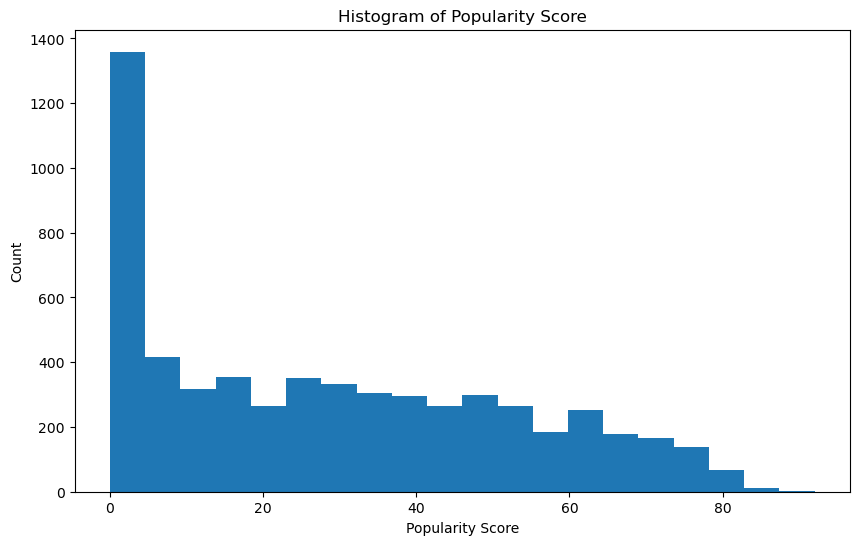

In [46]:
plt.hist(df['Popularity Score'], bins=20)
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.title('Histogram of Popularity Score')
plt.show()

Plot a scatter plot of Popularity Score vs Length (ms)

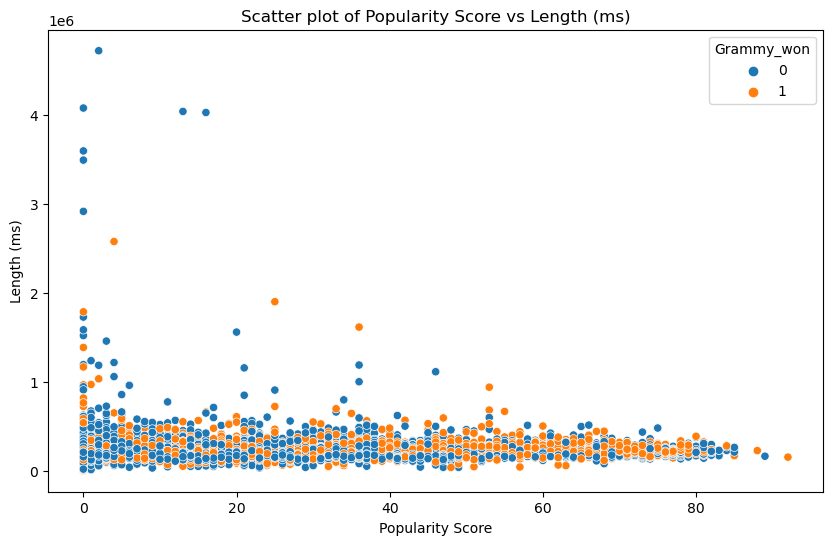

In [48]:
sns.scatterplot(data=df, x='Popularity Score', y='Length (ms)', hue='Grammy_won')
plt.title('Scatter plot of Popularity Score vs Length (ms)')
plt.show()

Pie chart showing the distribution of genres

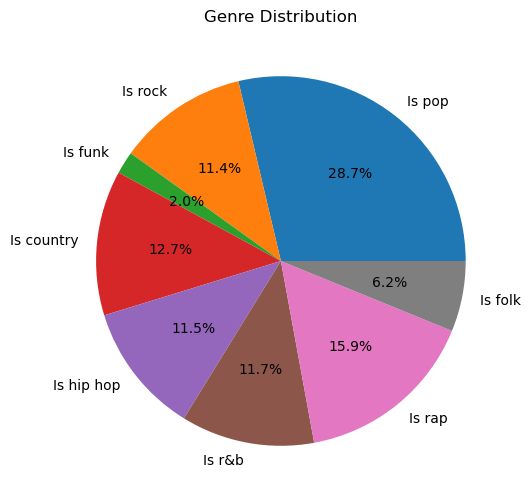

In [50]:
genre_counts = df[['Is pop', 'Is rock', 'Is funk', 'Is country', 'Is hip hop', 'Is r&b', 'Is rap', 'Is folk']].sum()
labels = genre_counts.index
sizes = genre_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Genre Distribution')
plt.show()


We can see that we have majority of pop gener 

Text(0.5, 1.0, 'Correlations Heatmap')

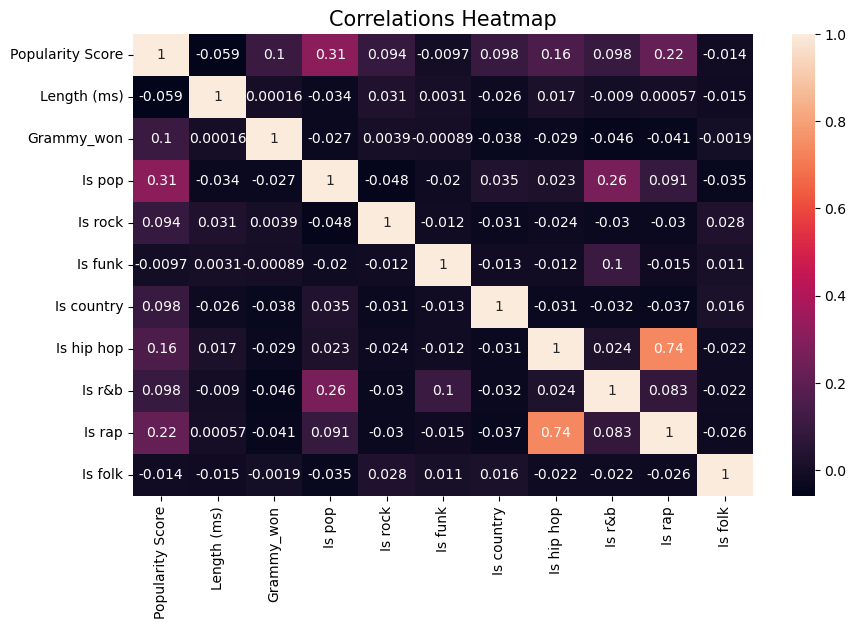

In [51]:
graph = pd.DataFrame(df, columns = df.columns)
sns.heatmap(graph.corr(), annot = True)
plt.title("Correlations Heatmap", size = 15)

We can see we have a strong conection between hip hop and rap the next one's that jave a good effect is.
We can see we have a strong conection between hip hop and rap 
The next one's that have a good effect is popularity score and is pop

#new dataframe containing only the relevant columns
#Melt the dataframe so that the genres are in one column and Grammy wins are in another column
#box plot of Grammy awards won for each genre
#Add labels and a title to the plot
Set the x-axis tick labels to the genre names
Show the plot

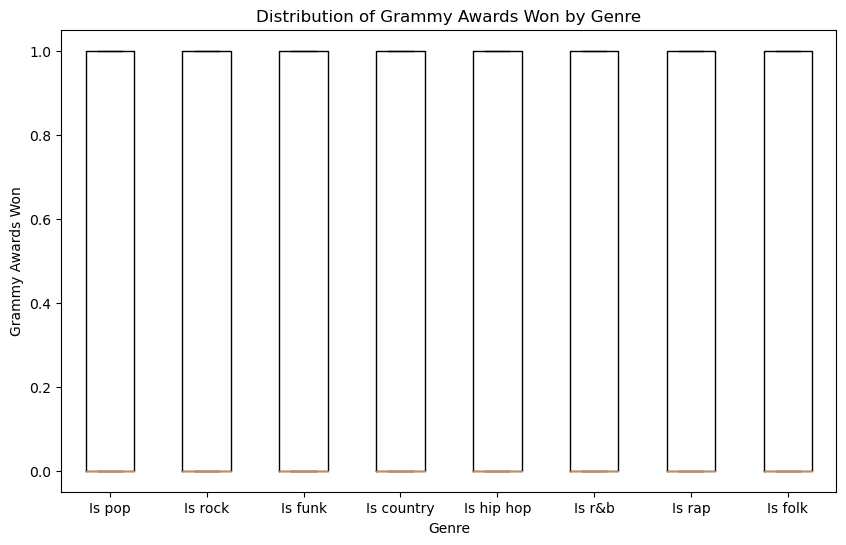

In [53]:
#new dataframe containing only the relevant columns
genre_df = df[['Is pop', 'Is rock', 'Is funk', 'Is country', 'Is hip hop', 'Is r&b', 'Is rap', 'Is folk', 'Grammy_won']]

# Melt the dataframe so that the genres are in one column and Grammy wins are in another column
genre_melted = pd.melt(genre_df, id_vars=['Grammy_won'], var_name='Genre')

#box plot of Grammy awards won for each genre
plt.boxplot([genre_melted[genre_melted['Genre'] == genre]['Grammy_won'] for genre in genre_df.columns[:-1]])

# Add labels and a title to the plot
plt.xlabel('Genre')
plt.ylabel('Grammy Awards Won')
plt.title('Distribution of Grammy Awards Won by Genre')

# Set the x-axis tick labels to the genre names
plt.xticks(range(1, len(genre_df.columns[:-1]) + 1), genre_df.columns[:-1])

# Show the plot
plt.show()


We can see that this graph doesn't help us

#Create a new dataframe containing only the relevant columns
#Count the number of Grammy wins for each genre
#Create a bar plot of the number of Grammy wins for each genre
#Add labels and a title to the plot
#Show the plot

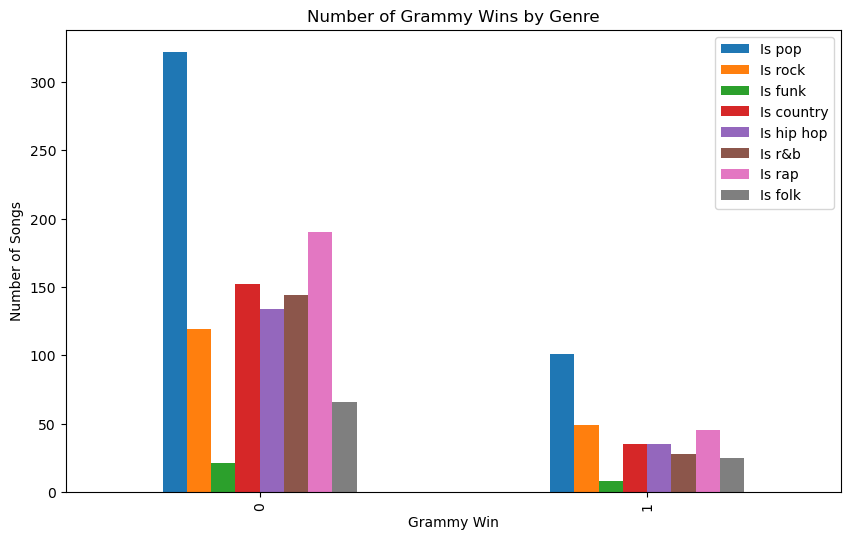

In [54]:
# Create a new dataframe containing only the relevant columns
genre_df = df[['Is pop', 'Is rock', 'Is funk', 'Is country', 'Is hip hop', 'Is r&b', 'Is rap', 'Is folk', 'Grammy_won']]

# Count the number of Grammy wins for each genre
genre_counts = genre_df.groupby('Grammy_won').sum()

# Create a bar plot of the number of Grammy wins for each genre
genre_counts.plot(kind='bar')

# Add labels and a title to the plot
plt.xlabel('Grammy Win')
plt.ylabel('Number of Songs')
plt.title('Number of Grammy Wins by Genre')

# Show the plot
plt.show()


Group the data by each genre

Filter the data to only include songs for the current genre

Create a bar plot of the mean popularity score for songs with and without a Grammy

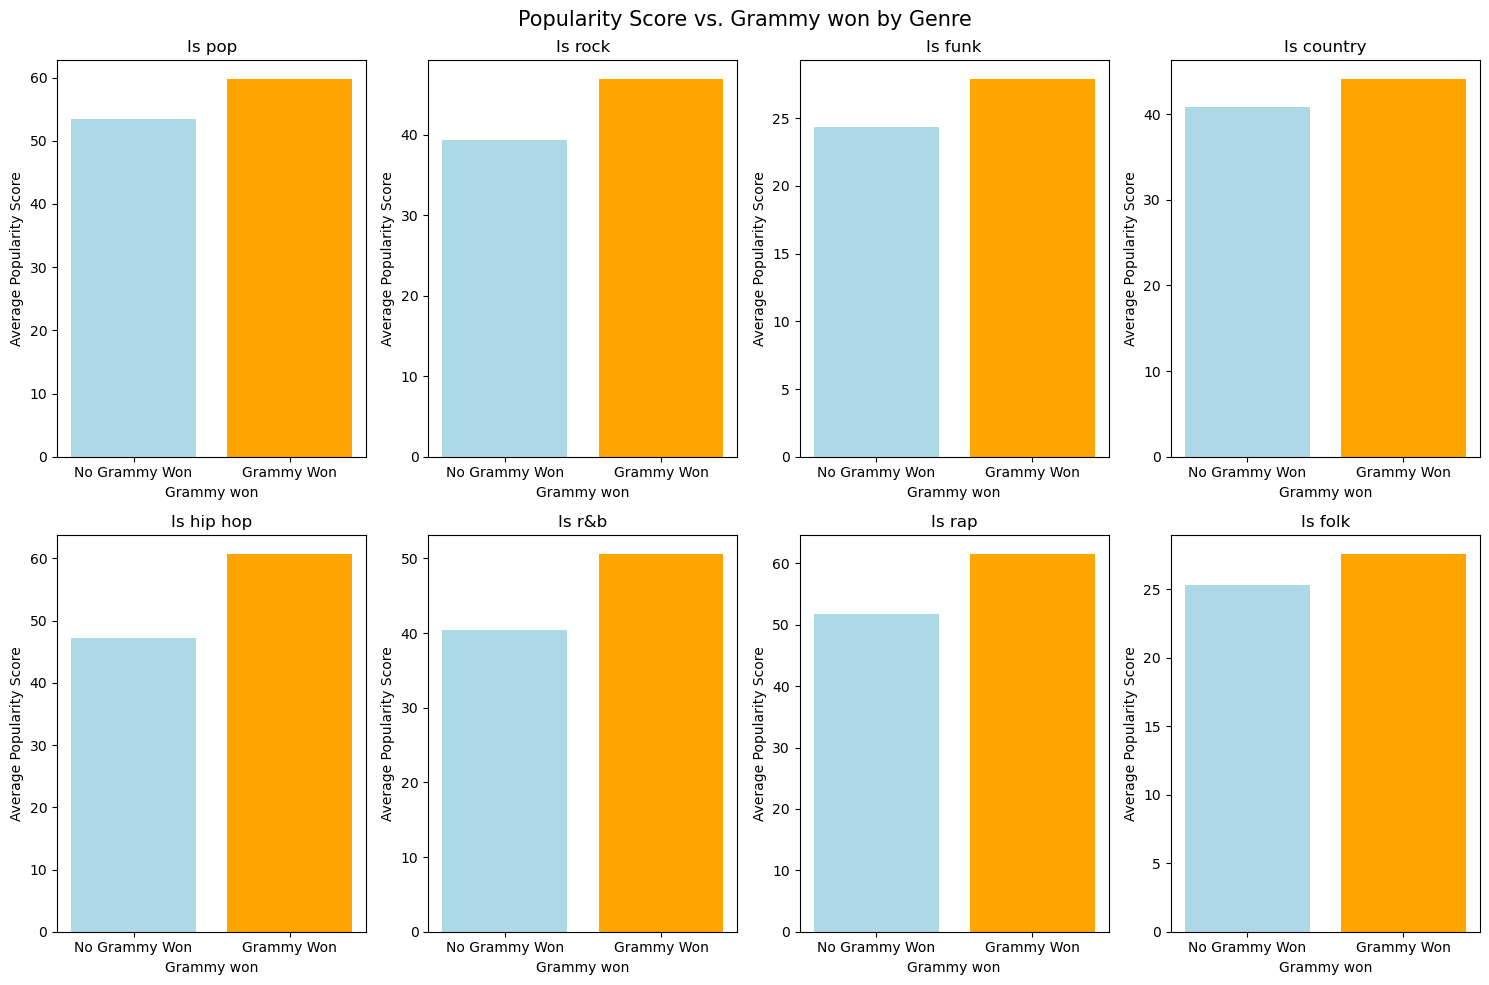

In [55]:
# Group the data by each genre
genre_groups = ['Is pop', 'Is rock', 'Is funk', 'Is country', 'Is hip hop', 'Is r&b', 'Is rap', 'Is folk']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
fig.suptitle("Popularity Score vs. Grammy won by Genre", size = 15)

for i, genre in enumerate(genre_groups):
    # Filter the data to only include songs for the current genre
    genre_data = df[df[genre] == 1]

    # Create a bar plot of the mean popularity score for songs with and without a Grammy
    ax = axes[i//4][i%4]
    ax.bar(["No Grammy Won", "Grammy Won"], 
           [genre_data[genre_data["Grammy_won"]==0]["Popularity Score"].mean(),
            genre_data[genre_data["Grammy_won"]==1]["Popularity Score"].mean()], 
           color=["lightblue", "orange"])
    ax.set_title(genre)
    ax.set_xlabel("Grammy won")
    ax.set_ylabel("Average Popularity Score")

plt.tight_layout()
plt.show()


Here we would like to see 30 artists who had got the biggest number of the awards through the years of Grammy Awards.
We use 'pie' chart.

<AxesSubplot:ylabel='Artist Name'>

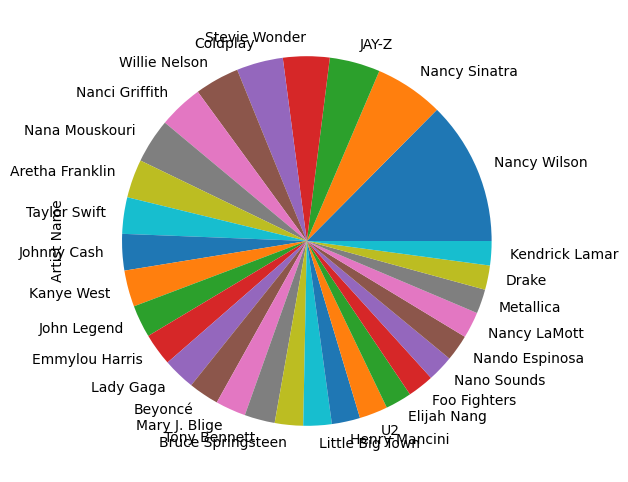

In [59]:
series_artist_names_freq30=df["Artist Name"].value_counts().iloc[0:30]
series_artist_names_freq30.plot(kind='pie')

Here we would like to have the dataframe only for winners

In [60]:
wins_df=df[df.Grammy_won ==1]

In [61]:
wins_df

,Song Name,Artist Name,Album Name,Release Date,Popularity Score,Length (ms),Grammy_won,Is pop,Is rock,Is funk,Is country,Is hip hop,Is r&b,Is rap,Is folk
0,About Damn Time,Lizzo,About Damn Time,2022-04-14,81.0,191822.0,1,1,0,0,0,0,0,0,0
2,JUST LIKE THAT,subhash nandu,JUST LIKE THAT,2023-01-01,5.0,104260.0,1,0,0,0,0,0,0,0,0
4,Easy On Me,Adele,Easy On Me,2021-10-14,81.0,224694.0,1,1,0,0,0,0,0,0,0
5,Unholy (feat. Kim Petras),Sam Smith,Unholy (feat. Kim Petras),2022-09-22,92.0,156943.0,1,1,0,0,0,0,0,0,0
6,Higher,Michael Bublé,Higher,2022-03-10,55.0,185388.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26322,Basie - Straight Ahead,Count Basie,Straight Ahead,1998-01-01,31.0,236240.0,1,0,0,0,0,0,0,0,0
26323,That Old Black Magic - Live In Las Vegas/1958 ...,Louis Prima & Keely Smith,"Wild, Cool & Swingin'",1999-01-01,12.0,176733.0,1,0,0,0,0,0,0,0,0
26324,The E And D Blues (E For Ella And D For Duke),Ella Fitzgerald,Ella Fitzgerald Sings The Duke Ellington Song ...,1957-01-01,9.0,288320.0,1,0,0,0,0,0,0,0,0
26335,Gigi,André Previn,Gigi,1959,10.0,339706.0,1,0,0,0,0,0,0,0,0


Here we would like to find the winners with the biggest number of the awards.

In [64]:
wins_series=wins_df['Artist Name'].value_counts().nlargest(30)
wins_series

Nancy Wilson                     24
Aretha Franklin                  13
JAY-Z                            10
Willie Nelson                    10
Nancy Sinatra                    10
Nanci Griffith                   10
B.B. King                         9
U2                                8
Lady Gaga                         8
Kanye West                        8
Alison Krauss & Union Station     8
Tony Bennett                      8
Beyoncé                           8
Ray Charles                       8
Al Green                          7
Vince Gill                        7
Metallica                         7
Pat Metheny Group                 7
Chet Atkins                       7
Johnny Cash                       7
Stevie Wonder                     7
Foo Fighters                      7
George Benson                     7
Nando Espinosa                    7
Bruce Springsteen                 7
Usher                             7
Eminem                            7
Kendrick Lamar              

We can see the results. Here there the winners and the number of their awards.

<AxesSubplot:title={'center':'Winners'}, xlabel='Artist Name', ylabel='Count'>

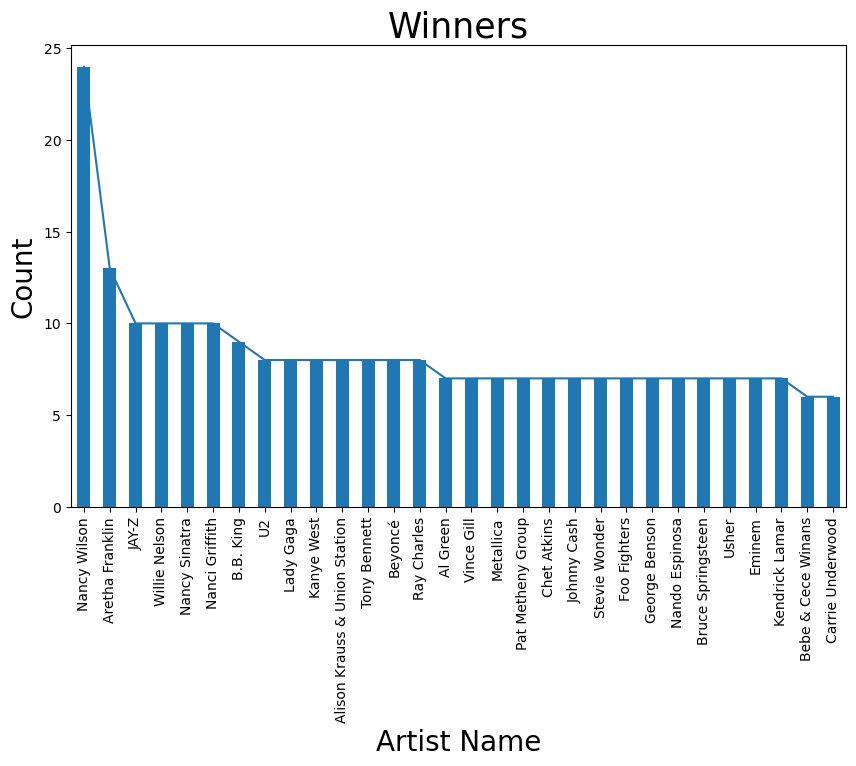

In [63]:
wins_series.plot(x="Artist Name", y="Count")
plt.xlabel("Artist Name",  size = 20)
plt.ylabel("Count", size = 20)
plt.title("Winners", size = 25)
wins_series.plot.bar()

Here we got 30 artist who wins in the specific category in Grammy Awards. We can see the numbers of the victories

In [67]:
df_for_ML=df.copy()

Now we need to get just part of our data frame for machine learning. We do not need the columns without numerical elements. That is why dataframe with the name 'df_for_ML' does not include features like 'Song Name', 'Artist name', 'Album Name' and 'Release Date'.

In [68]:
df_for_ML.drop(['Song Name','Artist Name','Album Name','Release Date'],axis = 1,inplace = True)

In [69]:
df_for_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5826 entries, 0 to 26423
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity Score  5826 non-null   float64
 1   Length (ms)       5826 non-null   float64
 2   Grammy_won        5826 non-null   int64  
 3   Is pop            5826 non-null   int64  
 4   Is rock           5826 non-null   int64  
 5   Is funk           5826 non-null   int64  
 6   Is country        5826 non-null   int64  
 7   Is hip hop        5826 non-null   int64  
 8   Is r&b            5826 non-null   int64  
 9   Is rap            5826 non-null   int64  
 10  Is folk           5826 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 546.2 KB


# Machine Learning Algorithm

# Logistic Regression

Because our question of the research, which must get the binary answers: 'yes' or 'no', we would like to use the logistic regression. We need to use this algorithm in order to get a result. 

In [70]:
TRAINING_FEATURES = df_for_ML.columns[df_for_ML.columns != 'Grammy_won']
TARGET_FEATURE = 'Grammy_won'
X = df_for_ML[TRAINING_FEATURES]
y = df_for_ML[TARGET_FEATURE]
y.head()

0    1
2    1
4    1
5    1
6    1
Name: Grammy_won, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))
print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #5826
Number of training samples: #4660
Number of test samples: #1166

Target distribution in original dataset:
0    4186
1    1640
Name: Grammy_won, dtype: int64

Target distribution in the training set:
0    3335
1    1325
Name: Grammy_won, dtype: int64

Target distribution in the test set:
0    851
1    315
Name: Grammy_won, dtype: int64


In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("Mean: ", X_train_scaled.mean(axis=0))
print("Standard Deviation: ", X_train_scaled.std(axis=0))

Mean:  [-1.52476982e-17  1.52476982e-17 -1.67724680e-17 -3.50697058e-17
 -6.09907928e-18  5.64164833e-17 -3.85004379e-17 -1.37229284e-17
  3.88816304e-17 -3.35449360e-17]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [73]:
X_test_scaled = scaler.transform(X_test)
print("Mean: ", X_test_scaled.mean(axis=0))
print("Standard Deviation: ", X_test_scaled.std(axis=0))

Mean:  [-0.00647652  0.02640859 -0.01094389  0.01536202  0.07060357 -0.04412729
  0.04036855  0.01647047  0.03866638  0.00684616]
Standard Deviation:  [0.97240381 1.113883   0.98183869 1.04264788 1.44705054 0.87747825
 1.10941663 1.04510283 1.08769422 1.0265212 ]


In [74]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_in_range = min_max_scaler.fit_transform(X_train)
print("Min Value: ", X_train_scaled_in_range.min(axis=0))
print("Max Value: ", X_train_scaled_in_range.max(axis=0))
X_test_scaled_in_range = min_max_scaler.transform(X_test)

Min Value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max Value:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [75]:
clf_model = LogisticRegression().fit(X_train, y_train)
y_pred=clf_model.predict(X_test)

# Model

In [76]:
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF["correct"]=abs((resDF["Actual"]^resDF["Predicted"])-1)
resDF[resDF["correct"]==1]
resDF

,Actual,Predicted,correct
12020,0,0,1
19714,0,0,1
4837,0,0,1
1256,0,0,1
5068,0,0,1
...,...,...,...
12506,0,0,1
7499,1,0,0
6742,0,0,1
17132,0,0,1


In [77]:
resDF['Actual'].value_counts()

0    851
1    315
Name: Actual, dtype: int64

In [78]:
resDF['Predicted'].value_counts()

0    1166
Name: Predicted, dtype: int64

In [79]:
resDF['correct'].value_counts()

1    851
0    315
Name: correct, dtype: int64

In [80]:
y_pred = resDF['Predicted']
y_actual = resDF['Actual']
matrix = metrics.confusion_matrix(y_actual, y_pred)

# Evaluation

In [81]:
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))  
print("precision is:",metrics.precision_score(y_actual, y_pred))
print("recall is:",metrics.recall_score(y_actual, y_pred))
print("f1 is:",metrics.f1_score(y_actual, y_pred))
print("r2 is:",metrics.r2_score(y_actual, y_pred))

accuracy is: 0.7298456260720412
precision is: 0.0
recall is: 0.0
f1 is: 0.0
r2 is: -0.3701527614571094


/Users/adaraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we can see that the precision is 0. That means that logistic regression doesn't work. So we need to check with random forest

# Correlation test

/var/folders/zb/05pykmh92cg9gsbb1776h6480000gn/T/ipykernel_16209/1973106539.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_copy1.corr().style.background_gradient(cmap, axis=1)\


,Popularity Score,Length (ms),Grammy_won
Popularity Score,1.00,-0.06,0.10
Length (ms),-0.06,1.00,0.00
Grammy_won,0.10,0.00,1.00


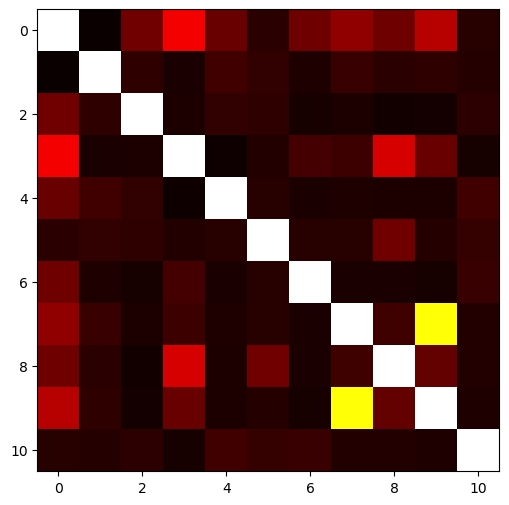

In [82]:
plt.imshow(df_for_ML.corr(),cmap='hot',interpolation='nearest')

cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df_copy1.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation between features")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [83]:
df_cor = df_for_ML.corr()

In [84]:
for row in range(11):
    for col in range(11):
        if (df_cor.iloc[row,col] > abs(0.3) and df_cor.iloc[row,col] != 1 ):
            print(df_cor.index[row] ," : ",df_cor.columns[col] , " : ",df_cor.iloc[row,col])

Popularity Score  :  Is pop  :  0.3099445163438367
Is pop  :  Popularity Score  :  0.3099445163438367
Is hip hop  :  Is rap  :  0.7391004661896706
Is rap  :  Is hip hop  :  0.7391004661896706


In [85]:
clf_model.predict(X_train_scaled)

/Users/adaraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 1])

In [86]:
clf_model.score(X_train_scaled, y_train)

/Users/adaraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.4296137339055794

In [87]:
clf_model.score(X_test_scaled, y_test)

/Users/adaraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.444253859348199

The result is really not good.

# Random Forest

We decided to use the 'Random Forest' algorithm in order to make our results better and to get the result that will satisfy us.

In [88]:
TRAINING_FEATURES_FOREST = df_for_ML.columns[df_for_ML.columns != 'Grammy_won']
TARGET_FEATURE_FOREST = 'Grammy_won'
X_F = df_for_ML[TRAINING_FEATURES_FOREST]
y_F = df_for_ML[TARGET_FEATURE_FOREST]
y_F.head()

0    1
2    1
4    1
5    1
6    1
Name: Grammy_won, dtype: int64

In [89]:
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X_F, y_F, test_size=0.3, random_state=52)
print("Initial amount of samples: #{}".format(X_F.shape[0]))
print("Number of training samples: #{}".format(X_train_F.shape[0]))
print("Number of test samples: #{}".format(X_test_F.shape[0]))
print("\nTarget distribution in original dataset:\n{}".format(y_F.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train_F.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test_F.value_counts()))

Initial amount of samples: #5826
Number of training samples: #4078
Number of test samples: #1748

Target distribution in original dataset:
0    4186
1    1640
Name: Grammy_won, dtype: int64

Target distribution in the training set:
0    2922
1    1156
Name: Grammy_won, dtype: int64

Target distribution in the test set:
0    1264
1     484
Name: Grammy_won, dtype: int64


Try random forest machine learning. After dividing to learn and test

In [90]:
rf = RandomForestClassifier(n_estimators=1, random_state=42)
rf.fit(X_train_F, y_train_F)

RandomForestClassifier(n_estimators=1, random_state=42)

In [91]:
y_pred_F = rf.predict(X_test_F)
f1_max = (f1_score(y_test_F, y_pred_F))

In [92]:
print('Accuracy is:', accuracy_score(y_test_F, y_pred_F))
print('f1 is:', f1_max)

Accuracy is: 0.6127002288329519
f1 is: 0.3013415892672858


Here we can see that the result is not good. Because we would like f1 to be bigger than 0.5. That's why it's not possible to predict.

In [93]:
scaler_F = StandardScaler()
X_train_scaled_F = scaler_F.fit_transform(X_train_F)
X_test_scaled_F = scaler_F.transform(X_test_F)

In [94]:
rf.predict(X_train_scaled_F)

/Users/adaraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [95]:
rf.score(X_train_scaled_F, y_train_F)

/Users/adaraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7103972535556645

In [96]:
rf.score(X_test_scaled_F, y_test_F)

/Users/adaraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7128146453089245

Eventually, we've got the result that does not satisfy us because we can not make any prediction with it.